# LOAN DEFAULTER CASE STUDY

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

<h1>Importing the Data into DataFrames<h1>

In [67]:
application_data = pd.read_csv(r"C:\Users\eva\Desktop\assignements\python_case_study\application_data.csv")
print(application_data.head(10))


   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2     

In [68]:
columns_description = pd.read_csv(r"C:\Users\eva\Desktop\assignements\python_case_study\columns_description.csv")
print(columns_description.head(10))

   Unnamed: 0             Table                 Row  \
0           1  application_data          SK_ID_CURR   
1           2  application_data              TARGET   
2           5  application_data  NAME_CONTRACT_TYPE   
3           6  application_data         CODE_GENDER   
4           7  application_data        FLAG_OWN_CAR   
5           8  application_data     FLAG_OWN_REALTY   
6           9  application_data        CNT_CHILDREN   
7          10  application_data    AMT_INCOME_TOTAL   
8          11  application_data          AMT_CREDIT   
9          12  application_data         AMT_ANNUITY   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN  
5               

In [69]:
previous_application = pd.read_csv(r"C:\Users\eva\Desktop\assignements\python_case_study\previous_application.csv")
print(previous_application.head(10))

   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0              

<h1> Understanding the Data and the Shape of each Data Frames <h1>

1. Here we will View the data and Understand each DataFrame
2. Inspect the dataframe's columns, shapes, variable types etc.

In [70]:
print('Columns for Application_data \n')

print(application_data.columns)
print('\nShapes for Application_data \n')
print(application_data.shape)
print('\nVariable Data types for Application_data \n')
print(application_data.dtypes)

Columns for Application_data 

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

Shapes for Application_data 

(307511, 122)

Variable Data types for Application_data 

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64


In [71]:
print('Columns for Columns_description \n')
print(columns_description.columns)
print('\nShapes for Columns_description \n')
print(columns_description.shape)
print('\nVariable Data types for Columns_description \n')
print(columns_description.dtypes)

Columns for Columns_description 

Index(['Unnamed: 0', 'Table', 'Row', 'Description', 'Special'], dtype='object')

Shapes for Columns_description 

(160, 5)

Variable Data types for Columns_description 

Unnamed: 0      int64
Table          object
Row            object
Description    object
Special        object
dtype: object


In [72]:
print('Columns for Previous application \n')
print(previous_application.columns)
print('\nShapes for Previous application \n')
print(previous_application.shape)
print('\nVariable Data types for Previous application \n')
print(previous_application.dtypes)

Columns for Previous application 

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

Shapes for Previous application 

(1670214, 37)

Variable Dat

<h1>Data Cleaning<h1>

Finding out the number of Null values in all the columns and rows. Also, finding the percentage of Null values in each
column. 

<h4>1. Cleaning Previous_application Dataframe<h4>

In [73]:
# Cleaning the Previous application data 
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
Nulls_previous = round(previous_application.isnull().sum() / previous_application.shape[0] * 100.00,2).to_frame()
Nulls_previous = Nulls_previous.rename(columns = {0: 'Null_per'})
Nulls_previous


Null_per
SK_ID_PREV                       0.00
SK_ID_CURR                       0.00
NAME_CONTRACT_TYPE               0.00
AMT_ANNUITY                     22.29
AMT_APPLICATION                  0.00
AMT_CREDIT                       0.00
AMT_DOWN_PAYMENT                53.64
AMT_GOODS_PRICE                 23.08
WEEKDAY_APPR_PROCESS_START       0.00
HOUR_APPR_PROCESS_START          0.00
FLAG_LAST_APPL_PER_CONTRACT      0.00
NFLAG_LAST_APPL_IN_DAY           0.00
RATE_DOWN_PAYMENT               53.64
RATE_INTEREST_PRIMARY           99.64
RATE_INTEREST_PRIVILEGED        99.64
NAME_CASH_LOAN_PURPOSE           0.00
NAME_CONTRACT_STATUS             0.00
DAYS_DECISION                    0.00
NAME_PAYMENT_TYPE                0.00
CODE_REJECT_REASON               0.00
NAME_TYPE_SUITE                 49.12
NAME_CLIENT_TYPE                 0.00
NAME_GOODS_CATEGORY              0.00
NAME_PORTFOLIO                   0.00
NAME_PRODUCT_TYPE                0.00
CHANNEL_TYPE                     0.00
SELLERPLACE_AREA                 0.00
NAME_SELLER_INDUSTRY             0.00
CNT_PAYMENT                     22.29
NAME_YIELD_GROUP                 0.00
PRODUCT_COMBINATION              0.02
DAYS_FIRST_DRAWING              40.30
DAYS_FIRST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION       40.30
DAYS_LAST_DUE                   40.30
DAYS_TERMINATION                40.30
NFLAG_INSURED_ON_APPROVAL       40.30

The columns RATE_INTEREST_PRIMARY and RATE_INTEREST_PRIVILEGED have the highest number of null Values. Also, lets consider 40% to be our cut off Null pervcentage for each column. Hence, we will be removing all the columns with null percentage higher than 40%.



In [74]:
unwanted_columns_previous = Nulls_previous[Nulls_previous['Null_per'] > 40].index.to_list()
unwanted_columns_previous

# columns with null percentage higher than 40%

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [75]:
unnecesary_columns_previous = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
unwanted_columns_previous = unwanted_columns_previous + unnecesary_columns_previous
print(unwanted_columns_previous)

print(len(unwanted_columns_previous))

# Columns like WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, FLAG_LAST_APPL_PER_CONTRACT, NFLAG_LAST_APPL_IN_DAY
# are not useful in our analysis.
# Hence droping them as well.
# In tottal we will be dropping 15 columns

['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY']
15


In [76]:
previous_application_actual = previous_application.drop(unwanted_columns_previous, axis=1)
print(previous_application_actual.head(10))

# previous_application table after deleting all the unwanted columns

   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     17145.0          17145.0                    XAP          

In [77]:
round(previous_application_actual.isnull().sum() /
      previous_application_actual.shape[0] * 100.00,2).to_frame().rename(columns = {0: 'Null_per'})

# As we can see that AMT_ANNUITY, AMT_GOODS_PRICE,CNT_PAYMENT and PRODUCT_COMBINATION has still some Null values left. 
# Now we will be trying to fix these null values. 

Null_per
SK_ID_PREV                  0.00
SK_ID_CURR                  0.00
NAME_CONTRACT_TYPE          0.00
AMT_ANNUITY                22.29
AMT_APPLICATION             0.00
AMT_CREDIT                  0.00
AMT_GOODS_PRICE            23.08
NAME_CASH_LOAN_PURPOSE      0.00
NAME_CONTRACT_STATUS        0.00
DAYS_DECISION               0.00
NAME_PAYMENT_TYPE           0.00
CODE_REJECT_REASON          0.00
NAME_CLIENT_TYPE            0.00
NAME_GOODS_CATEGORY         0.00
NAME_PORTFOLIO              0.00
NAME_PRODUCT_TYPE           0.00
CHANNEL_TYPE                0.00
SELLERPLACE_AREA            0.00
NAME_SELLER_INDUSTRY        0.00
CNT_PAYMENT                22.29
NAME_YIELD_GROUP            0.00
PRODUCT_COMBINATION         0.02

Imputing the AMT_ANNUITY column 

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64


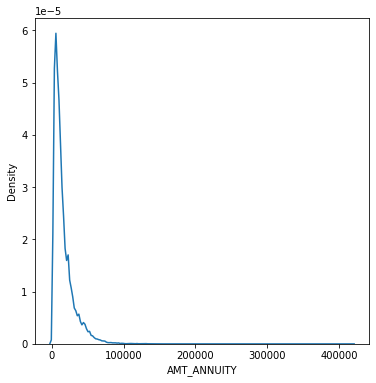

None


In [78]:
print(previous_application_actual.AMT_ANNUITY.describe())
plt.figure(figsize=(6,6))
sns.kdeplot(previous_application_actual['AMT_ANNUITY'])
print(plt.show())

# Since the data is highly skewed to the left that mean will be highly affected due to skewness
# and hence best way is to impute the Null will be to use Median instead.

In [79]:
previous_application_actual.AMT_ANNUITY.fillna(previous_application_actual.AMT_ANNUITY.median(), inplace = True)
print(previous_application_actual.head(10))

   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans    11250.000              0.0   
7     1656711      296299         Cash loans    11250.000              0.0   
8     2367563      342292         Cash loans    11250.000              0.0   
9     2579447      334349         Cash loans    11250.000              0.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     17145.0          17145.0                    XAP          

Imputing the AMT_GOODS_PRICE column

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64


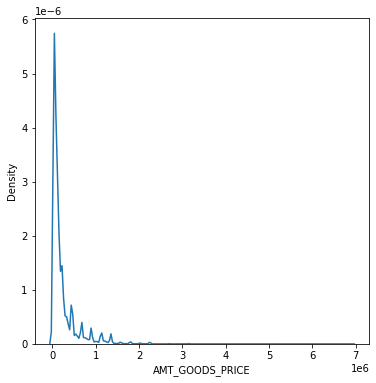

None


In [80]:
print(previous_application_actual.AMT_GOODS_PRICE.describe())
plt.figure(figsize=(6,6))
sns.kdeplot(previous_application_actual['AMT_GOODS_PRICE'])
print(plt.show())

# In the Chart we can see that the data is skewed but there are several peak points in the distribution. 
# Hence, we will check what to impute in this situation.

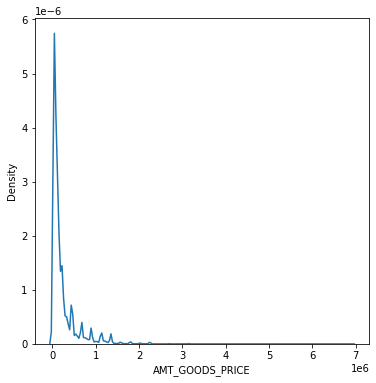

None


In [81]:
new_df = pd.DataFrame()

new_df['impute_mode'] = previous_application_actual.AMT_GOODS_PRICE
new_df['impute_mean'] = previous_application_actual.AMT_GOODS_PRICE
new_df['impute_median'] = previous_application_actual.AMT_GOODS_PRICE

new_df['impute_mode'].fillna(new_df.impute_mode.mode()[0], inplace = True)
new_df['impute_mean'].fillna(round(new_df.impute_mean.mean(), 1), inplace = True)
new_df['impute_median'].fillna(new_df.impute_median.median(), inplace = True)

plt.figure(figsize=(6,6))
sns.kdeplot(previous_application_actual['AMT_GOODS_PRICE'])
print(plt.show())


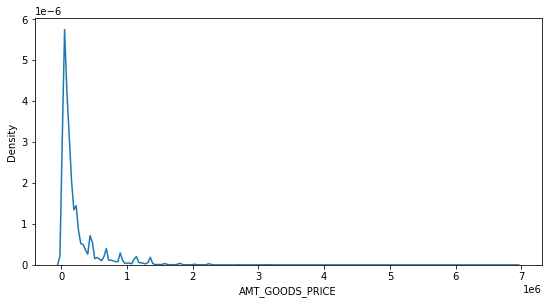

None


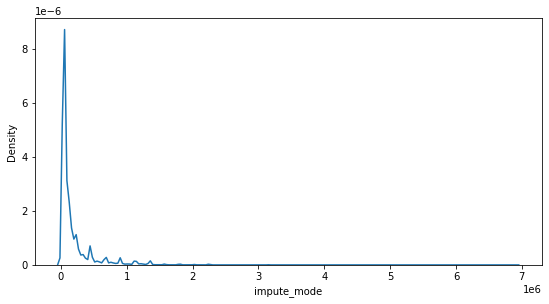

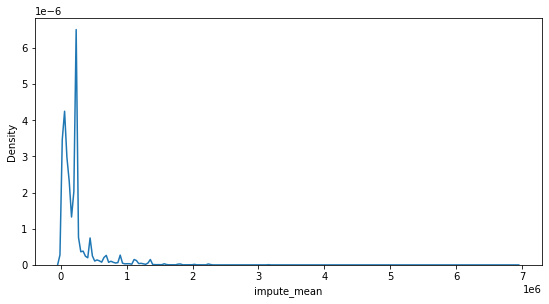

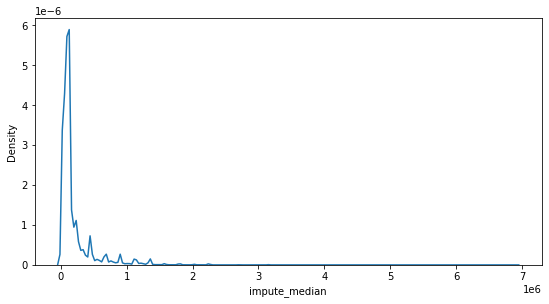

None


In [82]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.kdeplot(previous_application_actual['AMT_GOODS_PRICE'])
print(plt.show())

for col in new_df.columns:
    i=2
    plt.figure(figsize=(20,10))
    plt.subplot(2,2,i)
    sns.kdeplot(new_df[col])
    i=i+1
print(plt.show())      

# As we can see that replacing the the null values with the Median has not changed plot so much. 
# Hence, we will be replacing the the null values with the median. 

In [83]:
previous_application_actual.AMT_GOODS_PRICE.fillna(previous_application_actual.AMT_GOODS_PRICE.median(), inplace = True)
previous_application_actual.head(10)

# Now we have imputed the null values in the AMT_GOODS_PRICE column

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans    11250.000              0.0   
7     1656711      296299         Cash loans    11250.000              0.0   
8     2367563      342292         Cash loans    11250.000              0.0   
9     2579447      334349         Cash loans    11250.000              0.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0     17145.0          17145.0                    XAP             Approved   
1    679671.0         607500.0                    XNA             Approved   
2    136444.5         112500.0                    XNA             Approved   
3    470790.0         450000.0                    XNA             Approved   
4    404055.0         337500.0                Repairs              Refused   
5    340573.5         315000.0      Everyday expenses             Approved   
6         0.0         112320.0                    XNA             Canceled   
7         0.0         112320.0                    XNA             Canceled   
8         0.0         112320.0                    XNA             Canceled   
9         0.0         112320.0                    XNA             Canceled   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   
5           -684  Cash through the bank                XAP         Repeater   
6            -14                    XNA                XAP         Repeater   
7            -21                    XNA                XAP         Repeater   
8           -386                    XNA                XAP         Repeater   
9            -57                    XNA                XAP         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   
5                 XNA           Cash            x-sell   
6                 XNA            XNA               XNA   
7                 XNA            XNA               XNA   
8                 XNA            XNA               XNA   
9                 XNA            XNA               XNA   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   
5  Credit and cash offices                -1                  XNA   
6  Credit and cash offices                -1                  XNA   
7  Credit and cash offices                -1                  XNA   
8  Credit and cash offices                -1                  XNA   
9  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT N

Imputing the CNT_PAYMENT column

From the data we can observe that the CNT payment is actually the tenure which will be empty if the loan was cancelled. Hence, we will just impute 0 in place of the Null values.

In [84]:
previous_application_actual.CNT_PAYMENT.fillna('0', inplace = True)

# We also see the SK_ID_PREV is not required as it not a useful. We can SK_ID_CURR as teh unique identifier for the application_data

previous_application_actual.drop('SK_ID_PREV', axis =1, inplace = True)

# We can also see that the DAYS_DECISION column is in negative which does not make sense. hence we will converting it to positive

for col in ['DAYS_DECISION']:
    previous_application_actual[col] = abs(previous_application_actual[col])
    
previous_application_actual.head(10)

SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0      271877     Consumer loans     1730.430          17145.0     17145.0   
1      108129         Cash loans    25188.615         607500.0    679671.0   
2      122040         Cash loans    15060.735         112500.0    136444.5   
3      176158         Cash loans    47041.335         450000.0    470790.0   
4      202054         Cash loans    31924.395         337500.0    404055.0   
5      199383         Cash loans    23703.930         315000.0    340573.5   
6      175704         Cash loans    11250.000              0.0         0.0   
7      296299         Cash loans    11250.000              0.0         0.0   
8      342292         Cash loans    11250.000              0.0         0.0   
9      334349         Cash loans    11250.000              0.0         0.0   

   AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
0          17145.0                    XAP             Approved             73   
1         607500.0                    XNA             Approved            164   
2         112500.0                    XNA             Approved            301   
3         450000.0                    XNA             Approved            512   
4         337500.0                Repairs              Refused            781   
5         315000.0      Everyday expenses             Approved            684   
6         112320.0                    XNA             Canceled             14   
7         112320.0                    XNA             Canceled             21   
8         112320.0                    XNA             Canceled            386   
9         112320.0                    XNA             Canceled             57   

       NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0  Cash through the bank                XAP         Repeater   
1                    XNA                XAP         Repeater   
2  Cash through the bank                XAP         Repeater   
3  Cash through the bank                XAP         Repeater   
4  Cash through the bank                 HC         Repeater   
5  Cash through the bank                XAP         Repeater   
6                    XNA                XAP         Repeater   
7                    XNA                XAP         Repeater   
8                    XNA                XAP         Repeater   
9                    XNA                XAP         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   
5                 XNA           Cash            x-sell   
6                 XNA            XNA               XNA   
7                 XNA            XNA               XNA   
8                 XNA            XNA               XNA   
9                 XNA            XNA               XNA   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY CNT_PAYMENT  \
0             Country-wide                35         Connectivity        12.0   
1           Contact center                -1                  XNA        36.0   
2  Credit and cash offices                -1                  XNA        12.0   
3  Credit and cash offices                -1                  XNA        12.0   
4  Credit and cash offices                -1                  XNA        24.0   
5  Credit and cash offices                -1                  XNA        18.0   
6  Credit and cash offices                -1                  XNA           0   
7  Credit and cash offices                -1                  XNA           0   
8  Credit and cash offices                -1                  XNA           0   
9  Credit and cash offices                -1                  XNA           0   

  NAME_YIELD_GRO

We are ignoring the null values in the column PRODUCT_COMBINATION as they very less. 
Finally chcking the null percentage again.

In [85]:
round(previous_application_actual.isnull().sum() /
      previous_application_actual.shape[0] * 100.00,2).to_frame().rename(columns = {0: 'Null_per'})

Null_per
SK_ID_CURR                  0.00
NAME_CONTRACT_TYPE          0.00
AMT_ANNUITY                 0.00
AMT_APPLICATION             0.00
AMT_CREDIT                  0.00
AMT_GOODS_PRICE             0.00
NAME_CASH_LOAN_PURPOSE      0.00
NAME_CONTRACT_STATUS        0.00
DAYS_DECISION               0.00
NAME_PAYMENT_TYPE           0.00
CODE_REJECT_REASON          0.00
NAME_CLIENT_TYPE            0.00
NAME_GOODS_CATEGORY         0.00
NAME_PORTFOLIO              0.00
NAME_PRODUCT_TYPE           0.00
CHANNEL_TYPE                0.00
SELLERPLACE_AREA            0.00
NAME_SELLER_INDUSTRY        0.00
CNT_PAYMENT                 0.00
NAME_YIELD_GROUP            0.00
PRODUCT_COMBINATION         0.02

<h4>2. Cleaning Application_data Dataframe<h4>

In [86]:
# Cleaning the Previous application data 
# pd.options.display.max_columns = None
pd.options.display.max_rows = None

Nulls_application = round(application_data.isnull().sum() / application_data.shape[0] * 100.00,2).to_frame()
Nulls_application = Nulls_application.rename(columns = {0: 'Null_per'})
Nulls_application

# Calculating the number of Nulls by columns

Null_per
SK_ID_CURR                        0.00
TARGET                            0.00
NAME_CONTRACT_TYPE                0.00
CODE_GENDER                       0.00
FLAG_OWN_CAR                      0.00
FLAG_OWN_REALTY                   0.00
CNT_CHILDREN                      0.00
AMT_INCOME_TOTAL                  0.00
AMT_CREDIT                        0.00
AMT_ANNUITY                       0.00
AMT_GOODS_PRICE                   0.09
NAME_TYPE_SUITE                   0.42
NAME_INCOME_TYPE                  0.00
NAME_EDUCATION_TYPE               0.00
NAME_FAMILY_STATUS                0.00
NAME_HOUSING_TYPE                 0.00
REGION_POPULATION_RELATIVE        0.00
DAYS_BIRTH                        0.00
DAYS_EMPLOYED                     0.00
DAYS_REGISTRATION                 0.00
DAYS_ID_PUBLISH                   0.00
OWN_CAR_AGE                      65.99
FLAG_MOBIL                        0.00
FLAG_EMP_PHONE                    0.00
FLAG_WORK_PHONE                   0.00
FLAG_CONT_MOBILE                  0.00
FLAG_PHONE                        0.00
FLAG_EMAIL                        0.00
OCCUPATION_TYPE                  31.35
CNT_FAM_MEMBERS                   0.00
REGION_RATING_CLIENT              0.00
REGION_RATING_CLIENT_W_CITY       0.00
WEEKDAY_APPR_PROCESS_START        0.00
HOUR_APPR_PROCESS_START           0.00
REG_REGION_NOT_LIVE_REGION        0.00
REG_REGION_NOT_WORK_REGION        0.00
LIVE_REGION_NOT_WORK_REGION       0.00
REG_CITY_NOT_LIVE_CITY            0.00
REG_CITY_NOT_WORK_CITY            0.00
LIVE_CITY_NOT_WORK_CITY           0.00
ORGANIZATION_TYPE                 0.00
EXT_SOURCE_1                     56.38
EXT_SOURCE_2                      0.21
EXT_SOURCE_3                     19.83
APARTMENTS_AVG                   50.75
BASEMENTAREA_AVG                 58.52
YEARS_BEGINEXPLUATATION_AVG      48.78
YEARS_BUILD_AVG                  66.50
COMMONAREA_AVG                   69.87
ELEVATORS_AVG                    53.30
ENTRANCES_AVG                    50.35
FLOORSMAX_AVG                    49.76
FLOORSMIN_AVG                    67.85
LANDAREA_AVG                     59.38
LIVINGAPARTMENTS_AVG             68.35
LIVINGAREA_AVG                   50.19
NONLIVINGAPARTMENTS_AVG          69.43
NONLIVINGAREA_AVG                55.18
APARTMENTS_MODE                  50.75
BASEMENTAREA_MODE                58.52
YEARS_BEGINEXPLUATATION_MODE     48.78
YEARS_BUILD_MODE                 66.50
COMMONAREA_MODE                  69.87
ELEVATORS_MODE                   53.30
ENTRANCES_MODE                   50.35
FLOORSMAX_MODE                   49.76
FLOORSMIN_MODE                   67.85
LANDAREA_MODE                    59.38
LIVINGAPARTMENTS_MODE            68.35
LIVINGAREA_MODE                  50.19
NONLIVINGAPARTMENTS_MODE         69.43
NONLIVINGAREA_MODE               55.18
APARTMENTS_MEDI                  50.75
BASEMENTAREA_MEDI                58.52
YEARS_BEGINEXPLUATATION_MEDI     48.78
YEARS_BUILD_MEDI                 66.50
COMMONAREA_MEDI                  69.87
ELEVATORS_MEDI                   53.30
ENTRANCES_MEDI                   50.35
FLOORSMAX_MEDI                   49.76
FLOORSMIN_MEDI                   67.85
LANDAREA_MEDI                    59.38
LIVINGAPARTMENTS_MEDI            68.35
LIVINGAREA_MEDI                  50.19
NONLIVINGAPARTMENTS_MEDI         69.43
NONLIVINGAREA_MEDI               55.18
FONDKAPREMONT_MODE               68.39
HOUSETYPE_MODE                   50.18
TOTALAREA_MODE                   48.27
WALLSMATERIAL_MODE               50.84
EMERGENCYSTATE_MODE              47.40
OBS_30_CNT_SOCIAL_CIRCLE          0.33
DEF_30_CNT_SOCIAL_CIRCLE          0.33
OBS_60_CNT_SOCIAL_CIRCLE          0.33
DEF_60_CNT_SOCIAL_CIRCLE          0.33
DAYS_LAST_PHONE_CHANGE            0.00
FLAG_DOCUMENT_2                   0.00
FLAG_DOCUMENT_3                   0.00
FLAG_DOCUMENT_4                   0.00
FLAG_DOCUMENT_5                   0.00
FLAG_DOCUMENT_6                   0.00
FLAG_DOCUMENT_7                   0.00
FLAG_DOCUMENT

The columns COMMONAREA_AVG and COMMONAREA_MODE have the highest number of null Values. Just lik earlier, lets consider 40% to be our cut off Null pervcentage for each column. Hence, we will be removing all the columns with null percentage higher than 40%.

In [87]:
unwanted_columns_application = Nulls_application[Nulls_application['Null_per'] > 40].index.to_list()
print(unwanted_columns_application)
len(unwanted_columns_application)

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

49

In [88]:
application_data_actual = application_data.drop(unwanted_columns_application, axis=1)
print(application_data_actual.head(10))

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2     

In [89]:
application_data_actual.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [90]:
pd.options.display.max_columns = None

# TARGET, FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE, 
# FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,
# REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,
# FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9, FLAG_DOCUMENT_10,
# FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,
# FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,
# are categorical comumn but they are displayed as numeric

Psuedo_numeric= ['TARGET', 'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE', 
'FLAG_EMAIL','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',
'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']


application_data_numeric = application_data_actual._get_numeric_data().drop(Psuedo_numeric, axis =1)

application_data_numeric["TARGET"] = application_data_actual["TARGET"]

application_data_numeric.head(10)



SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0      100002             0          202500.0    406597.5      24700.5   
1      100003             0          270000.0   1293502.5      35698.5   
2      100004             0           67500.0    135000.0       6750.0   
3      100006             0          135000.0    312682.5      29686.5   
4      100007             0          121500.0    513000.0      21865.5   
5      100008             0           99000.0    490495.5      27517.5   
6      100009             1          171000.0   1560726.0      41301.0   
7      100010             0          360000.0   1530000.0      42075.0   
8      100011             0          112500.0   1019610.0      33826.5   
9      100012             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801       -9461           -637   
1        1129500.0                    0.003541      -16765          -1188   
2         135000.0                    0.010032      -19046           -225   
3         297000.0                    0.008019      -19005          -3039   
4         513000.0                    0.028663      -19932          -3038   
5         454500.0                    0.035792      -16941          -1588   
6        1395000.0                    0.035792      -13778          -3130   
7        1530000.0                    0.003122      -18850           -449   
8         913500.0                    0.018634      -20099         365243   
9         405000.0                    0.019689      -14469          -2019   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0            -3648.0            -2120              1.0                     2   
1            -1186.0             -291              2.0                     1   
2            -4260.0            -2531              1.0                     2   
3            -9833.0            -2437              2.0                     2   
4            -4311.0            -3458              1.0                     2   
5            -4970.0             -477              2.0                     2   
6            -1213.0             -619              3.0                     2   
7            -4597.0            -2379              2.0                     3   
8            -7427.0            -3514              2.0                     2   
9           -14437.0            -3992              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  EXT_SOURCE_2  \
0                            2                       10      0.262949   
1                            1                       11      0.622246   
2                            2                        9      0.555912   
3                            2                       17      0.650442   
4                            2                       11      0.322738   
5                            2                       16      0.354225   
6                            2                       16      0.724000   
7                            3                       16      0.714279   
8                            2                       14      0.205747   
9                            2                        8      0.746644   

   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.139376                       2.0                       2.0   
1           NaN                       1.0                       0.0   
2      0.729567                       0.0                       0.0   
3           NaN                       2.0                       0.0   
4           NaN                       0.0                       0.0   
5      0.621226                       0.0                       0.0   
6      0.492060                       1.0                       0.0   
7      0.540654                       2.0                       0.0   
8      0.751724 

Analysing the Application_data table for any revelant columns and disarding the columns that are not useful for our analysis. We created a dataframe with only the real numeric values. This will help us study the corelation between different col

<AxesSubplot:>

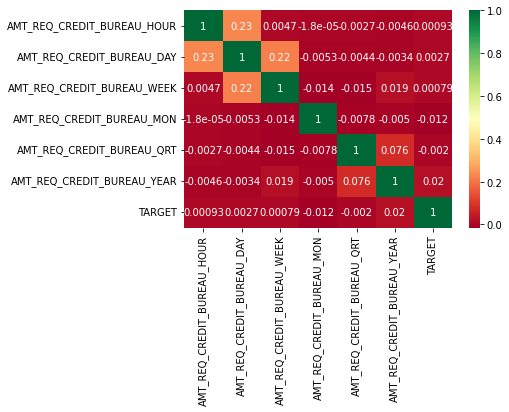

In [91]:
source_amt = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','TARGET']
corr = application_data_numeric[source_amt].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           annot = True,
            cmap ="RdYlGn")

# As we can see from the Heatmap there are almost no corelation between the fields that start with 'AMT___________' and the Target. hence, we will be dropping these Fields. 

In [92]:
unnecesary_columns_application = source_amt
unnecesary_columns_application.remove('TARGET')
unnecesary_columns_application

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

Couple of columns have a negative days value which should be changed to positive

In [93]:
for col in ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']:
    application_data_numeric[col] = abs(application_data_numeric[col])
application_data_numeric.head(10)

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0      100002             0          202500.0    406597.5      24700.5   
1      100003             0          270000.0   1293502.5      35698.5   
2      100004             0           67500.0    135000.0       6750.0   
3      100006             0          135000.0    312682.5      29686.5   
4      100007             0          121500.0    513000.0      21865.5   
5      100008             0           99000.0    490495.5      27517.5   
6      100009             1          171000.0   1560726.0      41301.0   
7      100010             0          360000.0   1530000.0      42075.0   
8      100011             0          112500.0   1019610.0      33826.5   
9      100012             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801        9461            637   
1        1129500.0                    0.003541       16765           1188   
2         135000.0                    0.010032       19046            225   
3         297000.0                    0.008019       19005           3039   
4         513000.0                    0.028663       19932           3038   
5         454500.0                    0.035792       16941           1588   
6        1395000.0                    0.035792       13778           3130   
7        1530000.0                    0.003122       18850            449   
8         913500.0                    0.018634       20099         365243   
9         405000.0                    0.019689       14469           2019   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             3648.0             2120              1.0                     2   
1             1186.0              291              2.0                     1   
2             4260.0             2531              1.0                     2   
3             9833.0             2437              2.0                     2   
4             4311.0             3458              1.0                     2   
5             4970.0              477              2.0                     2   
6             1213.0              619              3.0                     2   
7             4597.0             2379              2.0                     3   
8             7427.0             3514              2.0                     2   
9            14437.0             3992              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  EXT_SOURCE_2  \
0                            2                       10      0.262949   
1                            1                       11      0.622246   
2                            2                        9      0.555912   
3                            2                       17      0.650442   
4                            2                       11      0.322738   
5                            2                       16      0.354225   
6                            2                       16      0.724000   
7                            3                       16      0.714279   
8                            2                       14      0.205747   
9                            2                        8      0.746644   

   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.139376                       2.0                       2.0   
1           NaN                       1.0                       0.0   
2      0.729567                       0.0                       0.0   
3           NaN                       2.0                       0.0   
4           NaN                       0.0                       0.0   
5      0.621226                       0.0                       0.0   
6      0.492060                       1.0                       0.0   
7      0.540654                       2.0                       0.0   
8      0.751724 

<AxesSubplot:>

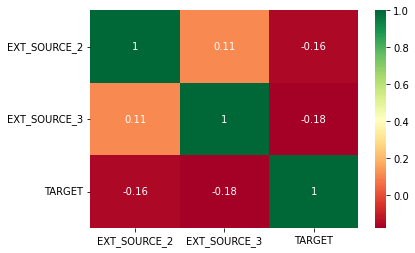

In [94]:
Source_ext = ['EXT_SOURCE_2','EXT_SOURCE_3', 'TARGET']
corr = application_data_numeric[Source_ext].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True, cmap ="RdYlGn")

# As we can see from the Heatmap there are almost no corelation between the fields that start with 'EXT___________' and the Target. hence, we will be dropping these Fields. 

In [95]:
unnecesary_columns_application.extend(Source_ext)
unnecesary_columns_application.remove('TARGET')
unnecesary_columns_application

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3']

In [96]:
len(unnecesary_columns_application)

# Till now we have 8 unnecessary numeric Columns. Now we will work on the pseudo numeric Fields.

8

Working on the Psedudo Numeric Fields to check how thay are affecting the target

In [97]:
application_data_pseudo = application_data_actual[Psuedo_numeric]
application_data_pseudo.head(10)
# Importing the Pseudo numeric data to a different data frame 

TARGET  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
0       1           1               1                0                 1   
1       0           1               1                0                 1   
2       0           1               1                1                 1   
3       0           1               1                0                 1   
4       0           1               1                0                 1   
5       0           1               1                1                 1   
6       0           1               1                0                 1   
7       0           1               1                1                 1   
8       0           1               0                0                 1   
9       0           1               1                0                 1   

   FLAG_PHONE  FLAG_EMAIL  REG_REGION_NOT_LIVE_REGION  \
0           1           0                           0   
1           1           0                           0   
2           1           0                           0   
3           0           0                           0   
4           0           0                           0   
5           1           0                           0   
6           1           0                           0   
7           0           0                           0   
8           0           0                           0   
9           0           0                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   
5                           0                            0   
6                           0                            0   
7                           0                            0   
8                           0                            0   
9                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   
5                       0                       0                        0   
6                       0                       0                        0   
7                       0                       1                        1   
8                       0                       0                        0   
9                       0                       0                        0   

   FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                0                1                0                0   
1                0                1                0                0   
2                0                0                0                0   
3                0                1                0                0   
4                0                0                0                0   
5                0                1                0                0   
6                0                0                0                0   
7                0                1                0                0   
8                0                1                0                0   
9                0                0                0                0   

   FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0                0                0                0                0   
1                0                0           

In [98]:
application_data_pseudo['TARGET'].replace({1:"Defaulter",0:"Repayer"}, inplace = True)
application_data_pseudo.head(10)

TARGET  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
0  Defaulter           1               1                0                 1   
1    Repayer           1               1                0                 1   
2    Repayer           1               1                1                 1   
3    Repayer           1               1                0                 1   
4    Repayer           1               1                0                 1   
5    Repayer           1               1                1                 1   
6    Repayer           1               1                0                 1   
7    Repayer           1               1                1                 1   
8    Repayer           1               0                0                 1   
9    Repayer           1               1                0                 1   

   FLAG_PHONE  FLAG_EMAIL  REG_REGION_NOT_LIVE_REGION  \
0           1           0                           0   
1           1           0                           0   
2           1           0                           0   
3           0           0                           0   
4           0           0                           0   
5           1           0                           0   
6           1           0                           0   
7           0           0                           0   
8           0           0                           0   
9           0           0                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   
5                           0                            0   
6                           0                            0   
7                           0                            0   
8                           0                            0   
9                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   
5                       0                       0                        0   
6                       0                       0                        0   
7                       0                       1                        1   
8                       0                       0                        0   
9                       0                       0                        0   

   FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                0                1                0                0   
1                0                1                0                0   
2                0                0                0                0   
3                0                1                0                0   
4                0                0                0                0   
5                0                1                0                0   
6                0                0                0                0   
7                0                1                0                0   
8                0                1                0                0   
9                0                0                0                0   

   FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0                0                0                0                0   
1               

In [99]:
len(application_data_pseudo.columns)

33

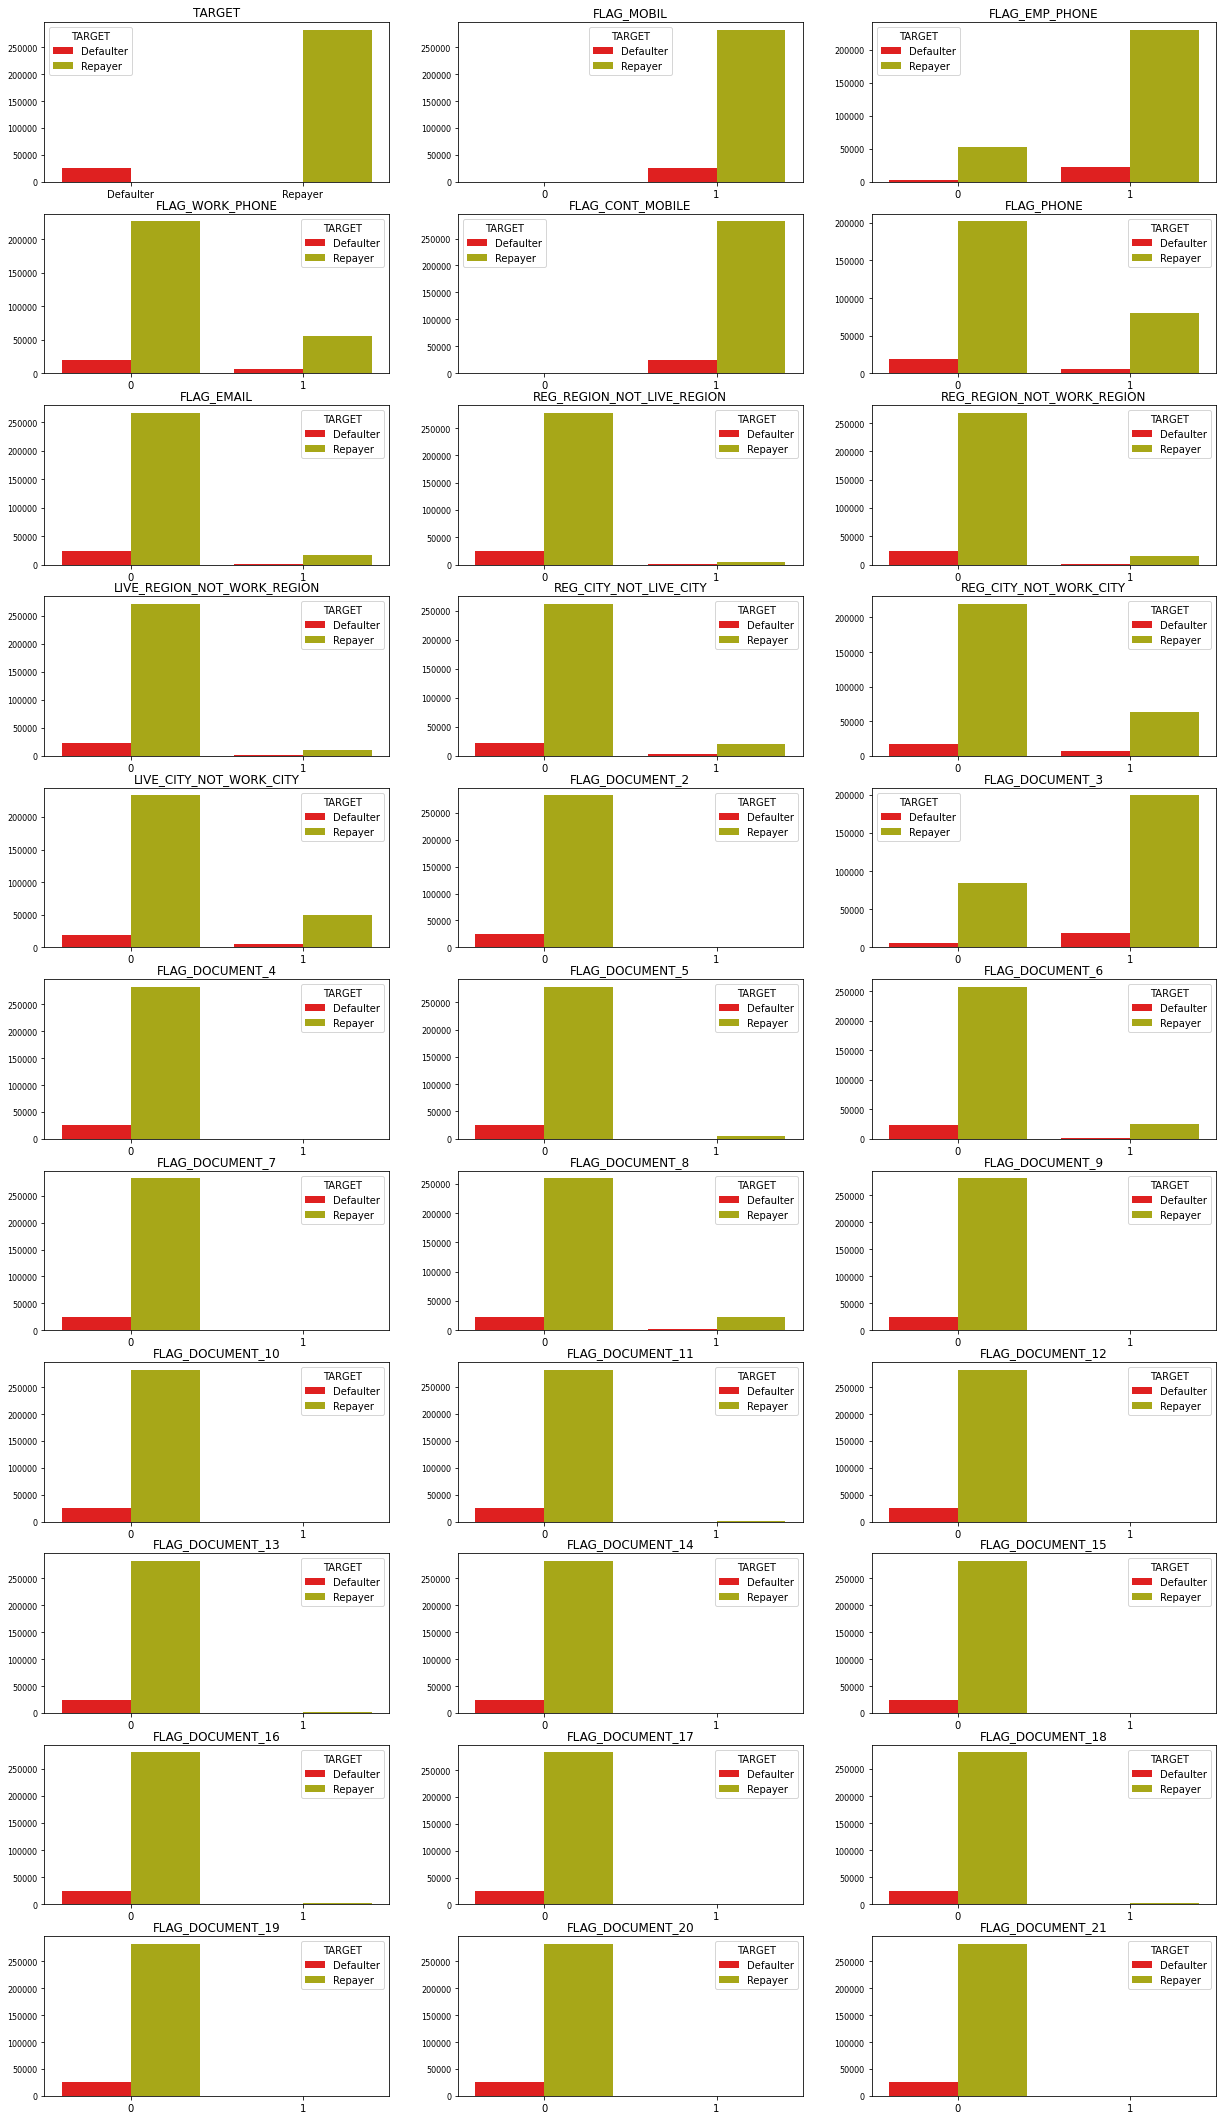

In [100]:
fig = plt.figure(figsize=(21,24))
i=1
for col in application_data_pseudo.columns:
     plt.subplot(11,3, i)
     ax = sns.countplot(x = application_data_pseudo[col], hue=application_data_pseudo["TARGET"],palette=["r","y"])
     plt.yticks(fontsize=8)
     plt.xlabel("")
     plt.ylabel("")
     plt.title(col)
     i=i+1
plt.subplots_adjust(bottom=0.2, top= 1.4)
plt.show()

Observations

1. Data is very imbalance as we have very less data for most for Defaulters compared to Repayers. We will be calculating the Ratio of the Data imbalance in Target Field
2. There are other Fields also where we can see highly imbalanced data like the Fields starting with 'FLAG_DOCUMENT______' except FLAG_DOCUMENT_3.
3. There are other Fields that starts with 'FLAG____', 'REG____','LIVE____'  that are non relevant due to being highly imbalanced and have no prediction towards the Target 

Task to determine the Data Imbalance

In [101]:
Imbalanced_col = ['FLAG_MOBIL','FLAG_CONT_MOBILE','FLAG_EMAIL','REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

Imbalanced_df = application_data_pseudo[Imbalanced_col]
Imbalanced_df.replace({1:"Yes",0:"No"}, inplace = True)

# Printing the Imbalance ratio for 'Target' column seperately as it is not included in the Imbalanced_col

print("Repayer to Deafaulter Ratio in  TARGET","\n", round(application_data_pseudo['TARGET'].to_list().count('Repayer')/
                                             application_data_pseudo['TARGET'].to_list().count('Defaulter'), 2),": ",1)

for col in Imbalanced_col:
    yes_count = int(Imbalanced_df[col].to_list().count('Yes'))
    no_count = int(Imbalanced_df[col].to_list().count('No'))
    if (yes_count > no_count):
            print("Yes to no Ratio in ",col,"\n", round(yes_count/no_count, 2),": ",1)
           
    else:           
             
            print("Yes to no Ratio in ",col,"\n",1,":",round(no_count/yes_count, 2))
 
# Here we displayed the list of all the columns with Data Imbalace and there respective imbalance ratio.

Repayer to Deafaulter Ratio in  TARGET 
 11.39 :  1
Yes to no Ratio in  FLAG_MOBIL 
 307510.0 :  1
Yes to no Ratio in  FLAG_CONT_MOBILE 
 534.73 :  1
Yes to no Ratio in  FLAG_EMAIL 
 1 : 16.63
Yes to no Ratio in  REG_REGION_NOT_LIVE_REGION 
 1 : 65.03
Yes to no Ratio in  REG_REGION_NOT_WORK_REGION 
 1 : 18.7
Yes to no Ratio in  LIVE_REGION_NOT_WORK_REGION 
 1 : 23.59
Yes to no Ratio in  REG_CITY_NOT_LIVE_CITY 
 1 : 11.79
Yes to no Ratio in  FLAG_DOCUMENT_2 
 1 : 23653.69
Yes to no Ratio in  FLAG_DOCUMENT_4 
 1 : 12299.44
Yes to no Ratio in  FLAG_DOCUMENT_5 
 1 : 65.16
Yes to no Ratio in  FLAG_DOCUMENT_6 
 1 : 10.36
Yes to no Ratio in  FLAG_DOCUMENT_7 
 1 : 5211.05
Yes to no Ratio in  FLAG_DOCUMENT_8 
 1 : 11.29
Yes to no Ratio in  FLAG_DOCUMENT_9 
 1 : 255.69
Yes to no Ratio in  FLAG_DOCUMENT_10 
 1 : 43929.14
Yes to no Ratio in  FLAG_DOCUMENT_11 
 1 : 254.62
Yes to no Ratio in  FLAG_DOCUMENT_12 
 1 : 153754.5
Yes to no Ratio in  FLAG_DOCUMENT_13 
 1 : 282.68
Yes to no Ratio in  FLAG_D

In [102]:
unnecesary_columns_application.extend(Imbalanced_col)
unnecesary_columns_application

# Adding the columns that we do not require to the list unnecesary_columns_application

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_MOBIL',
 'FLAG_CONT_MOBILE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

Since we have got most of our unnecessary numeric and pseudo numeric coloumns. 
We will be modifying our Dataframe and removing these columns

In [103]:
application_data_actual.drop(unnecesary_columns_application, axis =1, inplace = True)
application_data_actual.head(10)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   
7                    0.003122      -18850           -449            -4597.0   
8                    0.018634      -20099         365243            -7427.0   
9                    0.019689      -14469          -2019           -14437.

In [104]:
print(len(application_data_actual.columns))

# Finally we have onnly 38 Columns in our Actual application_data Table. 

39


In [105]:
application_data_categorical = application_data_actual.drop(application_data_actual._get_numeric_data(), axis =1)

print(application_data_categorical.head(10))
print(application_data_categorical.shape)

  NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0         Cash loans           M            N               Y   
1         Cash loans           F            N               N   
2    Revolving loans           M            Y               Y   
3         Cash loans           F            N               Y   
4         Cash loans           M            N               Y   
5         Cash loans           M            N               Y   
6         Cash loans           F            Y               Y   
7         Cash loans           M            Y               Y   
8         Cash loans           F            N               Y   
9    Revolving loans           M            N               Y   

   NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0    Unaccompanied               Working  Secondary / secondary special   
1           Family         State servant               Higher education   
2    Unaccompanied               Working  Secondary / secon

In [106]:
application_data_pseudo.head(10)

TARGET  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
0  Defaulter           1               1                0                 1   
1    Repayer           1               1                0                 1   
2    Repayer           1               1                1                 1   
3    Repayer           1               1                0                 1   
4    Repayer           1               1                0                 1   
5    Repayer           1               1                1                 1   
6    Repayer           1               1                0                 1   
7    Repayer           1               1                1                 1   
8    Repayer           1               0                0                 1   
9    Repayer           1               1                0                 1   

   FLAG_PHONE  FLAG_EMAIL  REG_REGION_NOT_LIVE_REGION  \
0           1           0                           0   
1           1           0                           0   
2           1           0                           0   
3           0           0                           0   
4           0           0                           0   
5           1           0                           0   
6           1           0                           0   
7           0           0                           0   
8           0           0                           0   
9           0           0                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   
5                           0                            0   
6                           0                            0   
7                           0                            0   
8                           0                            0   
9                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   
5                       0                       0                        0   
6                       0                       0                        0   
7                       0                       1                        1   
8                       0                       0                        0   
9                       0                       0                        0   

   FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                0                1                0                0   
1                0                1                0                0   
2                0                0                0                0   
3                0                1                0                0   
4                0                0                0                0   
5                0                1                0                0   
6                0                0                0                0   
7                0                1                0                0   
8                0                1                0                0   
9                0                0                0                0   

   FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0                0                0                0                0   
1               

In [107]:
Intersect = set(application_data_pseudo.columns).intersection(set(unnecesary_columns_application))
application_data_pseudo = application_data_pseudo.drop(Intersect, axis =1)  
application_data_pseudo.head(10)


TARGET  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_PHONE  \
0  Defaulter               1                0           1   
1    Repayer               1                0           1   
2    Repayer               1                1           1   
3    Repayer               1                0           0   
4    Repayer               1                0           0   
5    Repayer               1                1           1   
6    Repayer               1                0           1   
7    Repayer               1                1           0   
8    Repayer               0                0           0   
9    Repayer               1                0           0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  FLAG_DOCUMENT_3  
0                       0                        0                1  
1                       0                        0                1  
2                       0                        0                0  
3                       0                        0                1  
4                       1                        1                0  
5                       0                        0                1  
6                       0                        0                0  
7                       1                        1                1  
8                       0                        0                1  
9                       0                        0                0

In [108]:
application_data_pseudo.replace({1:"Yes",0:"No"}, inplace = True)
print(application_data_pseudo.head(10))
print(application_data_pseudo.shape)

# Changing the remaining columns in the application_data_pseudo table to Yes or no based the where they submitted the data, 
# so that we can merge them with the "application_data_categorical" Table

      TARGET FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_PHONE REG_CITY_NOT_WORK_CITY  \
0  Defaulter            Yes              No        Yes                     No   
1    Repayer            Yes              No        Yes                     No   
2    Repayer            Yes             Yes        Yes                     No   
3    Repayer            Yes              No         No                     No   
4    Repayer            Yes              No         No                    Yes   
5    Repayer            Yes             Yes        Yes                     No   
6    Repayer            Yes              No        Yes                     No   
7    Repayer            Yes             Yes         No                    Yes   
8    Repayer             No              No         No                     No   
9    Repayer            Yes              No         No                     No   

  LIVE_CITY_NOT_WORK_CITY FLAG_DOCUMENT_3  
0                      No             Yes  
1                   

In [109]:
application_data_categorical = pd.concat([application_data_categorical, application_data_pseudo], axis=1)
print(application_data_categorical.head(10))
print(application_data_categorical.shape)

# Adding the new Categories to the "application_data_categorical" Table


  NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0         Cash loans           M            N               Y   
1         Cash loans           F            N               N   
2    Revolving loans           M            Y               Y   
3         Cash loans           F            N               Y   
4         Cash loans           M            N               Y   
5         Cash loans           M            N               Y   
6         Cash loans           F            Y               Y   
7         Cash loans           M            Y               Y   
8         Cash loans           F            N               Y   
9    Revolving loans           M            N               Y   

   NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0    Unaccompanied               Working  Secondary / secondary special   
1           Family         State servant               Higher education   
2    Unaccompanied               Working  Secondary / secon

Handling the remaining Null Values

In [110]:
round(application_data_categorical.isnull().sum() / application_data_categorical.shape[0] * 100.00,2).to_frame()

0
NAME_CONTRACT_TYPE           0.00
CODE_GENDER                  0.00
FLAG_OWN_CAR                 0.00
FLAG_OWN_REALTY              0.00
NAME_TYPE_SUITE              0.42
NAME_INCOME_TYPE             0.00
NAME_EDUCATION_TYPE          0.00
NAME_FAMILY_STATUS           0.00
NAME_HOUSING_TYPE            0.00
OCCUPATION_TYPE             31.35
WEEKDAY_APPR_PROCESS_START   0.00
ORGANIZATION_TYPE            0.00
TARGET                       0.00
FLAG_EMP_PHONE               0.00
FLAG_WORK_PHONE              0.00
FLAG_PHONE                   0.00
REG_CITY_NOT_WORK_CITY       0.00
LIVE_CITY_NOT_WORK_CITY      0.00
FLAG_DOCUMENT_3              0.00

As we can see that we have null values present mostly in the OCCUPATION_TYPE column. We analysis more on this column and will
see how to impute the null values. 

In [111]:
print(application_data_categorical['OCCUPATION_TYPE'].value_counts())
print(application_data_categorical['OCCUPATION_TYPE'].describe())

# We can see that the Null values are not at Random, they are null either due to there Job Role 
# was not mentioned in the list. Hence, we will be adding another column category 'Others'.

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64
count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object


In [112]:
application_data_categorical.OCCUPATION_TYPE.fillna('Others', inplace = True)
print(application_data_categorical['OCCUPATION_TYPE'].value_counts())

Others                   96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64


In [113]:
print(application_data_categorical['NAME_TYPE_SUITE'].value_counts())
application_data_categorical.NAME_TYPE_SUITE.fillna('Unaccompanied', inplace = True)
print("\n",application_data_categorical.head(10))

# Since this categorical column we cannot replace nulls with Mean or Median. 
# Hence, we will be replacing the null values with the Mode .i,e, 'Unaccompanied'      

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

   NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0         Cash loans           M            N               Y   
1         Cash loans           F            N               N   
2    Revolving loans           M            Y               Y   
3         Cash loans           F            N               Y   
4         Cash loans           M            N               Y   
5         Cash loans           M            N               Y   
6         Cash loans           F            Y               Y   
7         Cash loans           M            Y               Y   
8         Cash loans           F            N               Y   
9    Revolving loans           M            N               Y   

   NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATI

In [114]:
round(application_data_categorical.isnull().sum() / application_data_categorical.shape[0] * 100.00,2).to_frame()

# As we can see we do not have any null Values left to fix. Hence, we can proceed with our analysis

0
NAME_CONTRACT_TYPE          0.0
CODE_GENDER                 0.0
FLAG_OWN_CAR                0.0
FLAG_OWN_REALTY             0.0
NAME_TYPE_SUITE             0.0
NAME_INCOME_TYPE            0.0
NAME_EDUCATION_TYPE         0.0
NAME_FAMILY_STATUS          0.0
NAME_HOUSING_TYPE           0.0
OCCUPATION_TYPE             0.0
WEEKDAY_APPR_PROCESS_START  0.0
ORGANIZATION_TYPE           0.0
TARGET                      0.0
FLAG_EMP_PHONE              0.0
FLAG_WORK_PHONE             0.0
FLAG_PHONE                  0.0
REG_CITY_NOT_WORK_CITY      0.0
LIVE_CITY_NOT_WORK_CITY     0.0
FLAG_DOCUMENT_3             0.0

In [115]:
Intersect = set(application_data_numeric.columns).intersection(set(unnecesary_columns_application))
application_data_numeric = application_data_numeric.drop(Intersect, axis =1)  

# Here we are findiong intersection between the numeric columns and the unnecesary columns
# list to find the the numeric Fields that we do not need.

# Also there are two Target columns one numeric and one categorical in application_data_numeric and application_data_categorical
# Hence, dropping the numeric Target column from the application_data_numeric

application_data_numeric.drop(columns = 'TARGET', axis =1, inplace =True)

# Creating the actual Application_data table 

application_data_actual = pd.concat([application_data_categorical, application_data_numeric], axis = 1)
print(application_data_actual.head(10))

# Finally we have the actual Application_data Table with no nulls, no negative days data and with only the necessary fields.



  NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0         Cash loans           M            N               Y   
1         Cash loans           F            N               N   
2    Revolving loans           M            Y               Y   
3         Cash loans           F            N               Y   
4         Cash loans           M            N               Y   
5         Cash loans           M            N               Y   
6         Cash loans           F            Y               Y   
7         Cash loans           M            Y               Y   
8         Cash loans           F            N               Y   
9    Revolving loans           M            N               Y   

   NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0    Unaccompanied               Working  Secondary / secondary special   
1           Family         State servant               Higher education   
2    Unaccompanied               Working  Secondary / secon

<h1>Locating the Outliers<h1>

<h4>1. Finding outliers in previous_application_actual<h4>

In [116]:
previous_application_actual['CNT_PAYMENT'] = previous_application_actual['CNT_PAYMENT'].apply(pd.to_numeric)
print(previous_application_actual.head(10))

   SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0      271877     Consumer loans     1730.430          17145.0     17145.0   
1      108129         Cash loans    25188.615         607500.0    679671.0   
2      122040         Cash loans    15060.735         112500.0    136444.5   
3      176158         Cash loans    47041.335         450000.0    470790.0   
4      202054         Cash loans    31924.395         337500.0    404055.0   
5      199383         Cash loans    23703.930         315000.0    340573.5   
6      175704         Cash loans    11250.000              0.0         0.0   
7      296299         Cash loans    11250.000              0.0         0.0   
8      342292         Cash loans    11250.000              0.0         0.0   
9      334349         Cash loans    11250.000              0.0         0.0   

   AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
0          17145.0                    XAP             Approv

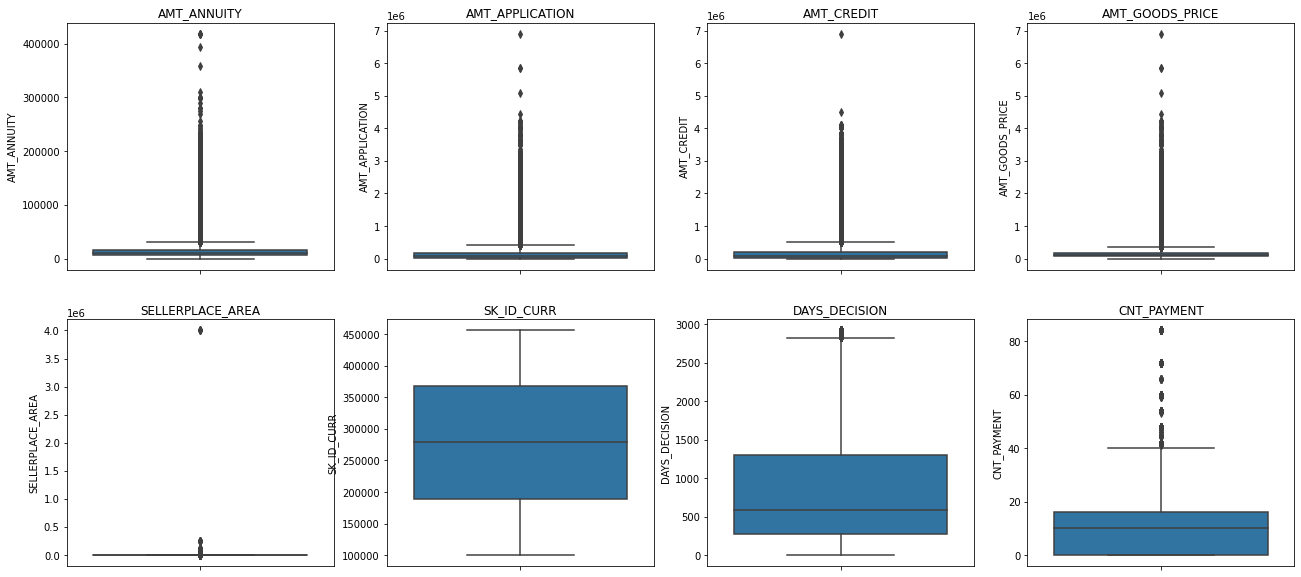

In [117]:
Outliers_col_previous = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA','SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']
Outliers_col_previous_df = previous_application_actual[Outliers_col_previous]

plt.figure(figsize=(22,10))

j=1
for col in Outliers_col_previous_df.columns:
    plt.subplot(2,4,j)
    sns.boxplot(y= Outliers_col_previous_df[col])
    plt.title(col)
    j=j+1


Plotted the numeric columns of the table previous_application_actual to check of outliers.We found the below insights from the plots:

1. AMT_ANNUITY, AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,SELLERPLACE_AREA have huge number of Outliers. 
2. CNT_PAYMENT and DAYS_DECISION has few outliers.
3. SK_ID_CURR has no Outliers since it like an ID for most of the customers/clients it is understandable that it does not have Outliers

<h4>2. Finding outliers in application_data_actual<h4>

In [118]:
application_data_actual.head(10)        


NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0         Cash loans           M            N               Y   
1         Cash loans           F            N               N   
2    Revolving loans           M            Y               Y   
3         Cash loans           F            N               Y   
4         Cash loans           M            N               Y   
5         Cash loans           M            N               Y   
6         Cash loans           F            Y               Y   
7         Cash loans           M            Y               Y   
8         Cash loans           F            N               Y   
9    Revolving loans           M            N               Y   

   NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0    Unaccompanied               Working  Secondary / secondary special   
1           Family         State servant               Higher education   
2    Unaccompanied               Working  Secondary / secondary special   
3    Unaccompanied               Working  Secondary / secondary special   
4    Unaccompanied               Working  Secondary / secondary special   
5  Spouse, partner         State servant  Secondary / secondary special   
6    Unaccompanied  Commercial associate               Higher education   
7    Unaccompanied         State servant               Higher education   
8         Children             Pensioner  Secondary / secondary special   
9    Unaccompanied               Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
0  Single / not married  House / apartment        Laborers   
1               Married  House / apartment      Core staff   
2  Single / not married  House / apartment        Laborers   
3        Civil marriage  House / apartment        Laborers   
4  Single / not married  House / apartment      Core staff   
5               Married  House / apartment        Laborers   
6               Married  House / apartment     Accountants   
7               Married  House / apartment        Managers   
8               Married  House / apartment          Others   
9  Single / not married  House / apartment        Laborers   

  WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE     TARGET  \
0                  WEDNESDAY  Business Entity Type 3  Defaulter   
1                     MONDAY                  School    Repayer   
2                     MONDAY              Government    Repayer   
3                  WEDNESDAY  Business Entity Type 3    Repayer   
4                   THURSDAY                Religion    Repayer   
5                  WEDNESDAY                   Other    Repayer   
6                     SUNDAY  Business Entity Type 3    Repayer   
7                     MONDAY                   Other    Repayer   
8                  WEDNESDAY                     XNA    Repayer   
9                   THURSDAY             Electricity    Repayer   

  FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_PHONE REG_CITY_NOT_WORK_CITY  \
0            Yes              No        Yes                     No   
1            Yes              No        Yes                     No   
2            Yes             Yes        Yes                     No   
3            Yes              No         No                     No   
4            Yes              No         No                    Yes   
5            Yes             Yes        Yes                     No   
6            Yes              No        Yes                     No   
7            Yes             Yes         No                    Yes   
8             No              No         No                     No   
9            Yes              No         No                     No   

  LIVE_CITY_NOT_WORK_CITY FLAG_DOCUMENT_3  SK_ID_CURR  CNT_CHILDREN  \
0                      No             Yes      100002             0   
1                      No             Yes      100003             0   
2                      No              No      100004  

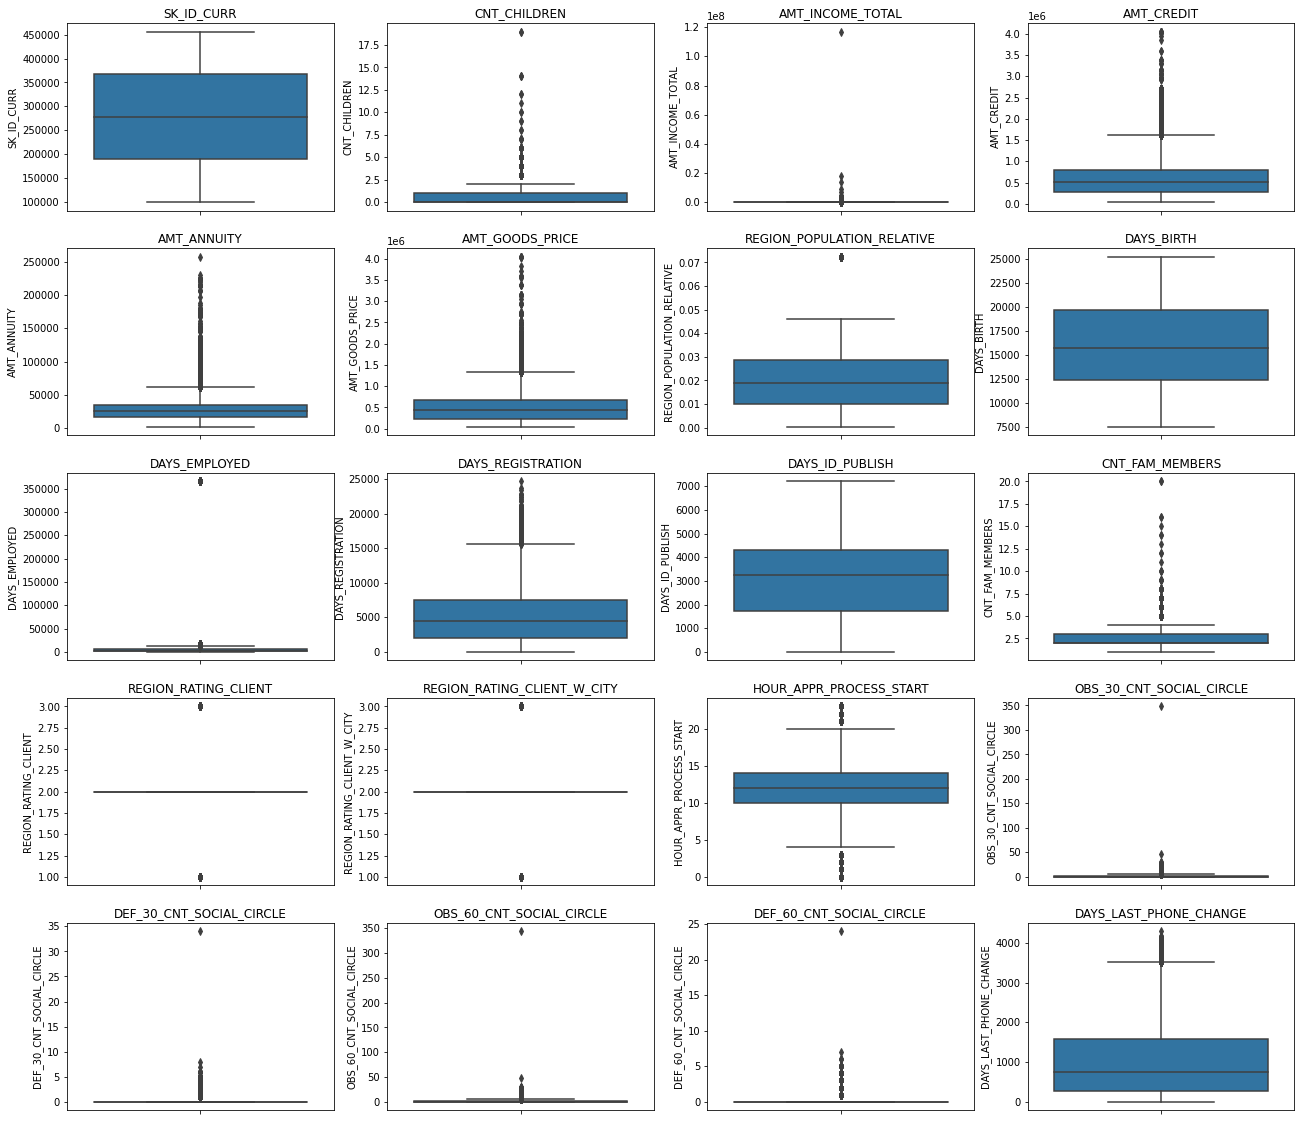

In [119]:
Outliers_col_app = ['SK_ID_CURR' ,'CNT_CHILDREN' ,'AMT_INCOME_TOTAL' ,'AMT_CREDIT' ,'AMT_ANNUITY' ,'AMT_GOODS_PRICE' 
                    ,'REGION_POPULATION_RELATIVE','DAYS_BIRTH' ,'DAYS_EMPLOYED' , 'DAYS_REGISTRATION' , 'DAYS_ID_PUBLISH' , 
                    'CNT_FAM_MEMBERS' , 'REGION_RATING_CLIENT' , 'REGION_RATING_CLIENT_W_CITY' , 'HOUR_APPR_PROCESS_START' ,
                    'OBS_30_CNT_SOCIAL_CIRCLE' , 'DEF_30_CNT_SOCIAL_CIRCLE' , 'OBS_60_CNT_SOCIAL_CIRCLE' , 'DEF_60_CNT_SOCIAL_CIRCLE',
                    'DAYS_LAST_PHONE_CHANGE']

Outliers_col_app_df = application_data_actual[Outliers_col_app]

plt.figure(figsize=(22,20))

j=1
for col in Outliers_col_app_df.columns:
    plt.subplot(5,4,j)
    sns.boxplot(y= Outliers_col_app_df[col])
    plt.title(col)
    j=j+1


Plotted the numeric columns of the table 'application_data_actual' to check of outliers.We found the below insights from the plots:

1. AMT_INCOME_TOTAL,DAYS_EMPLOYED,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,
   DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE , DEF_60_CNT_SOCIAL_CIRCLE  have huge number of Outliers. 
   
2. CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS, HOUR_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE has few outliers.
   
3. SK_ID_CURR, DAYS_BIRTH,DAYS_ID_PUBLISH has no Outliers since SK_ID_CURR is like an ID for most of the customers/clients it is    understandable that it does not have Outliers just like before.
4. DAYS_EMPLOYED has sudden value more than 350,000 days which is not possible. This means data has been incorrectly added to      the column.

<h1> Data Analysis <h1>

<h4>1. Univariate Categorical analysis/Segmented Univariate Analysis <h4>

In [120]:
# Changing the Object type variables to category 
           
for col in application_data_actual.columns:
    if (application_data_actual[col].dtype == 'object'):
        application_data_actual = application_data_actual.astype({col: 'category'})
 
application_data_actual.dtypes


NAME_CONTRACT_TYPE             category
CODE_GENDER                    category
FLAG_OWN_CAR                   category
FLAG_OWN_REALTY                category
NAME_TYPE_SUITE                category
NAME_INCOME_TYPE               category
NAME_EDUCATION_TYPE            category
NAME_FAMILY_STATUS             category
NAME_HOUSING_TYPE              category
OCCUPATION_TYPE                category
WEEKDAY_APPR_PROCESS_START     category
ORGANIZATION_TYPE              category
TARGET                         category
FLAG_EMP_PHONE                 category
FLAG_WORK_PHONE                category
FLAG_PHONE                     category
REG_CITY_NOT_WORK_CITY         category
LIVE_CITY_NOT_WORK_CITY        category
FLAG_DOCUMENT_3                category
SK_ID_CURR                        int64
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64


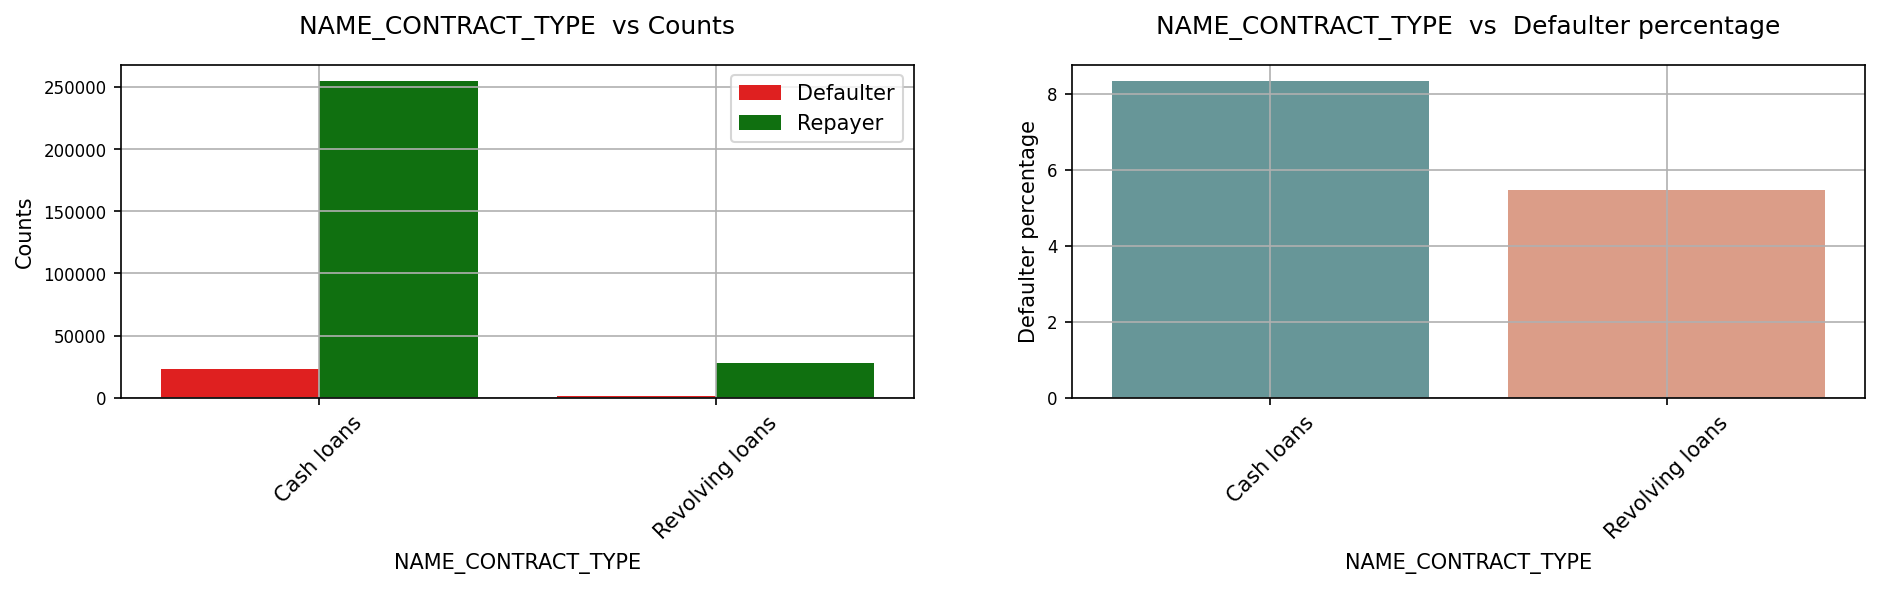

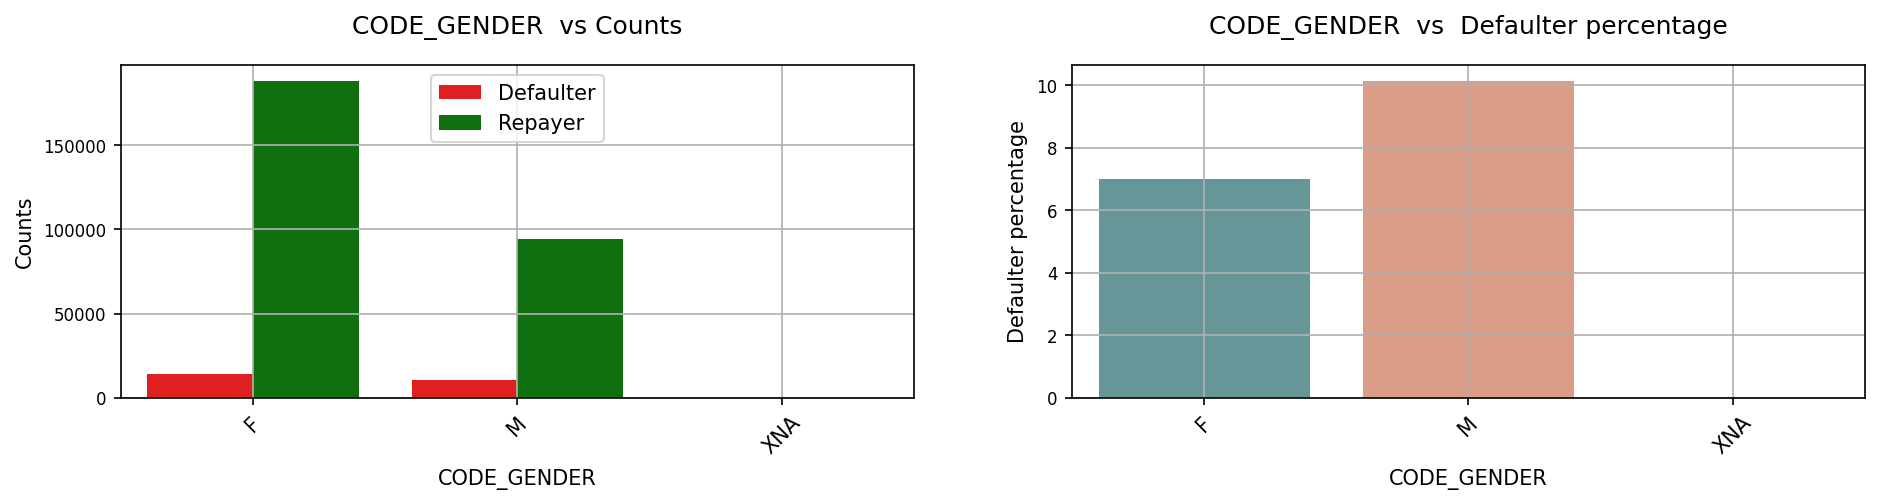

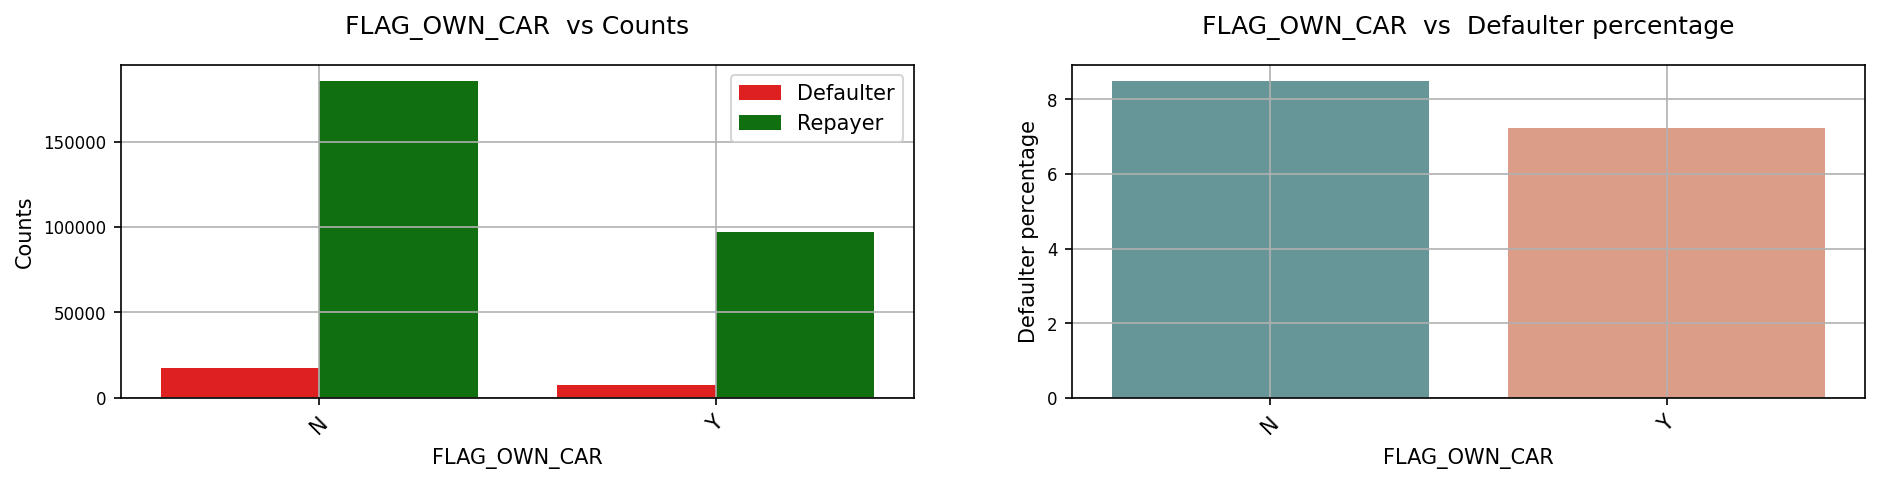

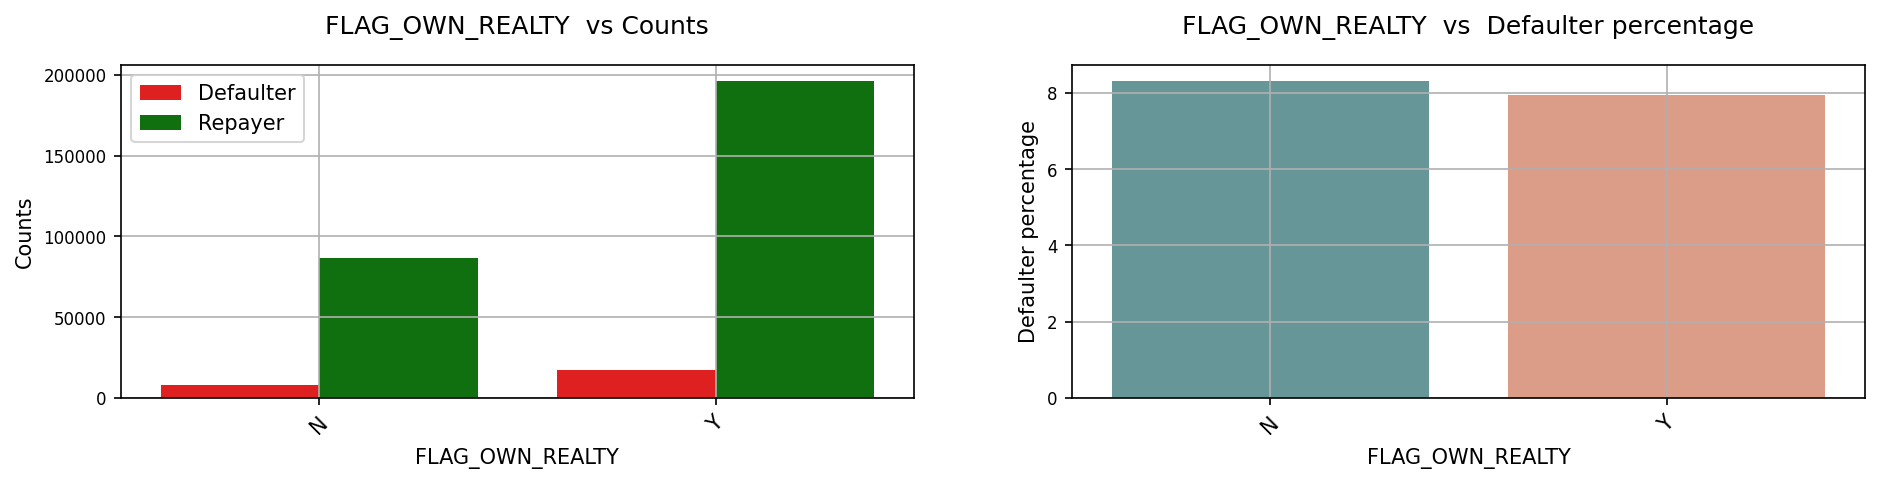

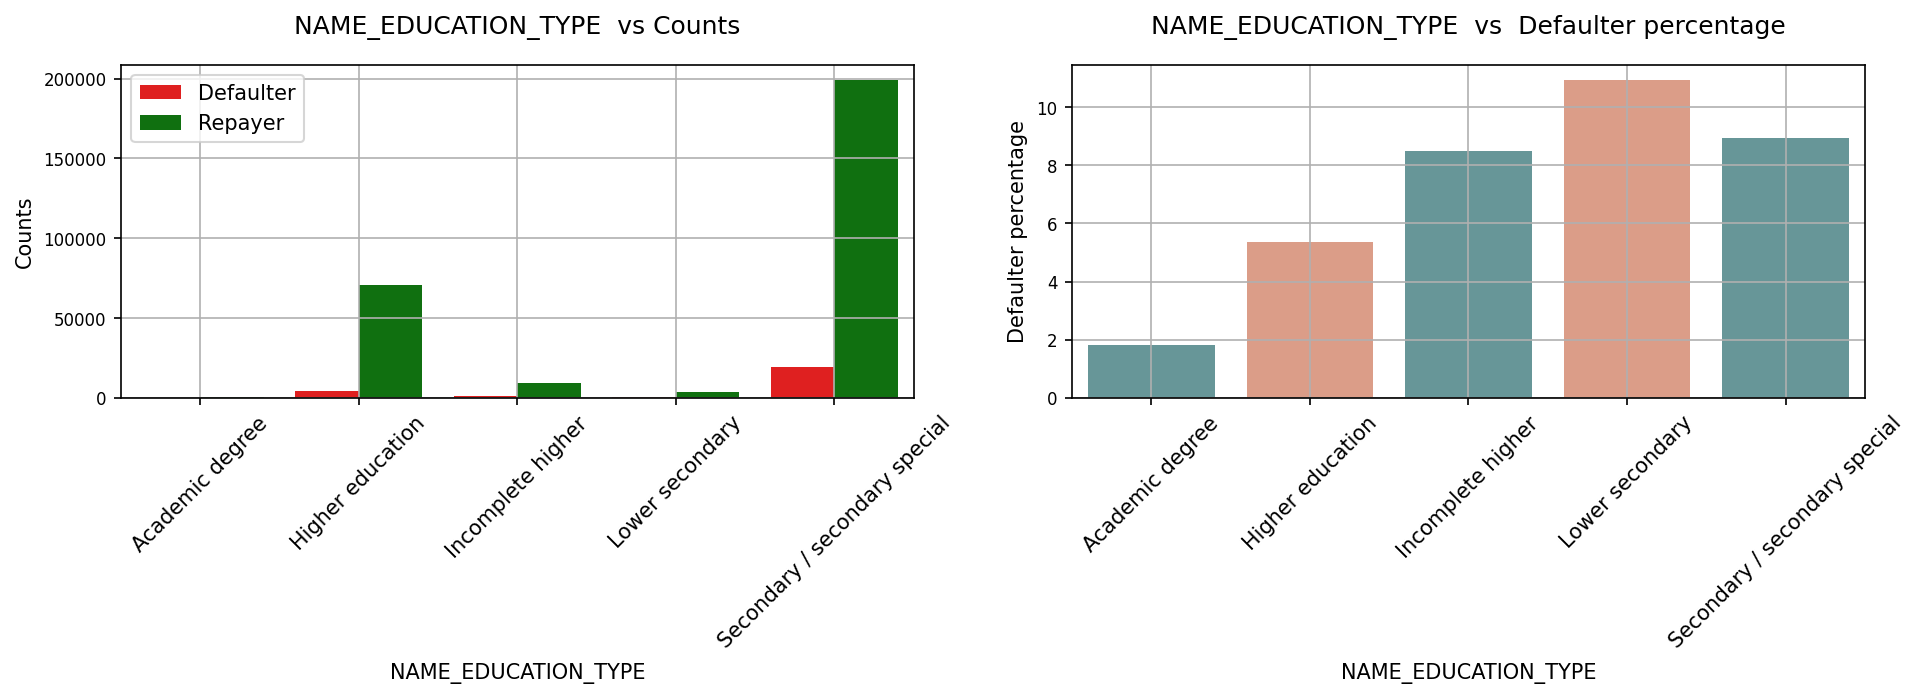

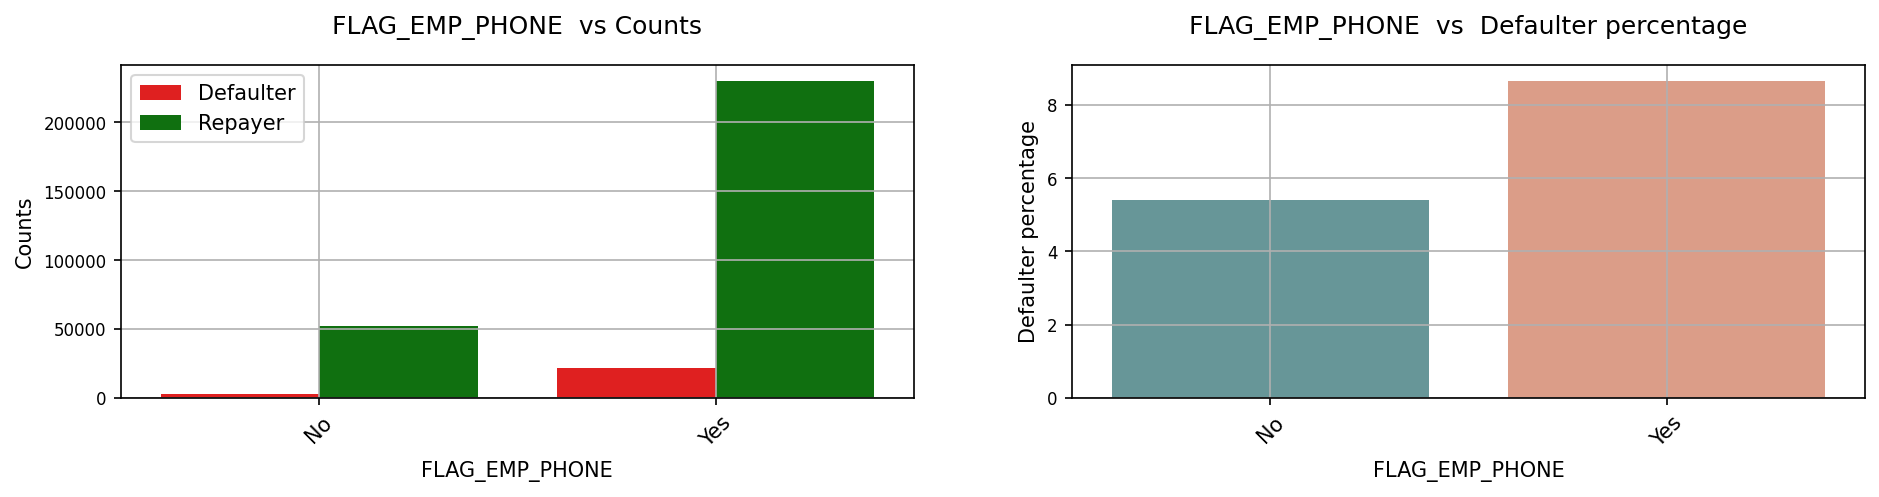

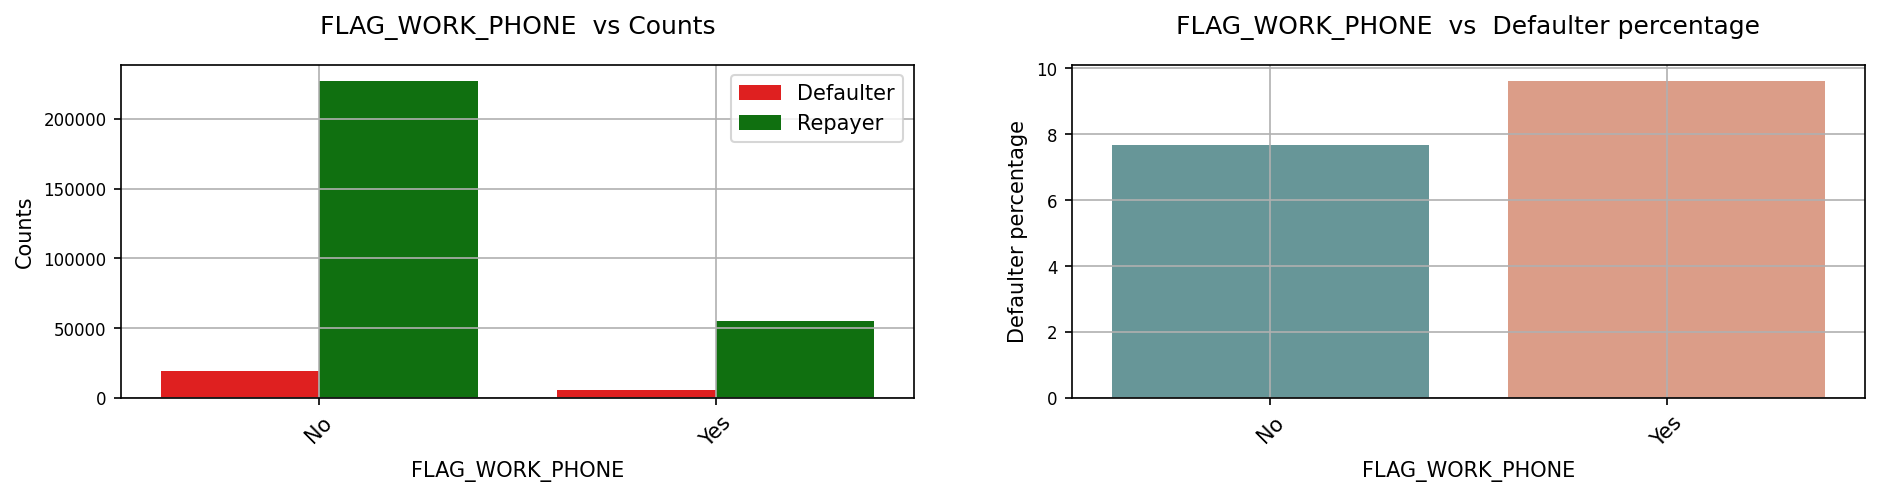

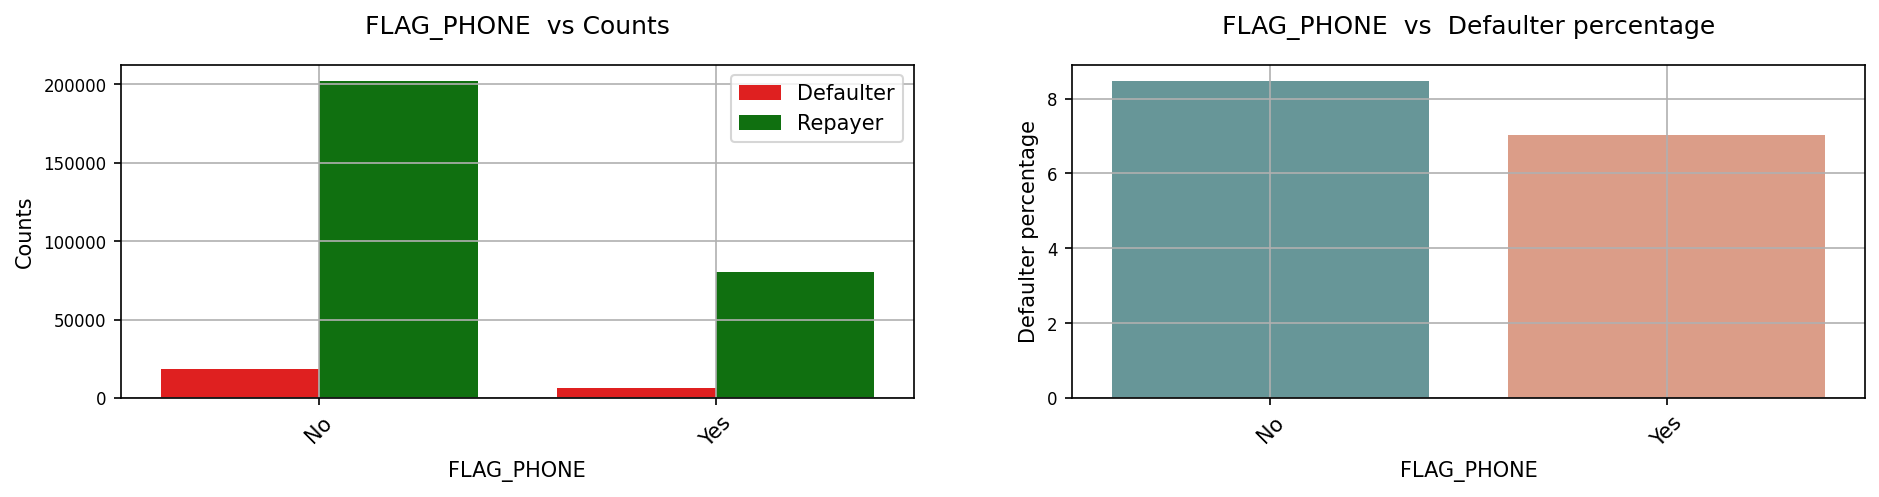

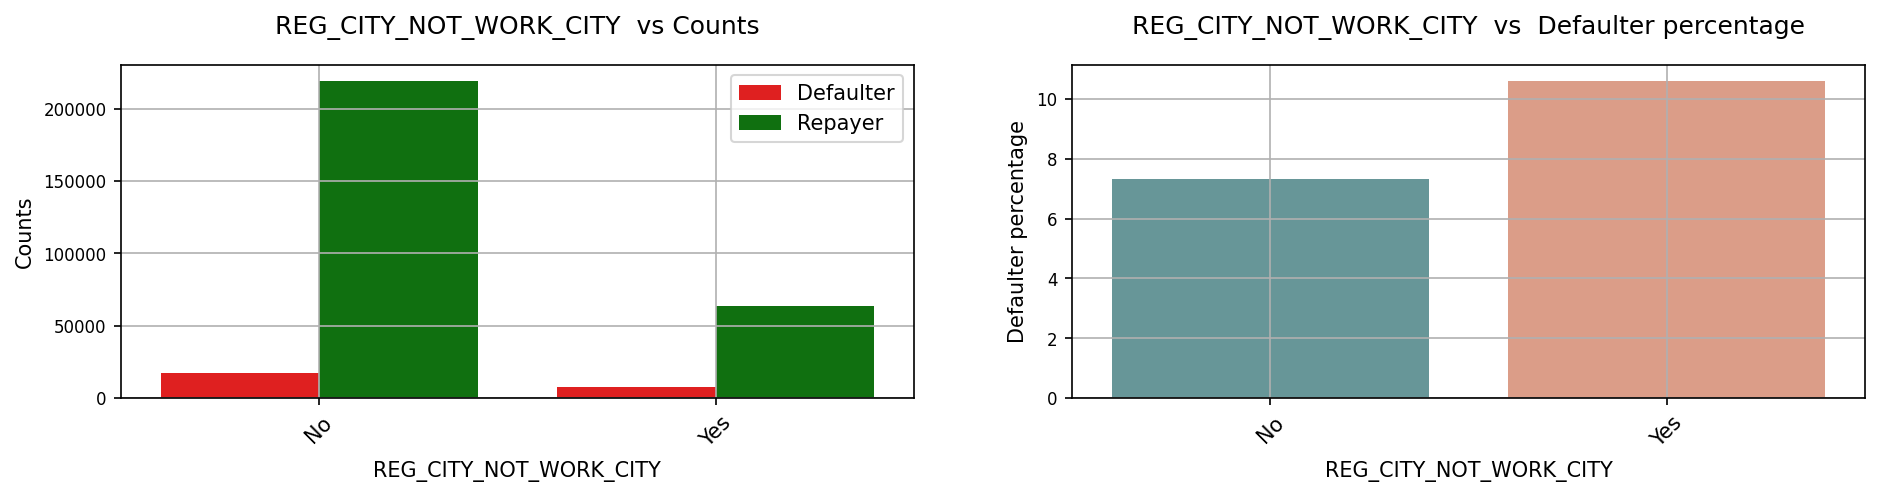

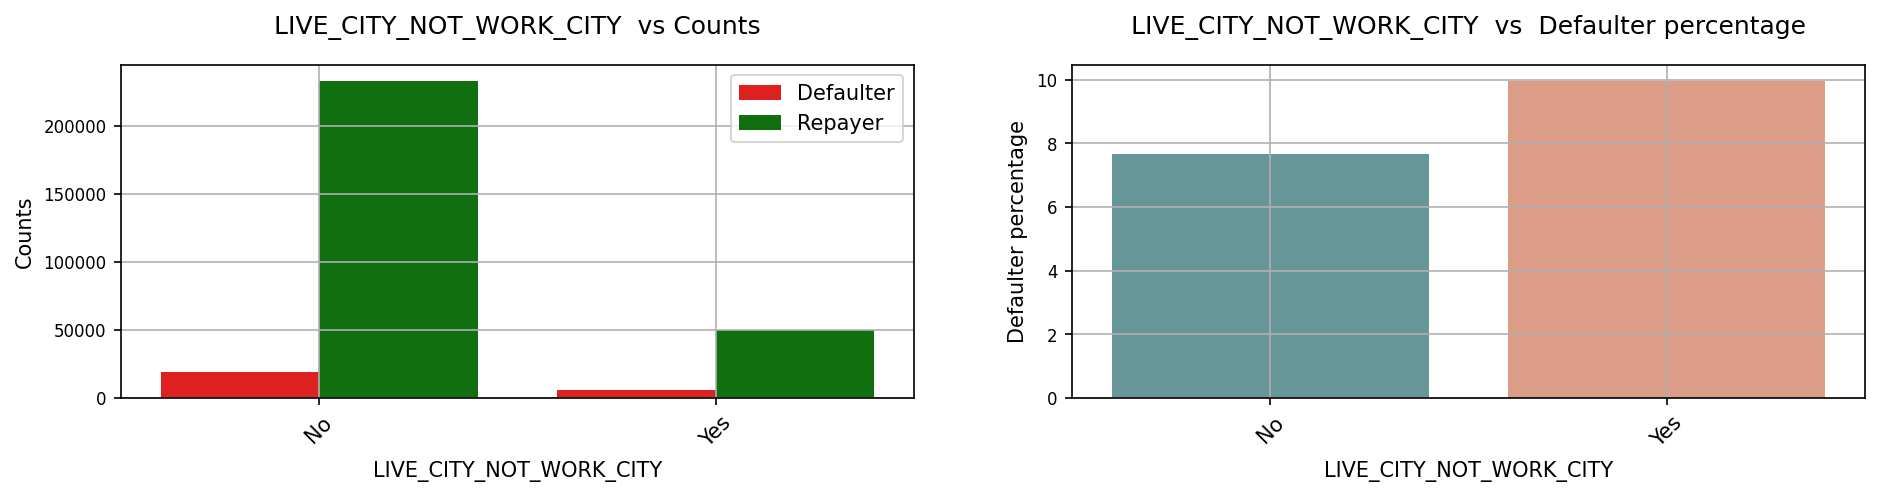

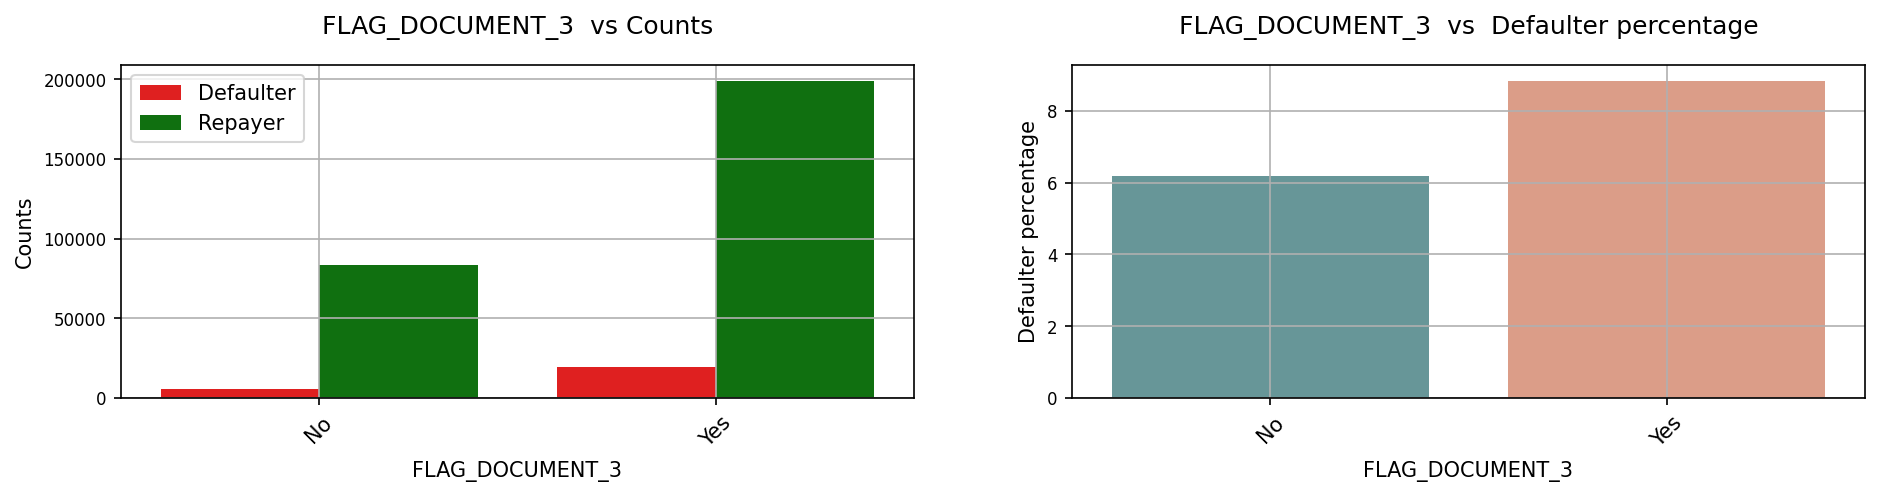

<Figure size 432x288 with 0 Axes>

In [121]:
i=1

for col in application_data_actual.columns:
    if (application_data_actual[col].dtype == 'category' and col != 'TARGET' and application_data_actual[col].nunique()<=5):
                           
                              fig1 = plt.figure(figsize=(15,70), dpi =150)

                              plt.subplot(20, 2, i)
                              ax1 = sns.countplot(x = application_data_actual[col], hue=application_data_actual["TARGET"],palette=["r","g"])
                              plt.yticks(fontsize=8)
                              plt.xticks(fontsize=10,rotation = 45)
                              ax1.set_title(col + '  vs Counts', pad = 15,loc = 'center')
                              plt.xlabel(col, labelpad =5 )
                              plt.ylabel("Counts")
                              ax1.set(xlabel= col, ylabel = "Counts")
                              ax1.grid(True)
                              plt.legend()

                              Defaulter_per = application_data_actual[[col,'TARGET']]
                              total_num = Defaulter_per.groupby(col).count()
                              Defaulter_per = Defaulter_per[Defaulter_per['TARGET'] == 'Defaulter'].groupby([col]).count()
                              temp_df = Defaulter_per/total_num *100

                              i = i+1
                              plt.subplot(20, 2, i)
                              ax2 = sns.barplot(x = temp_df.index, y = temp_df['TARGET'],palette=["cadetblue"])
                              plt.yticks(fontsize=8)
                              plt.xticks(fontsize=10,rotation = 45)
                              ax2.set_title(col + "  vs  Defaulter percentage", pad = 15,loc = 'center')
                              plt.xlabel(col, labelpad =5 )
                              plt.ylabel("Defaulter percentage")
                              ax2.set(xlabel= col, ylabel = "Defaulter percentage")
                              ax2.grid(True)
                              plt.show()

                              i = i+1

plt.subplots_adjust(left= 0.1, right=1, bottom=0.1, top=1, wspace=0.4, hspace=5,)
plt.show()



Observation:
    
1. Contract type: Revolving loans are very few compared to the total number of loans. However, still they have a Defaulter percentage
                  close to Cash loans.
2. CODE_GENDER  : Females are taking lot more loans than Males but they are paying it back. On the other hand, Males(>8%) are higher.
                  a defaulter percentage than Females (7%).
3. FLAG_OWN_CAR : Most of the Clients do not own Cars but both categories have almost same Deafulter Percentage.

4. FLAG_OWN_REALTY : Most of the Clients own Real Estate but there is no corelation between owning Real Estate and being a Defaulter.

5. NAME_EDUCATION_TYPE : Clients with Secondary /Secondary special are one taking most of the loans. However, Clients with lower Secondary Education are the ones defaulting. People with Academic degrees are the one defaulting theleast. Hence Education is a decisive factor to predict defaulters.

6. FLAG_EMP_PHONE, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_PHONE,FLAG_DOCUMENT_3  : These  Fields do not have much effect on the  pattern of Defaulter as the percentage is almost same whether it is a yes or not.

7. REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY : These two fields have almost the same impact on the defaulter percentage. If the Registered or Living city is not the Work city then they are tend to default more.

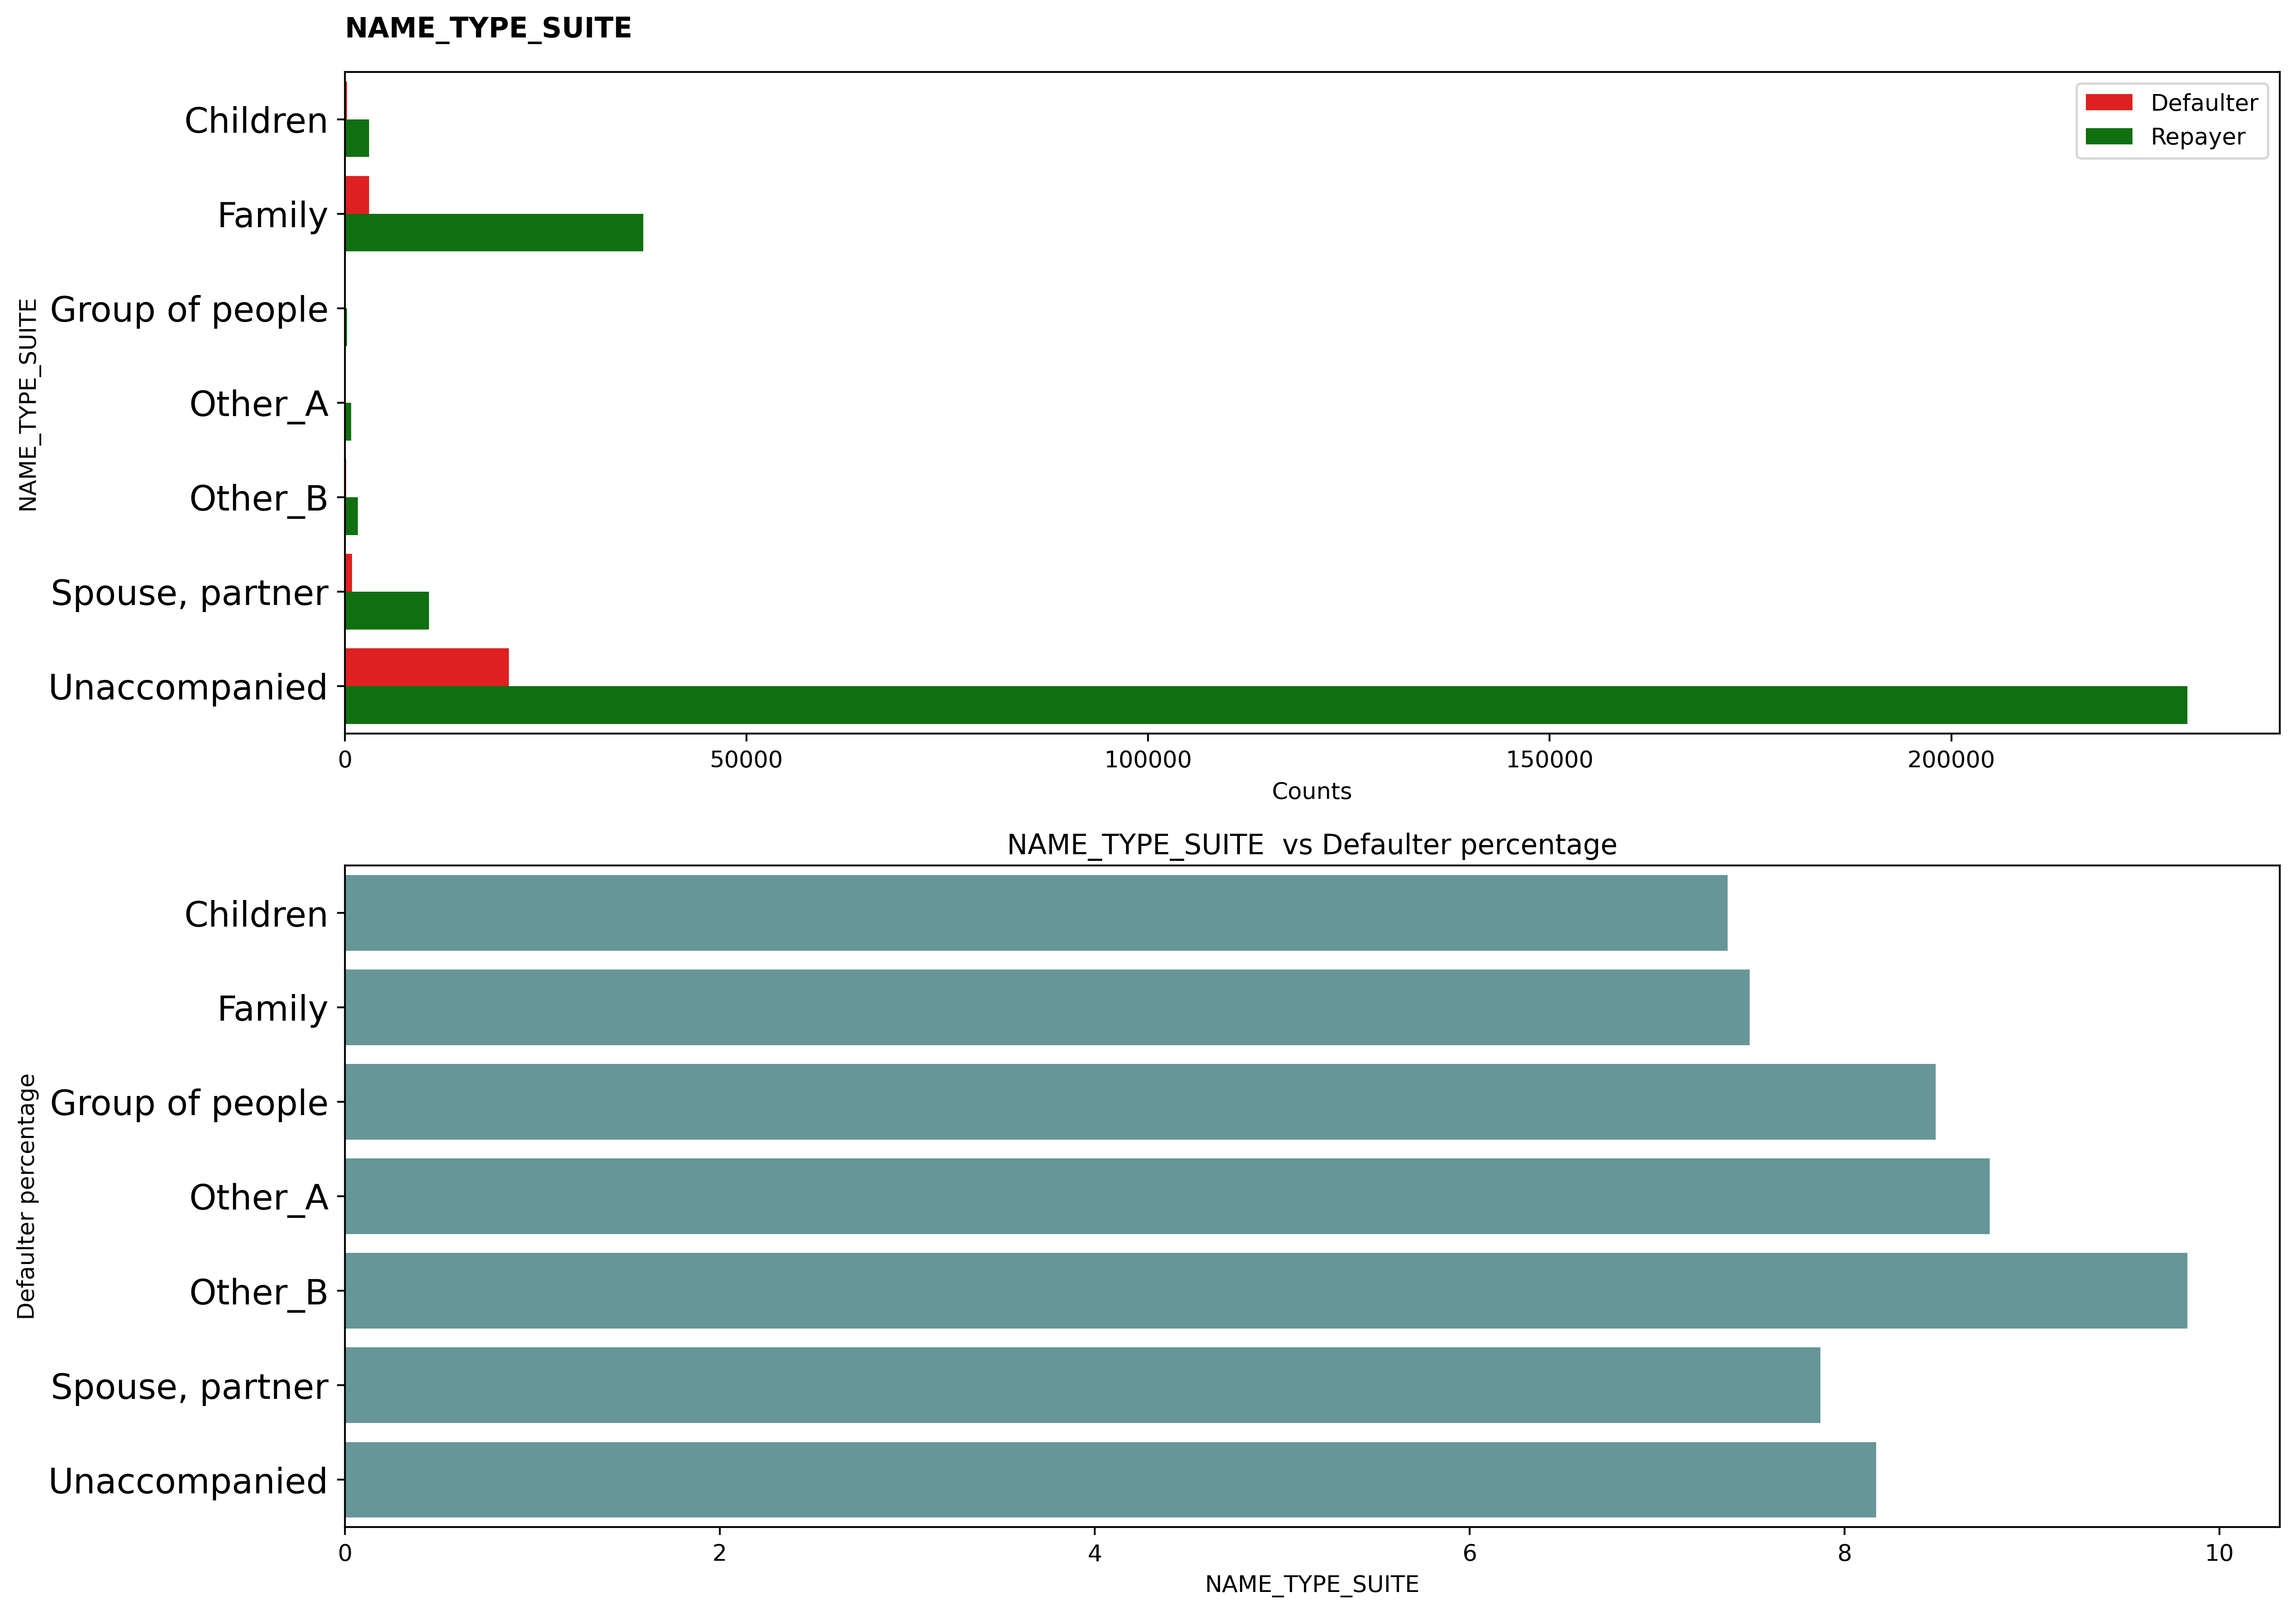

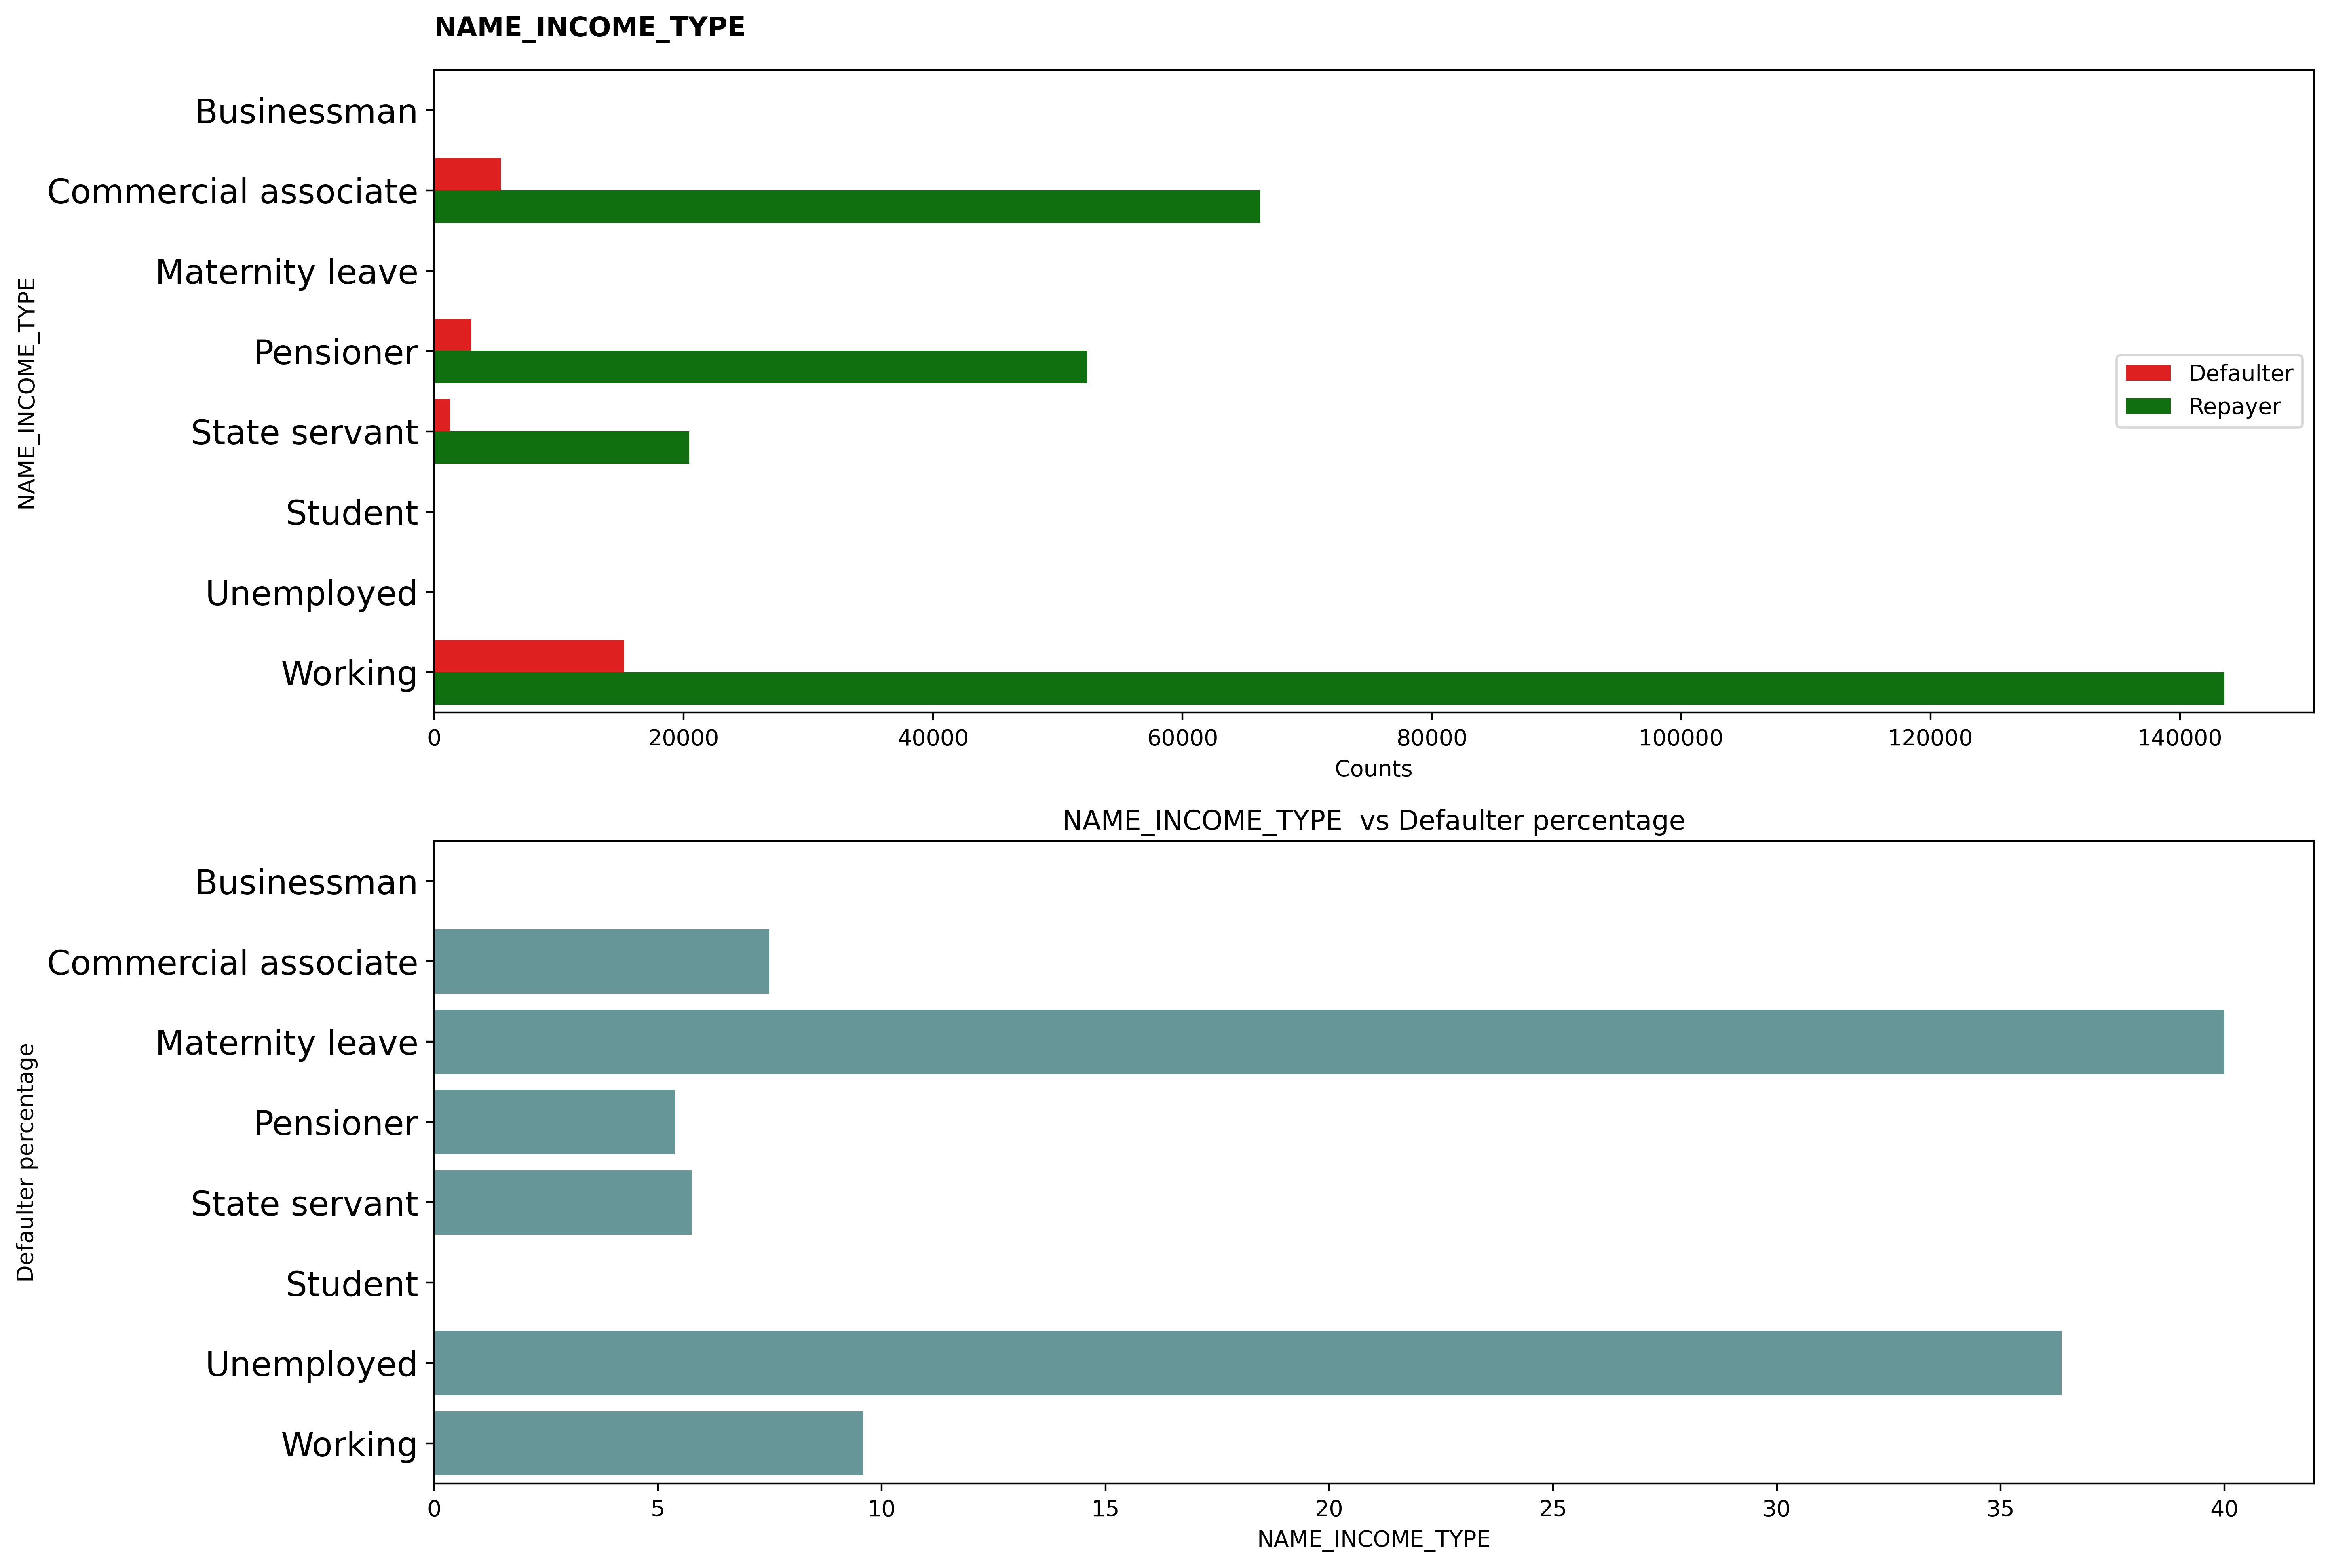

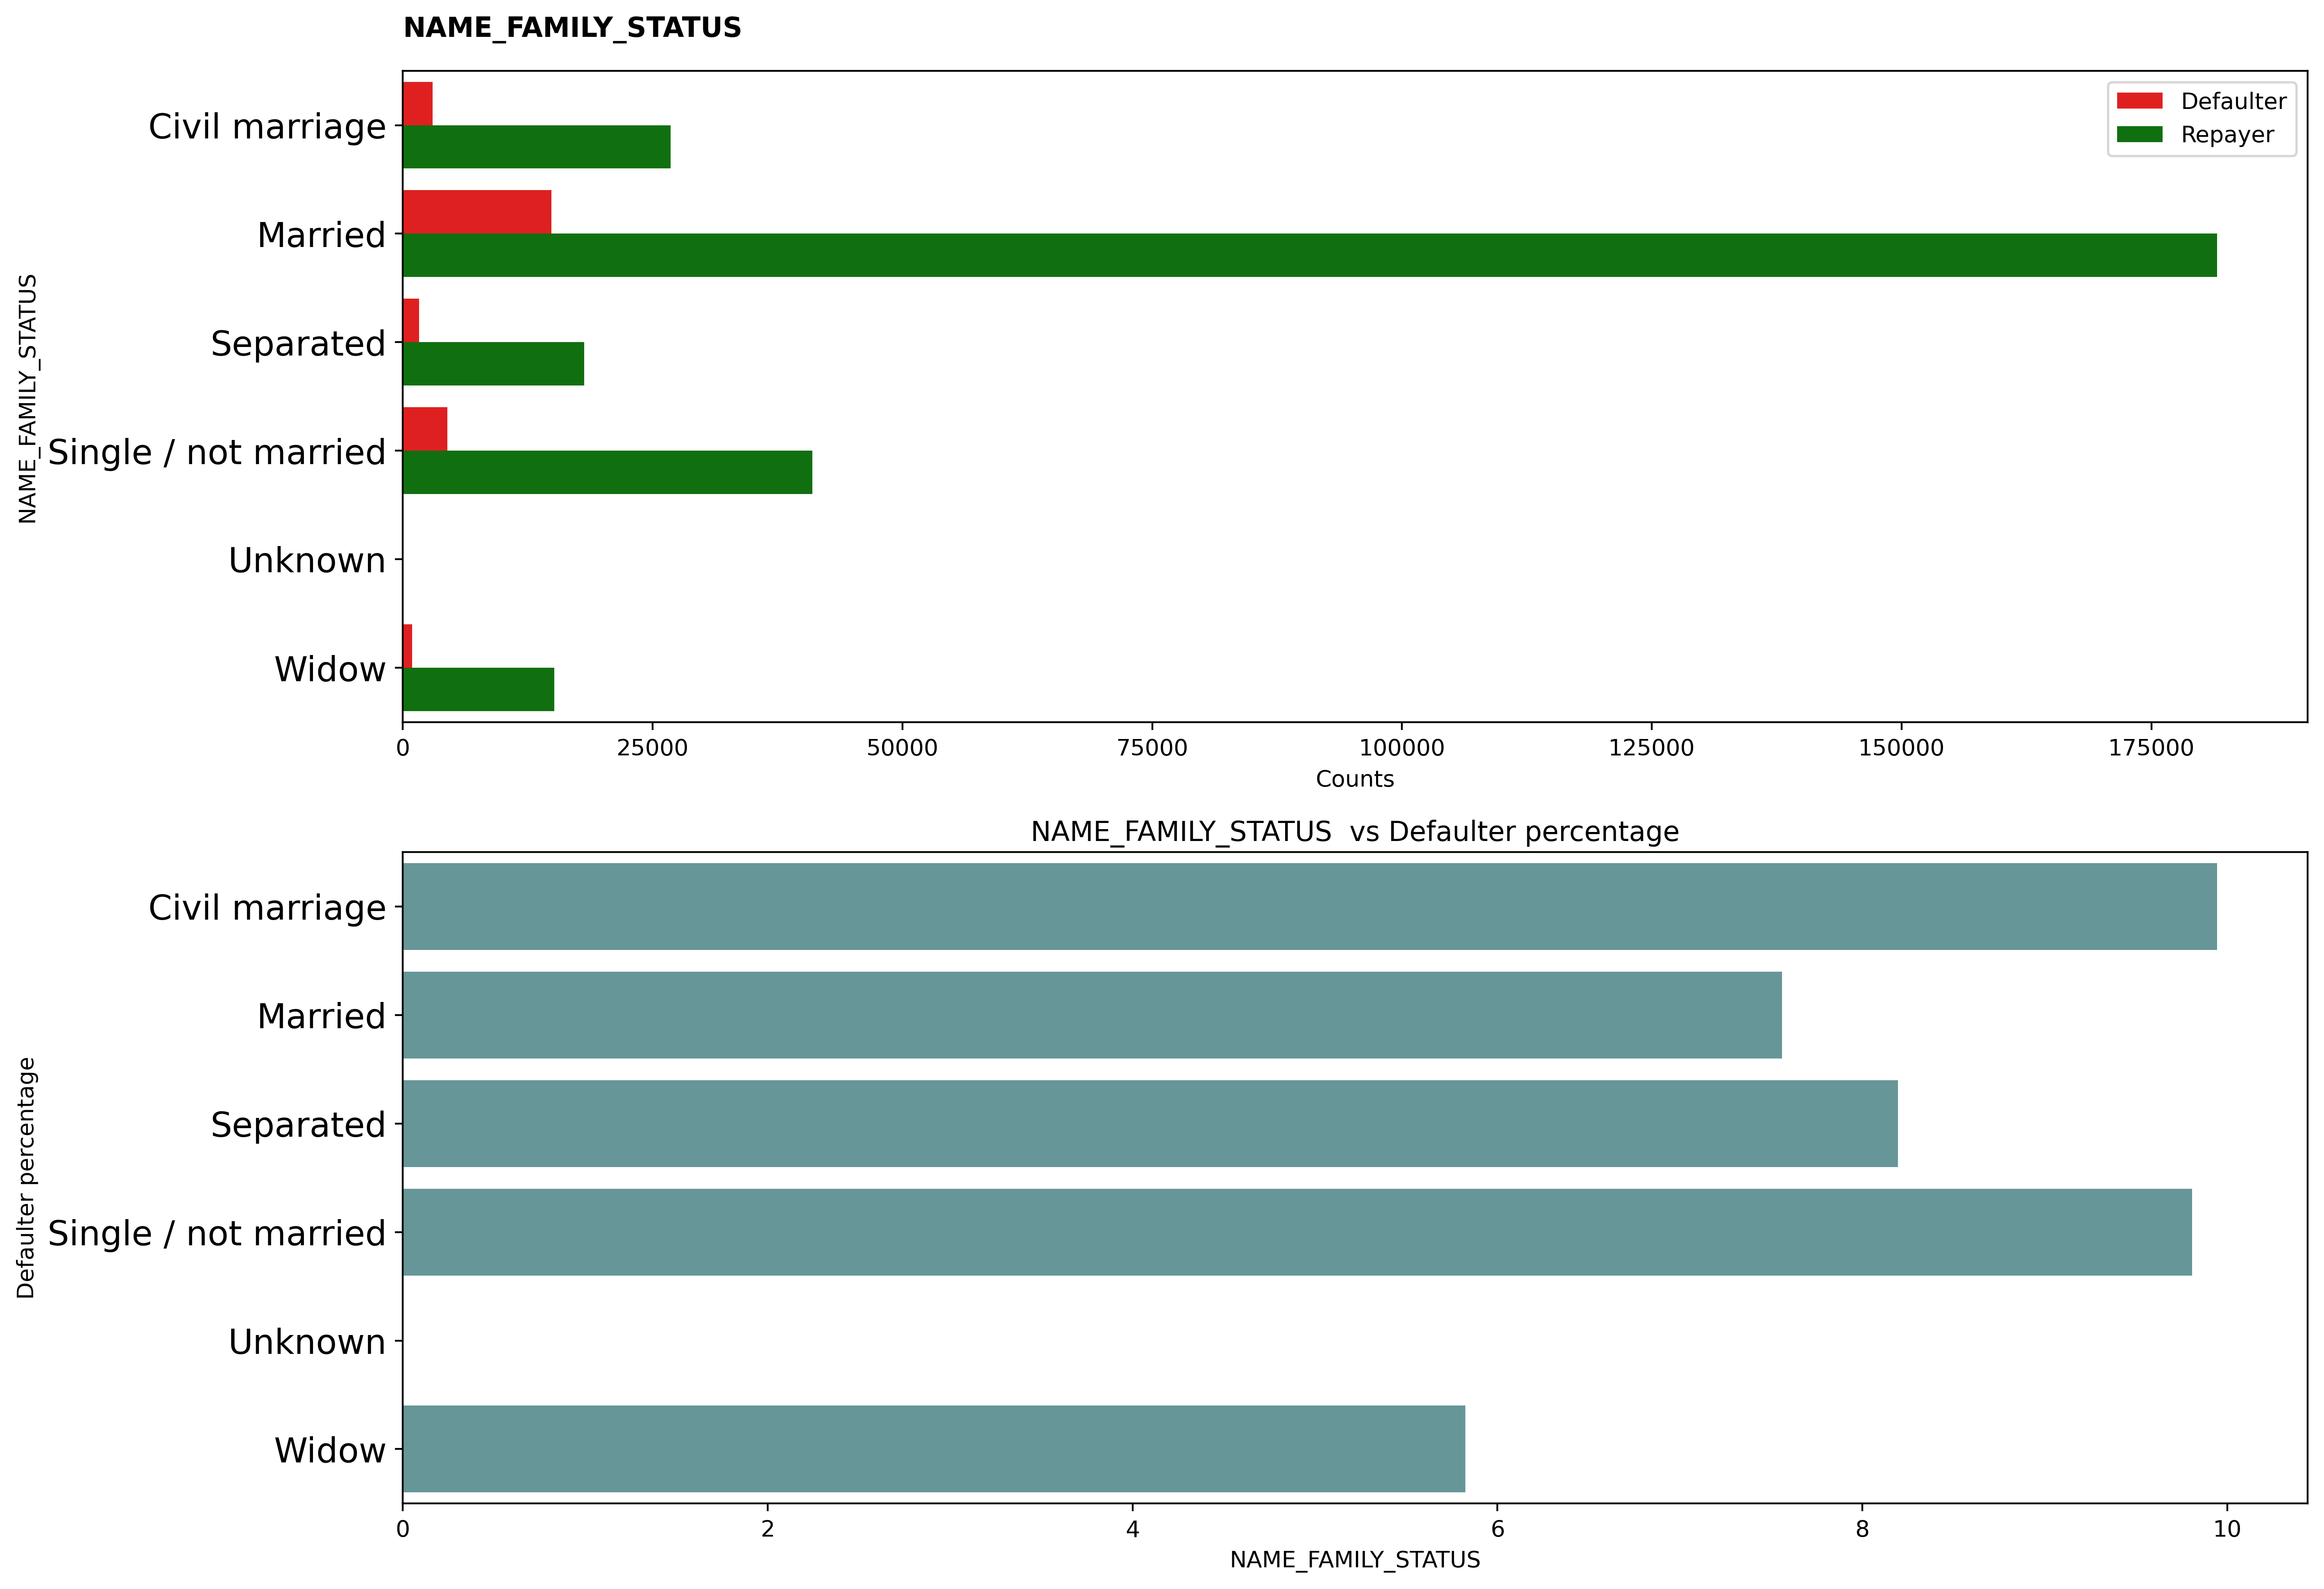

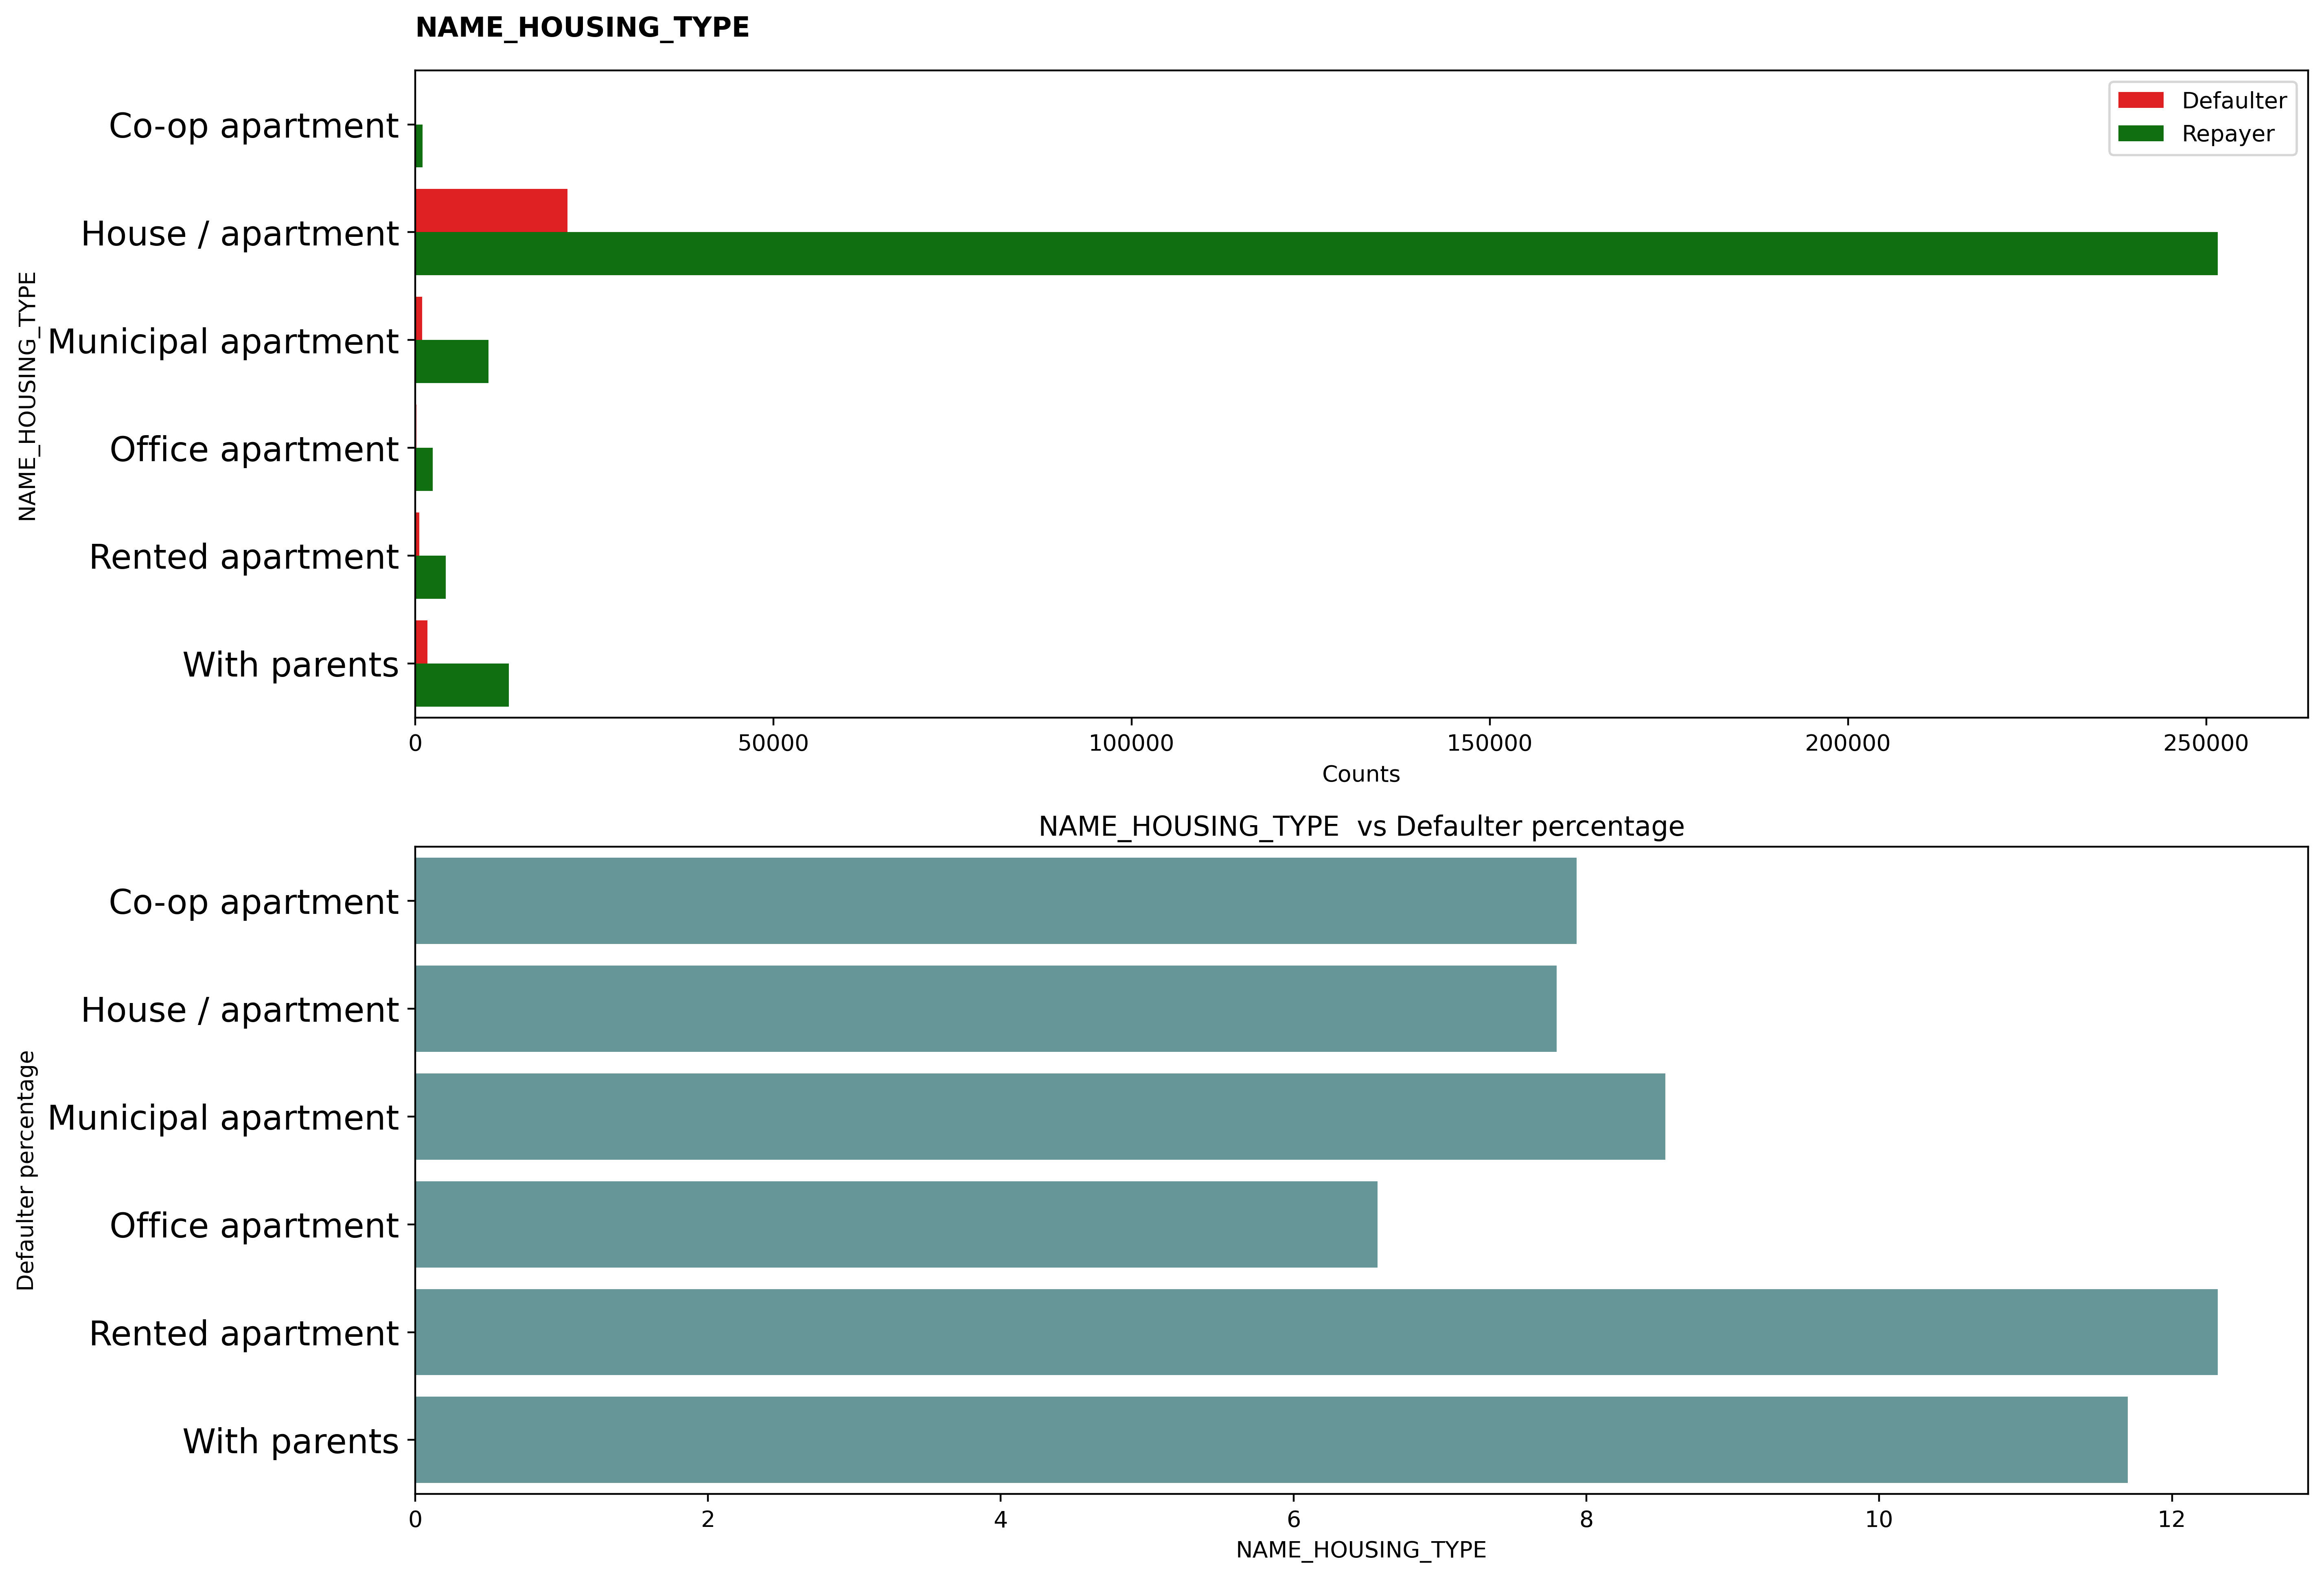

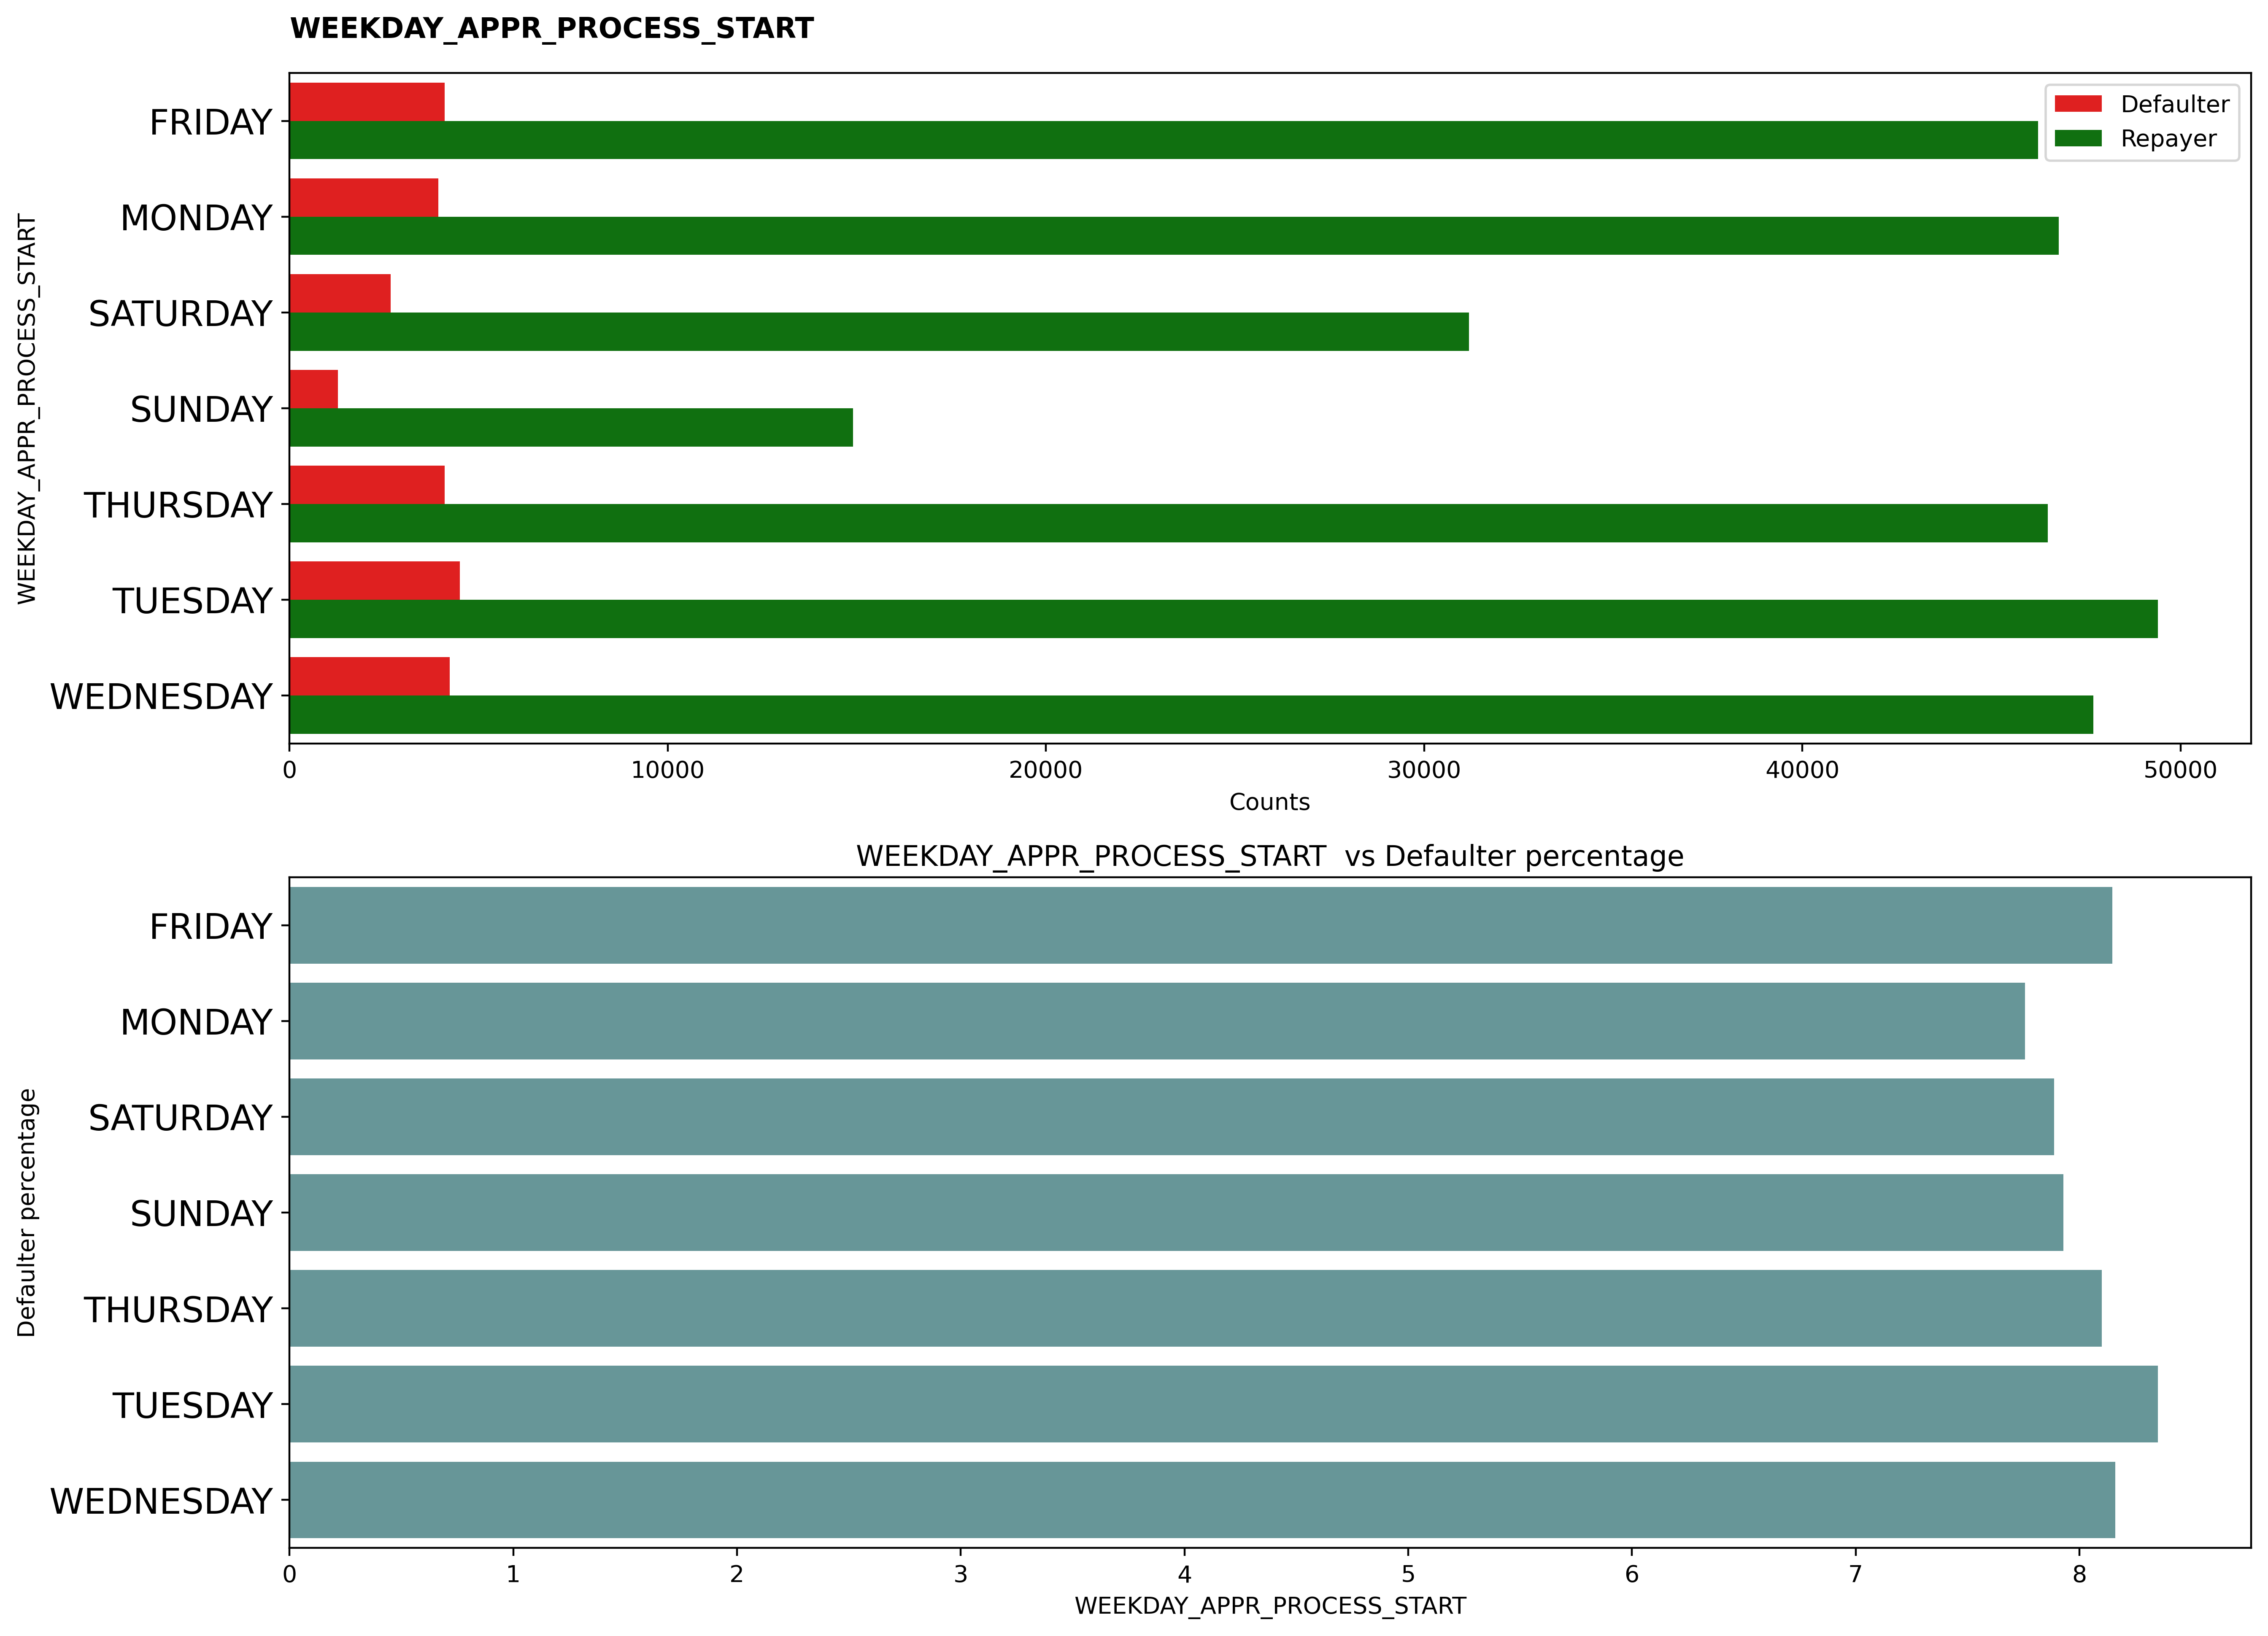

<Figure size 432x288 with 0 Axes>

In [122]:
i = 1
j = 1
for col in application_data_actual.columns:
     if(application_data_actual[col].dtype == 'category' and col != 'TARGET' and application_data_actual[col].nunique()>5 and application_data_actual[col].nunique()<10):
                
                  fig1 = plt.figure(figsize=(15,100), dpi = 400)
                  plt.subplot(16, 1, i)
                  ax1 = sns.countplot(y = application_data_actual[col], hue=application_data_actual["TARGET"],palette=["r","g"]
                                      , orient ="horizontal")
                  plt.yticks(fontsize= 15,rotation = 'horizontal')
                  ax1.set_title(col, pad = 15,loc = 'left', fontweight ="bold")
                  plt.xlabel("")
                  plt.ylabel("")
                  ax1.set(ylabel= col, xlabel = "Counts")
                  plt.legend()
                  

                  Defaulter_per = application_data_actual[[col,'TARGET']]
                  total_num = Defaulter_per.groupby(col).count()
                  Defaulter_per = Defaulter_per[Defaulter_per['TARGET'] == 'Defaulter'].groupby([col]).count()
                  temp_df = Defaulter_per/total_num *100
                    
                  
                  i = i+1
                  
                  plt.subplot(16, 1, i)
                  ax2 = sns.barplot(y = temp_df.index, x = temp_df['TARGET'], palette=["cadetblue"],orient ="h")
                  plt.yticks(fontsize=15, rotation = 'horizontal')
                  ax2.set_title(col + "  vs Defaulter percentage", pad =5,loc = 'center')
                  plt.xlabel("")
                  plt.ylabel("")
                  ax2.set(xlabel= col, ylabel = "Defaulter percentage")
                  plt.show()
                  
                  fig1.tight_layout(pad = 4)
                 

                  i = i+1
                  j= j+1

plt.subplots_adjust(left= 1, right=2, bottom=0.2, top=1, wspace=0.4, hspace=3,)
plt.show()                

Observation:

1. Name_type_Suite : In this field most of the Clients were unaccompanies while applying for the loan. However, there is a particular category which is defaulting more that is Other B. More information is required in the category.
2. Name_Income_type : Working People are taking most of the Loans but Women on Maternity Leave or Unemployed Clients are defaulting the most. 
3. Name_Family_status : In this Field most of the loans are taken by married people but the defaulters are people with Civil Marriage and those who are Single. 
4. Name_Housing_type : People living in Apartments/Flats are taking more loans but clients living in Rented places and with Parents are defaulting more. 
5. Weekday_process_start : This field not at all useful as it does not predict the client's ability to repay or not. However, we can see that most of the loan processes are started on weekdays as on weekend banks are closed.

In [123]:
col = 'OCCUPATION_TYPE'
        
fig1 = plt.figure(figsize=(50,100), dpi = 150)
plt.subplot(2, 1, 1)
ax1 = sns.countplot(y = application_data_actual[col], hue=application_data_actual["TARGET"],palette=["r","g"], orient ="horizontal")
plt.yticks(fontsize= 40,rotation = 'horizontal')
plt.xticks(fontsize= 40)
ax1.set_title(col, pad = 15,loc = 'center', fontweight ="bold", fontsize= 50)
plt.xlabel("", fontsize= 50)
plt.ylabel("", fontsize= 50)
ax1.set(ylabel= col, xlabel = "Counts")
plt.legend(prop={'size': 30})

Defaulter_per = application_data_actual[[col,'TARGET']]
total_num = Defaulter_per.groupby(col).count()
Defaulter_per = Defaulter_per[Defaulter_per['TARGET'] == 'Defaulter'].groupby([col]).count()
temp_df = Defaulter_per/total_num *100

                                    
plt.subplot(2, 1, 2)
ax2 = sns.barplot(y = temp_df.index, x = temp_df['TARGET'], palette=["cadetblue"],orient ="h")
plt.yticks(fontsize=40, rotation = 'horizontal')
plt.xticks(fontsize= 40)
ax2.set_title(col + "  vs Defaulter percentage", pad =5,loc = 'center',fontweight ="bold",fontsize= 50)
plt.xlabel("", fontsize= 50)
plt.ylabel("", fontsize= 50)
ax2.set(xlabel= col, ylabel = "Defaulter percentage")
plt.show()
                  
fig1.tight_layout(pad = 2)
                  
plt.subplots_adjust(left= 1, right=2, bottom=0.1, top=1, wspace=0.4, hspace=2,)
plt.show()      

<Figure size 432x288 with 0 Axes>

Observation: 

1. We have lot of values in Others but still we can say that Labourers are taking a lot of loans and the ones with low Skill Labour are not paying it back. 

2. We need to check the Client's Occupation thorooughly before providing the loan.

In [124]:
col = 'ORGANIZATION_TYPE'
        
fig1 = plt.figure(figsize=(50,150), dpi = 150)
plt.subplot(2, 1, 1)
ax1 = sns.countplot(y = application_data_actual[col], hue=application_data_actual["TARGET"],palette=["r","g"], orient ="horizontal")
plt.yticks(fontsize= 40,rotation = 'horizontal')
plt.xticks(fontsize= 40)
ax1.set_title(col, pad = 20,loc = 'center', fontweight ="bold", fontsize= 50)
plt.xlabel("", fontsize= 50)
plt.ylabel("", fontsize= 50)
ax1.set(ylabel= col, xlabel = "Counts")
plt.legend(prop={'size': 30})

Defaulter_per = application_data_actual[[col,'TARGET']]
total_num = Defaulter_per.groupby(col).count()
Defaulter_per = Defaulter_per[Defaulter_per['TARGET'] == 'Defaulter'].groupby([col]).count()
temp_df = Defaulter_per/total_num *100

                                    
plt.subplot(2, 1, 2)
ax2 = sns.barplot(y = temp_df.index, x = temp_df['TARGET'], palette=["cadetblue"],orient ="h")
plt.yticks(fontsize=40, rotation = 'horizontal')
plt.xticks(fontsize= 40)
ax2.set_title(col + "  vs Defaulter percentage", pad =20,loc = 'center',fontweight ="bold",fontsize= 50)
plt.xlabel("", fontsize= 50)
plt.ylabel("", fontsize= 50)
ax2.set(xlabel= col, ylabel = "Defaulter percentage")

plt.show()
                  
fig1.tight_layout(pad = 0.5)
plt.subplots_adjust(left= 1, right=2, bottom=0.1, top=0.5, wspace=0.4, hspace=1,)
plt.show()    

<Figure size 432x288 with 0 Axes>

Observations:

1. Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.

2. Most of the people application for loan are from Business Entity Type 3

3. For a very high number of applications, Organization type information is unavailable(XNA)

It can be seen that following category of organization type has lesser defaulters thus safer for providing loans:

1. Trade Type 4
2. Transport : type 1
3. Industry type 12

<h4>2. Univariate numerical analysis <h4>

In [125]:
# Now we will be creating two Dataframes with only Repayers and Defaulters

Columns_for_corr = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE','DAYS_BIRTH',
'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 
'HOUR_APPR_PROCESS_START', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

Repayers_df = application_data_actual[application_data_actual['TARGET'] == 'Repayer'][Columns_for_corr]
print('\nRepayers ------------------\n\n ', Repayers_df.head(10))
Defaulters_df = application_data_actual[application_data_actual['TARGET'] == 'Defaulter'][Columns_for_corr]
print('\nDefaulater ------------------\n\n ', Defaulters_df.head(10))



Repayers ------------------

      CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
1              0          270000.0   1293502.5      35698.5        1129500.0   
2              0           67500.0    135000.0       6750.0         135000.0   
3              0          135000.0    312682.5      29686.5         297000.0   
4              0          121500.0    513000.0      21865.5         513000.0   
5              0           99000.0    490495.5      27517.5         454500.0   
6              1          171000.0   1560726.0      41301.0        1395000.0   
7              0          360000.0   1530000.0      42075.0        1530000.0   
8              0          112500.0   1019610.0      33826.5         913500.0   
9              0          135000.0    405000.0      20250.0         405000.0   
10             1          112500.0    652500.0      21177.0         652500.0   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1      

<AxesSubplot:>

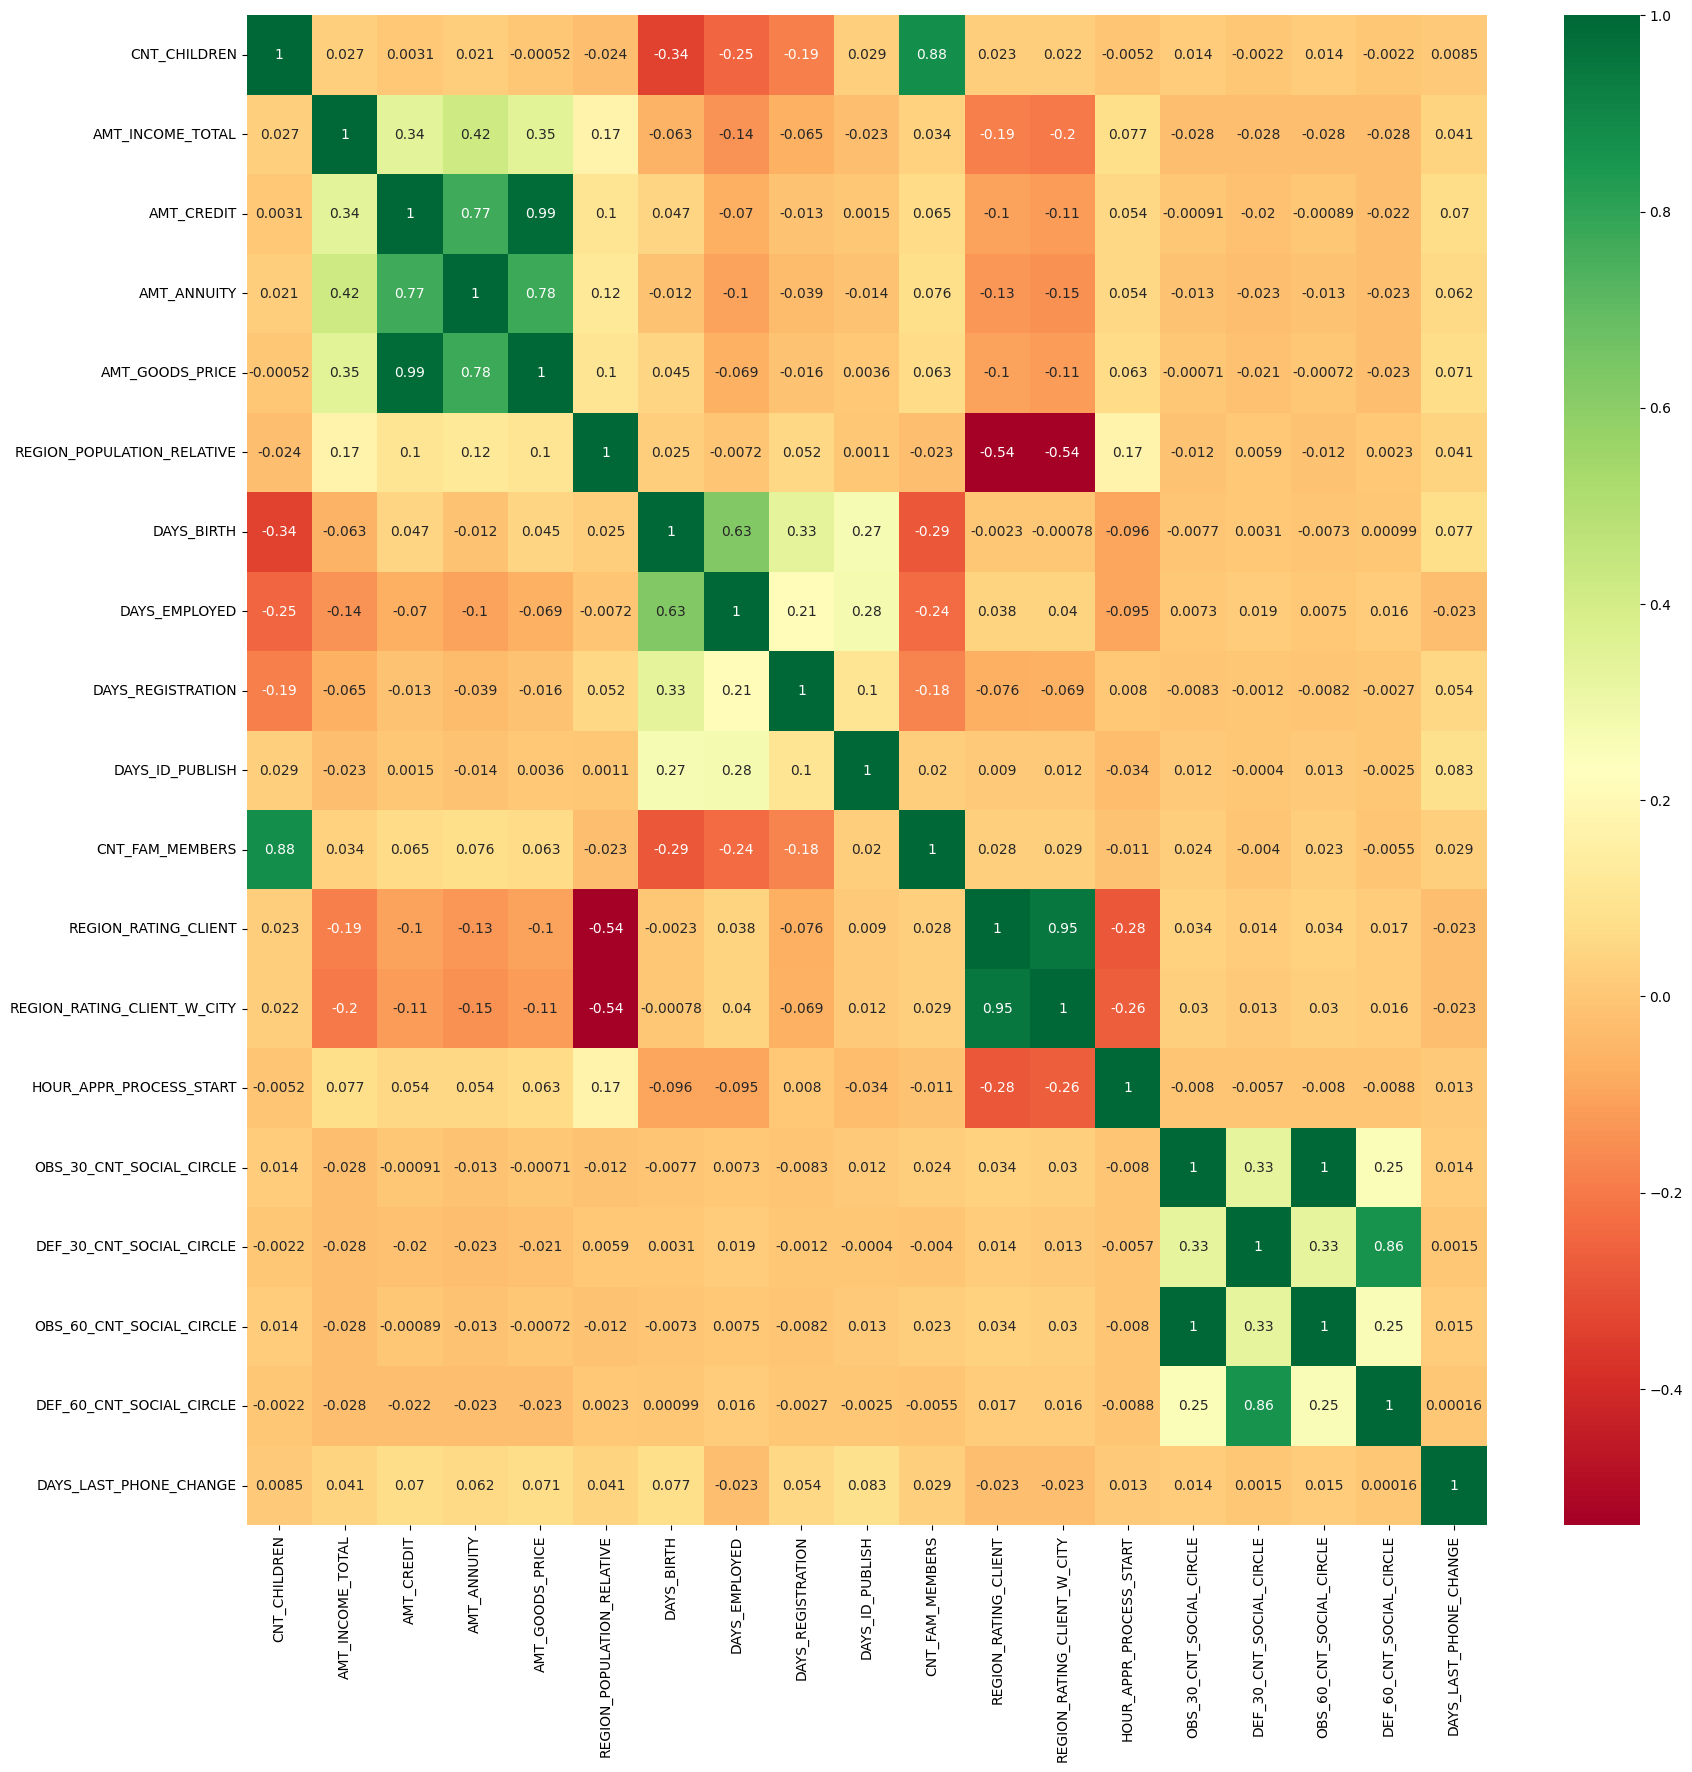

In [126]:
corr_repayers = Repayers_df.corr()
fig1 = plt.figure(figsize=(20,20), dpi = 100)
sns.heatmap(corr_repayers, xticklabels=corr_repayers.columns, yticklabels=corr_repayers.columns, annot = True, cmap ="RdYlGn")

# Plotting a heatmap for Correlation

In [127]:
corr_repayers = corr_repayers.where(np.triu(np.ones(corr_repayers.shape),1).astype(bool))
corr_df_repayer = corr_repayers.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

# Top 10 Variable Correlations in the Data for Repayers

VAR1                        VAR2  Correlation
318     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998508
78               AMT_GOODS_PRICE                  AMT_CREDIT     0.987250
239  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.950149
190              CNT_FAM_MEMBERS                CNT_CHILDREN     0.878571
338     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.859332
79               AMT_GOODS_PRICE                 AMT_ANNUITY     0.776686
59                   AMT_ANNUITY                  AMT_CREDIT     0.771309
139                DAYS_EMPLOYED                  DAYS_BIRTH     0.626114
214         REGION_RATING_CLIENT  REGION_POPULATION_RELATIVE     0.539005
233  REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE     0.537301

<AxesSubplot:>

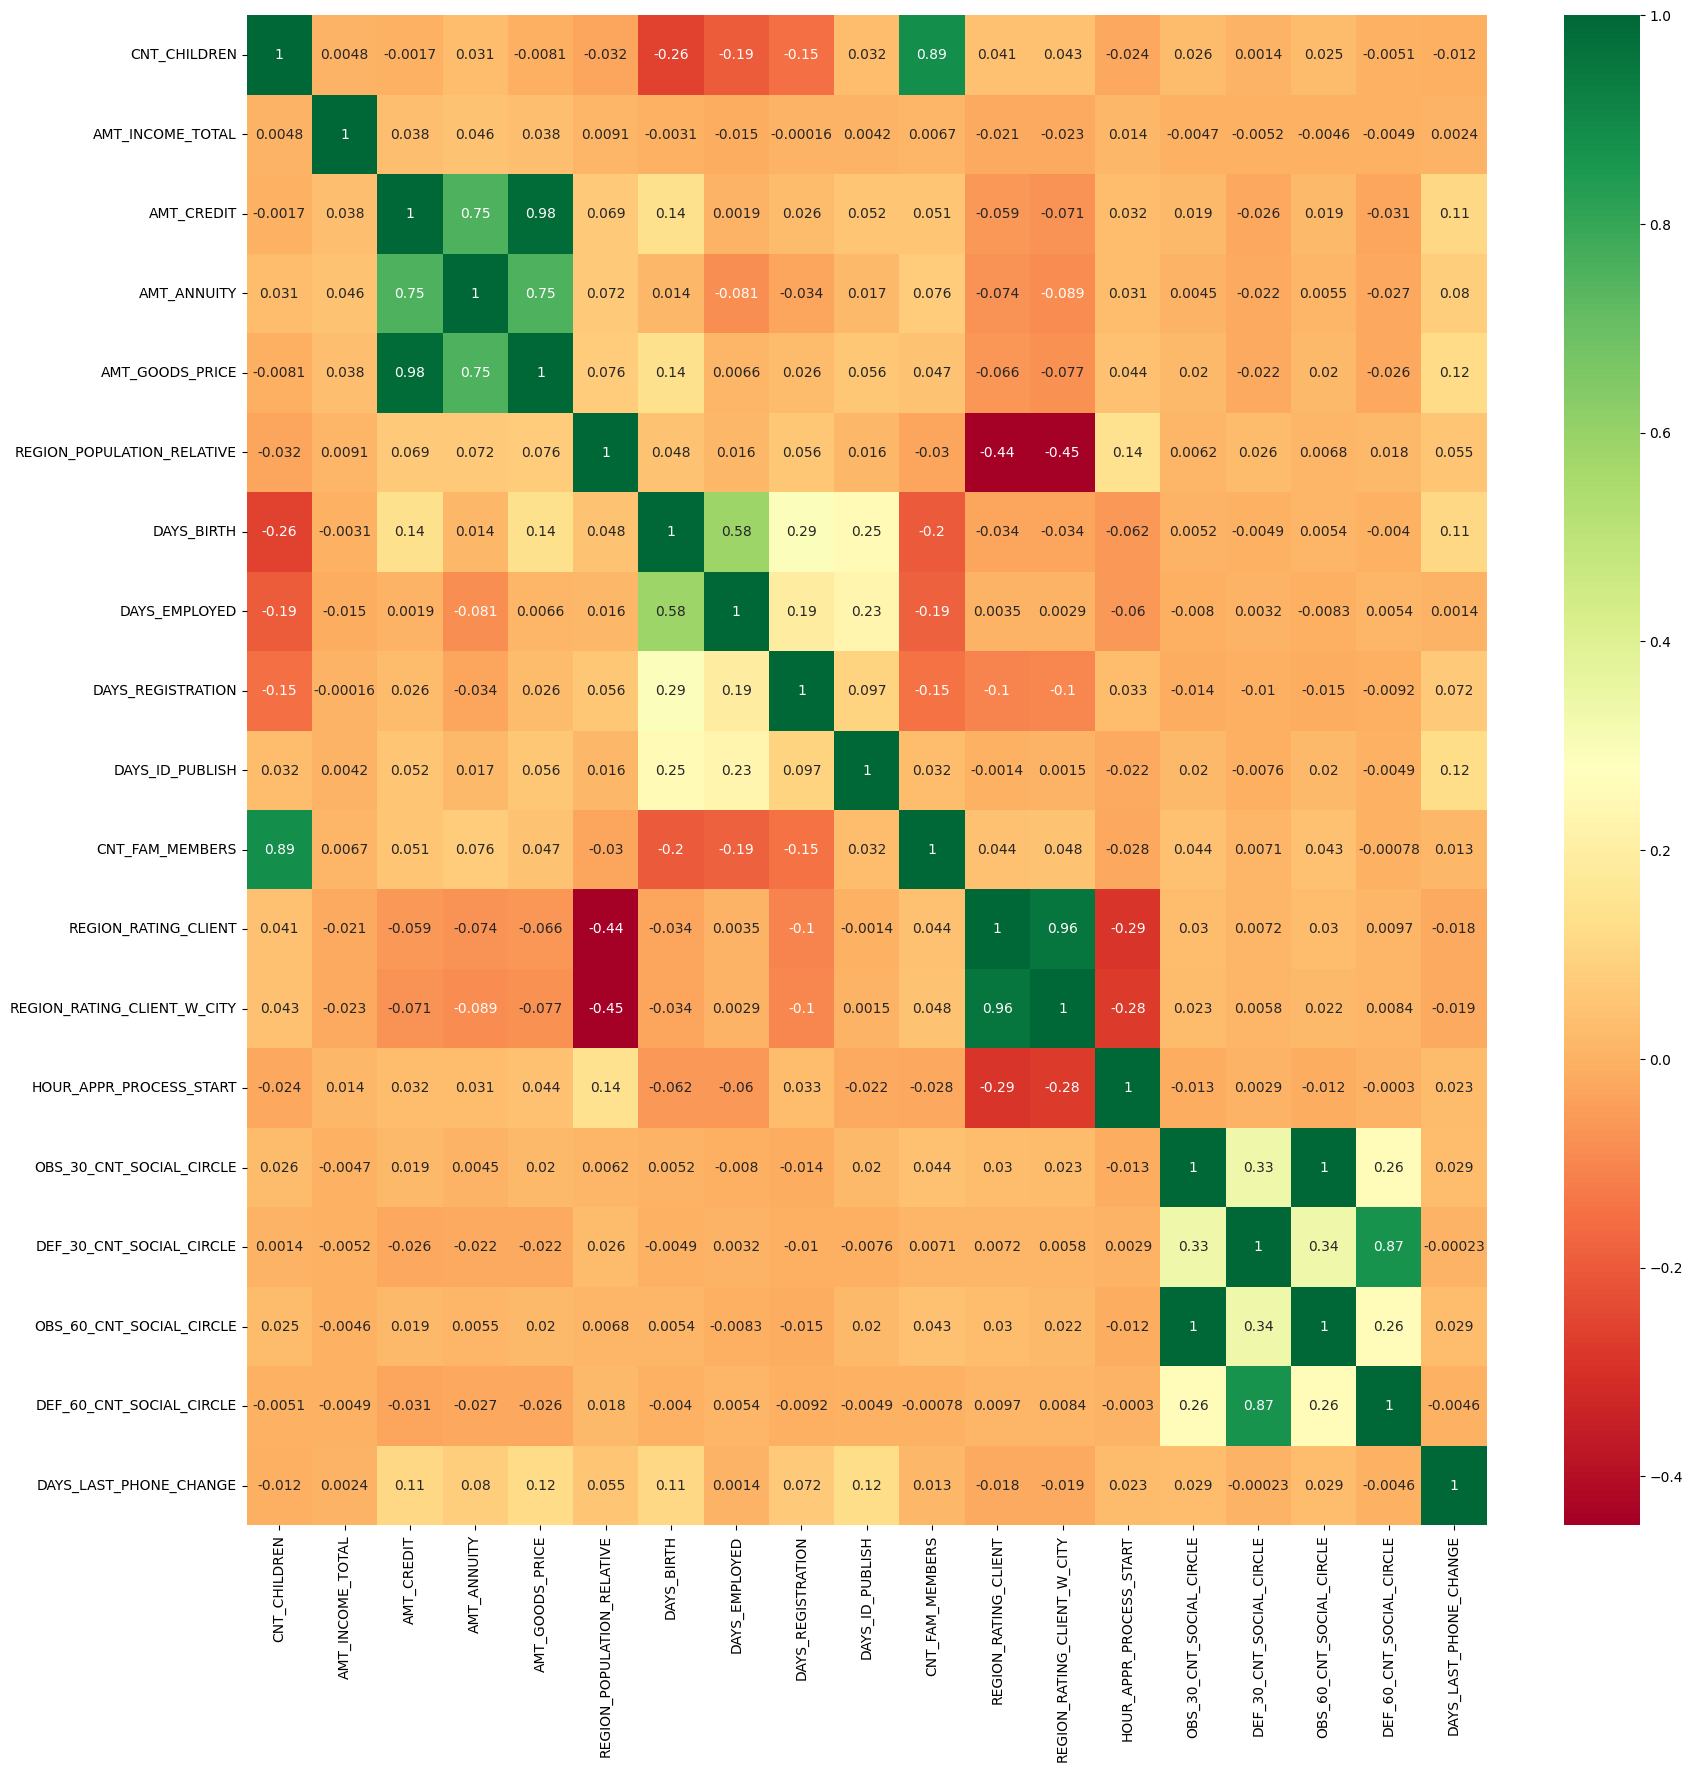

In [128]:
corr_defaulters = Defaulters_df.corr()
fig1 = plt.figure(figsize=(20,20), dpi = 100)
sns.heatmap(corr_defaulters, xticklabels=corr_defaulters.columns, yticklabels=corr_defaulters.columns, annot = True, cmap ="RdYlGn")

In [129]:
corr_defaulters = corr_defaulters.where(np.triu(np.ones(corr_defaulters.shape),1).astype(bool))
corr_df_defaulters = corr_defaulters.unstack().reset_index()
corr_df_defaulters.columns =['VAR1','VAR2','Correlation']
corr_df_defaulters.dropna(subset = ["Correlation"], inplace = True)
corr_df_defaulters["Correlation"]=corr_df_defaulters["Correlation"].abs() 
corr_df_defaulters.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_defaulters.head(10)

VAR1                        VAR2  Correlation
318     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998269
78               AMT_GOODS_PRICE                  AMT_CREDIT     0.983103
239  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.956637
190              CNT_FAM_MEMBERS                CNT_CHILDREN     0.885484
338     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.868994
79               AMT_GOODS_PRICE                 AMT_ANNUITY     0.752699
59                   AMT_ANNUITY                  AMT_CREDIT     0.752195
139                DAYS_EMPLOYED                  DAYS_BIRTH     0.582185
233  REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE     0.446977
214         REGION_RATING_CLIENT  REGION_POPULATION_RELATIVE     0.443236

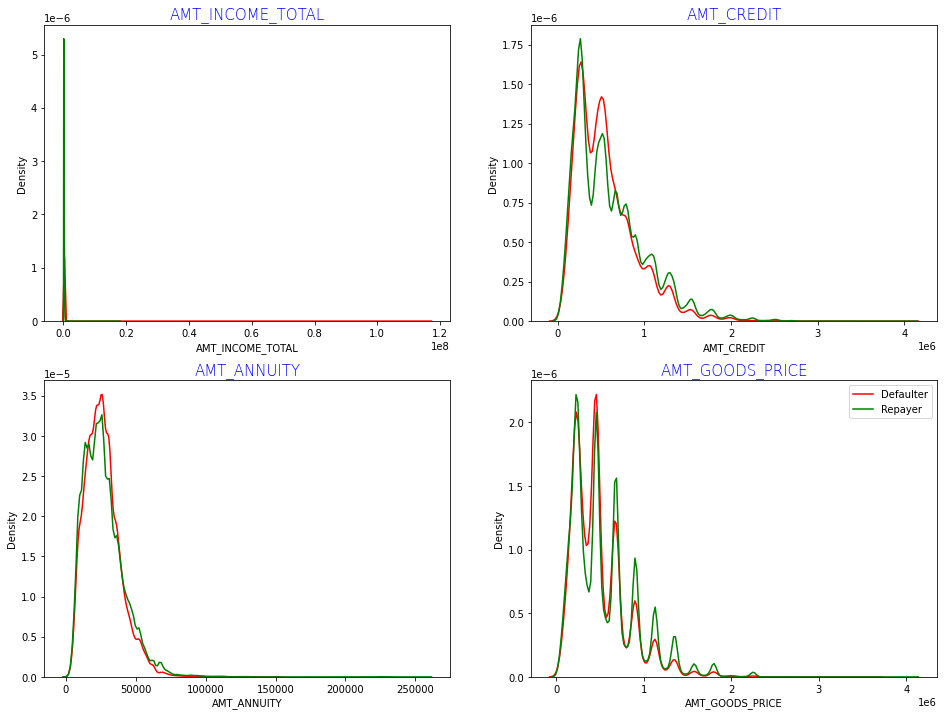

In [130]:
Variable_amount = application_data_actual[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(Variable_amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulters_df[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(Repayers_df[i[1]], hist=False, color='g', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    
plt.legend()

plt.show() 

Observations:

1. Most of the people very less Total income. 
2. Credit amoutn lies within 1.4 lacs and the defaulter rate is higher between 0.5 to 0.7 (aprox) lacs
3. Annuity paid is with in the limit of 50,000 most of the time. Deafulter Rate is higher between 25,000 to 27,000
4. Goods Price of the most of the clients are less than 1 lac. A peak in the Deafulter line can be seen at 0.4 to 0.6 lacs.

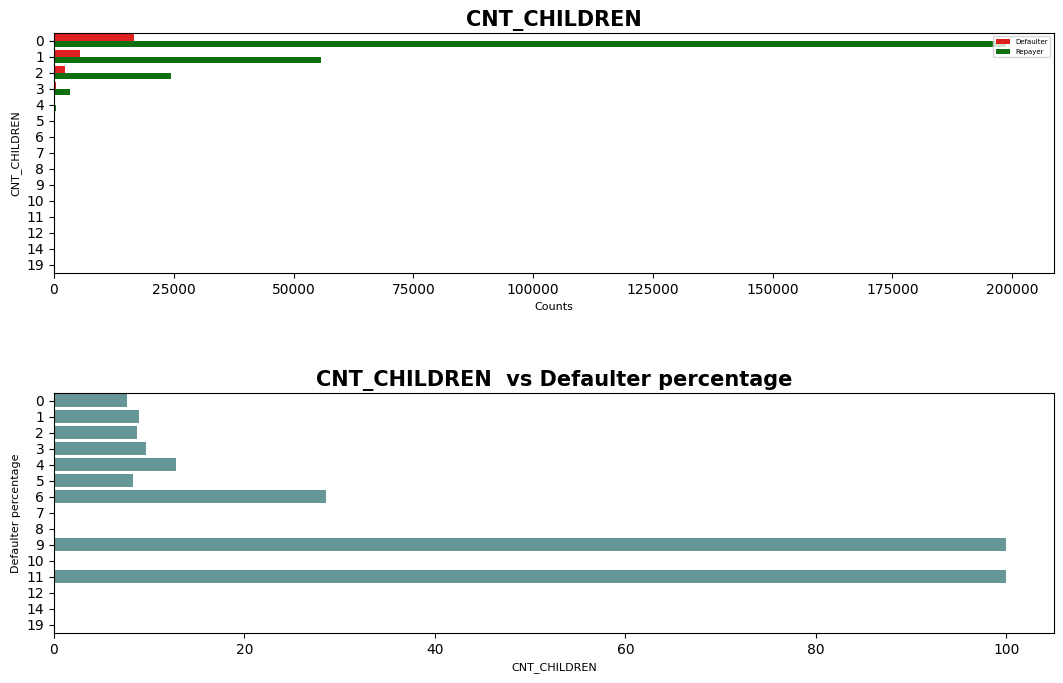

In [204]:
col = 'CNT_CHILDREN'
        
fig1 = plt.figure(figsize=(10,15), dpi = 100)
plt.subplot(2, 1, 1)
ax1 = sns.countplot(y = application_data_actual[col], hue=application_data_actual["TARGET"],palette=["r","g"], orient ="horizontal")
plt.yticks(fontsize= 10,rotation = 'horizontal')
plt.xticks(fontsize= 10)
ax1.set_title(col, pad = 5,loc = 'center', fontweight ="bold", fontsize= 15)
plt.xlabel("", fontsize= 8)
plt.ylabel("", fontsize= 8)
ax1.set(ylabel= col, xlabel = "Counts")
plt.legend(prop={'size': 5})

Defaulter_per = application_data_actual[[col,'TARGET']]
total_num = Defaulter_per.groupby(col).count()
Defaulter_per = Defaulter_per[Defaulter_per['TARGET'] == 'Defaulter'].groupby([col]).count()
temp_df = Defaulter_per/total_num *100

                                    
plt.subplot(2, 1, 2)
ax2 = sns.barplot(y = temp_df.index, x = temp_df['TARGET'], palette=["cadetblue"],orient ="h")
plt.yticks(fontsize=10, rotation = 'horizontal')
plt.xticks(fontsize= 10)
ax2.set_title(col + "  vs Defaulter percentage", pad =5,loc = 'center',fontweight ="bold",fontsize= 15)
plt.xlabel("", fontsize= 8)
plt.ylabel("", fontsize= 8)
ax2.set(xlabel= col, ylabel = "Defaulter percentage")

plt.subplots_adjust(left= 1, right=2, bottom=0.1, top=0.5, wspace=0.4, hspace=0.5,)
plt.show()  

Observations:

1. This feature is one of the most important field to predict loan defaulters. 
2. As we can see most of the loans are taken by the families with no children. However, the very few families that took having more than 5 children have defaulted to a great extent.
3. The families with 9 and 11 children have 100% default rate. 

 <h4>3. Bivariate analysis <h4>

<Figure size 20000x3000 with 0 Axes>

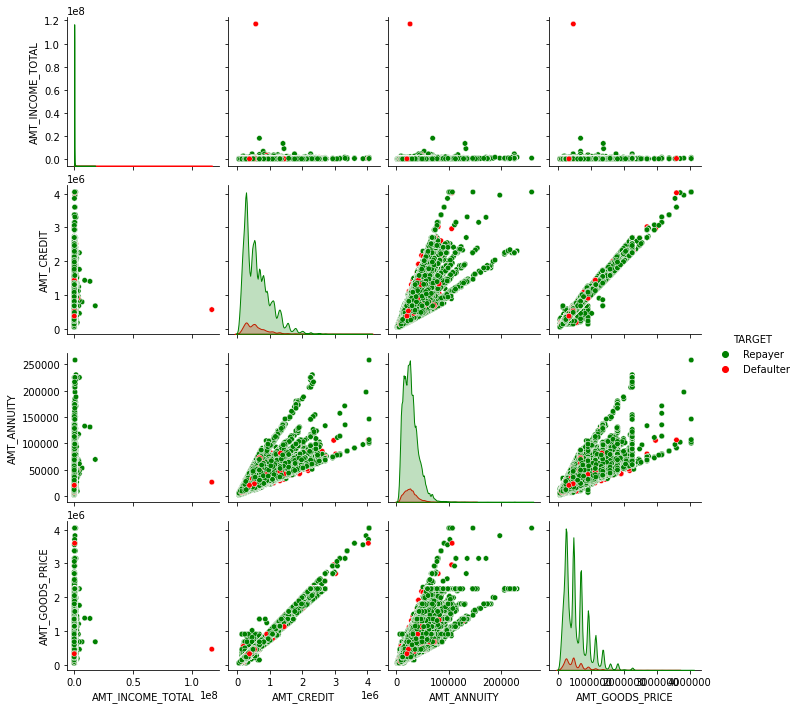

In [191]:
Variables_bivar = application_data_actual[['AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
# Variables_bivar = Variables_bivar[(Variables_bivar["AMT_GOODS_PRICE"].notnull()) & (Variables_bivar["AMT_ANNUITY"].notnull())]
fig = plt.figure(figsize=(100,15), dpi = 200)
ax= sns.pairplot(Variables_bivar,hue="TARGET",palette=["g","r"], dropna = True, hue_order = ['Repayer','Defaulter'], plot_kws={"s": 30})
plt.ticklabel_format(style = 'plain')
plt.show()

Observation:

1. When amt_annuity >15000 amt_goods_price> 3M, there is a lesser chance of defaulters
2. AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot where most of the data are consolidated in    form of a line
3. There are very less defaulters for AMT_CREDIT >3M
   Inferences related to distribution plot has been already mentioned in previous distplot graphs inferences section

<h4>4. Analysis on the joined Dataframe of Application data and the Previous application data. <h4>

In [150]:
loan_process_df = pd.merge(application_data_actual, previous_application_actual, how='inner', on='SK_ID_CURR')
loan_process_df.head(10)

# Merging the two Dataframes

NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0           Cash loans           M            N               Y   
1           Cash loans           F            N               N   
2           Cash loans           F            N               N   
3           Cash loans           F            N               N   
4      Revolving loans           M            Y               Y   
5           Cash loans           F            N               Y   
6           Cash loans           F            N               Y   
7           Cash loans           F            N               Y   
8           Cash loans           F            N               Y   
9           Cash loans           F            N               Y   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2          Family    State servant               Higher education   
3          Family    State servant               Higher education   
4   Unaccompanied          Working  Secondary / secondary special   
5   Unaccompanied          Working  Secondary / secondary special   
6   Unaccompanied          Working  Secondary / secondary special   
7   Unaccompanied          Working  Secondary / secondary special   
8   Unaccompanied          Working  Secondary / secondary special   
9   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
0  Single / not married  House / apartment        Laborers   
1               Married  House / apartment      Core staff   
2               Married  House / apartment      Core staff   
3               Married  House / apartment      Core staff   
4  Single / not married  House / apartment        Laborers   
5        Civil marriage  House / apartment        Laborers   
6        Civil marriage  House / apartment        Laborers   
7        Civil marriage  House / apartment        Laborers   
8        Civil marriage  House / apartment        Laborers   
9        Civil marriage  House / apartment        Laborers   

  WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE     TARGET  \
0                  WEDNESDAY  Business Entity Type 3  Defaulter   
1                     MONDAY                  School    Repayer   
2                     MONDAY                  School    Repayer   
3                     MONDAY                  School    Repayer   
4                     MONDAY              Government    Repayer   
5                  WEDNESDAY  Business Entity Type 3    Repayer   
6                  WEDNESDAY  Business Entity Type 3    Repayer   
7                  WEDNESDAY  Business Entity Type 3    Repayer   
8                  WEDNESDAY  Business Entity Type 3    Repayer   
9                  WEDNESDAY  Business Entity Type 3    Repayer   

  FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_PHONE REG_CITY_NOT_WORK_CITY  \
0            Yes              No        Yes                     No   
1            Yes              No        Yes                     No   
2            Yes              No        Yes                     No   
3            Yes              No        Yes                     No   
4            Yes             Yes        Yes                     No   
5            Yes              No         No                     No   
6            Yes              No         No                     No   
7            Yes              No         No                     No   
8            Yes              No         No                     No   
9            Yes              No         No                     No   

  LIVE_CITY_NOT_WORK_CITY FLAG_DOCUMENT_3  SK_ID_CURR  CNT_CHILDREN  \
0                      No             Yes      100002             0   
1                      No             Yes      100003             0   
2                      No             Yes      100003             0   
3                      No   

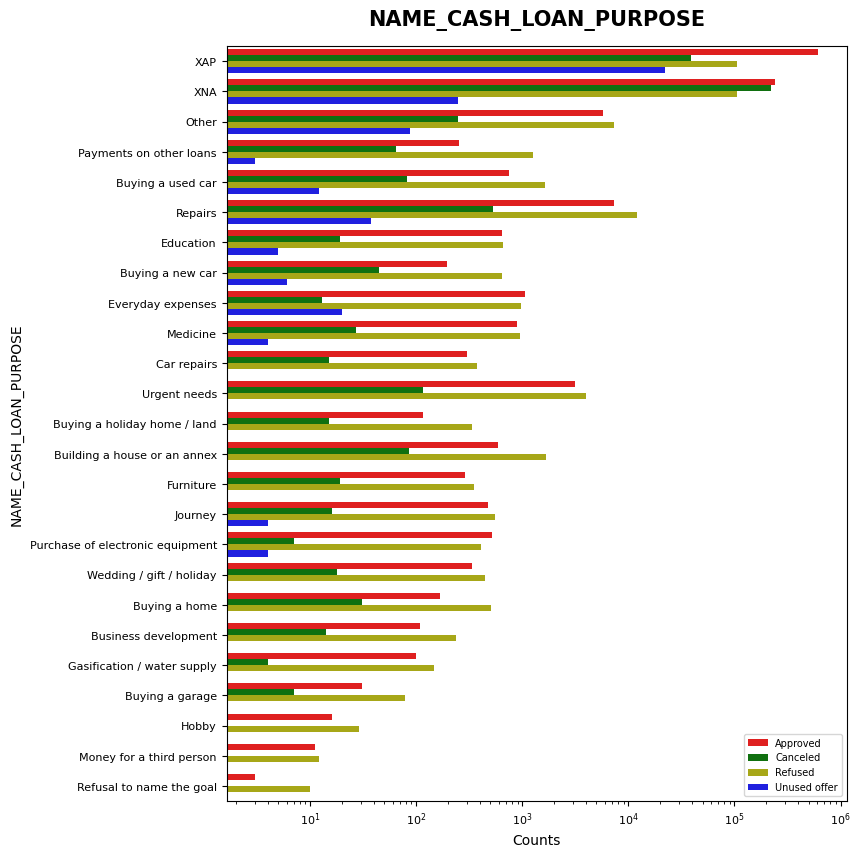

In [190]:
col = 'NAME_CASH_LOAN_PURPOSE'
        
fig1 = plt.figure(figsize=(8,10), dpi = 100)
ax1 = sns.countplot(y = loan_process_df[col], hue=loan_process_df["NAME_CONTRACT_STATUS"],palette=["r","g",'y','b'], orient ="horizontal")
plt.yticks(fontsize= 8,rotation = 'horizontal')
plt.xticks(fontsize= 8)
ax1.set_title(col, pad = 15,loc = 'center', fontweight ="bold", fontsize= 15)
plt.xlabel("", fontsize= 10)
plt.ylabel("", fontsize= 10)
ax1.set(ylabel= col, xlabel = "Counts")
plt.legend(prop={'size': 7},loc = 'lower right')
plt.xscale('log')

plt.show()

Observations:

1. There are lot of missing data in the form of XAP, XNA.
2. Clients have mostly applied for Repair Loans and Urgent Needs. These loans are approved the most as well as mostly refunsed by Clients it itslef. It seems like the banks are not offering a good deal for such purposes.


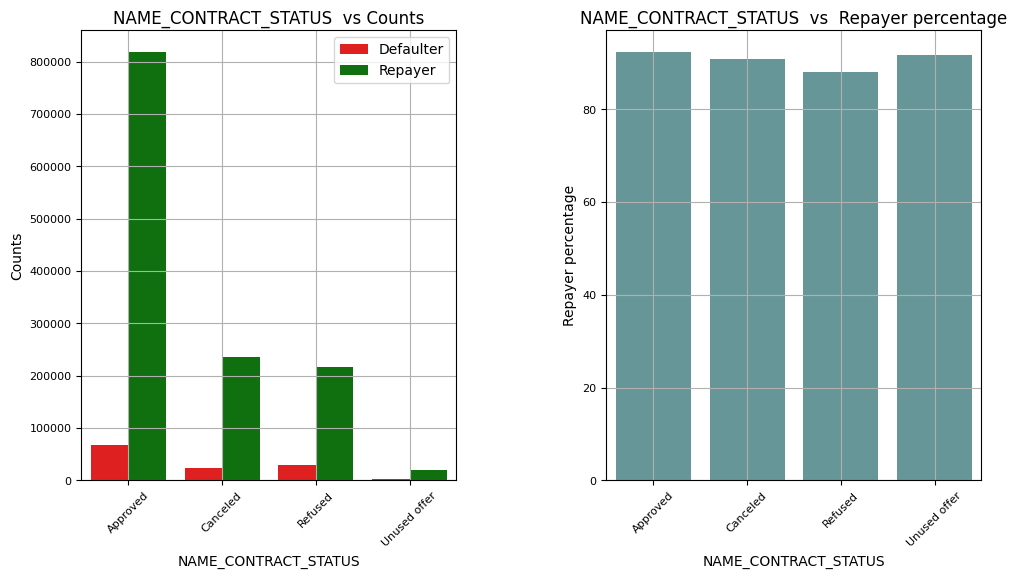

Percentage of Repayers per Category of NAME_CONTRACT_STATUS: 

                          TARGET
NAME_CONTRACT_STATUS           
Approved              92.411345
Canceled              90.826431
Refused               88.003586
Unused offer          91.748276


In [184]:
   
col = 'NAME_CONTRACT_STATUS'

fig1 = plt.figure(figsize=(10,5), dpi =100)

plt.subplot(1, 2, 1)

ax1 = sns.countplot(x = loan_process_df[col], hue=loan_process_df["TARGET"],palette=["r","g"])
plt.yticks(fontsize=8)
plt.xticks(fontsize=8,rotation = 45)
ax1.set_title(col + '  vs Counts', pad = 5,loc = 'center')
plt.xlabel(col, labelpad =5 )
plt.ylabel("Counts")
ax1.set(xlabel= col, ylabel = "Counts")
ax1.grid(True)
plt.legend()

Repayer_per = loan_process_df[[col,'TARGET']]
total_num = Repayer_per.groupby(col).count()
Repayer_per = Repayer_per[Repayer_per['TARGET'] == 'Repayer'].groupby([col]).count()
temp_df = Repayer_per/total_num *100

plt.subplot(1, 2, 2)
ax2 = sns.barplot(x = temp_df.index, y = temp_df['TARGET'],palette=["cadetblue"])
plt.yticks(fontsize=8)
plt.xticks(fontsize=8,rotation = 45)
ax2.set_title(col + "  vs  Repayer percentage", pad = 5,loc = 'center')
plt.xlabel(col, labelpad =5 )
plt.ylabel("Repayer percentage")
ax2.set(xlabel= col, ylabel = "Repayer percentage")
ax2.grid(True)

plt.subplots_adjust(left= 0.1, right=1, bottom=0.1, top=1, wspace=0.4, hspace=5,)
plt.show()

print('Percentage of Repayers per Category of NAME_CONTRACT_STATUS: \n\n', temp_df)

Observations:

90% of the previously cancelled client have actually repayed the loan. Revisiting the interest rates would increase business opoortunity for these clients
88% of the clients who have been previously refused a loan has payed back the loan in current case.

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

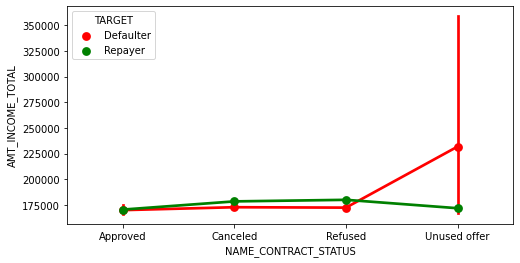

In [187]:
plt.figure(figsize=(8,4))
sns.pointplot(x='NAME_CONTRACT_STATUS', 
                  y='AMT_INCOME_TOTAL', 
                  hue="TARGET", 
                  data=loan_process_df,
                  palette =['r','g'])

Observation:

The point plot show that the people who had unused offer earlier have defaulted even when there average income is higher than others. 

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='DEF_60_CNT_SOCIAL_CIRCLE'>

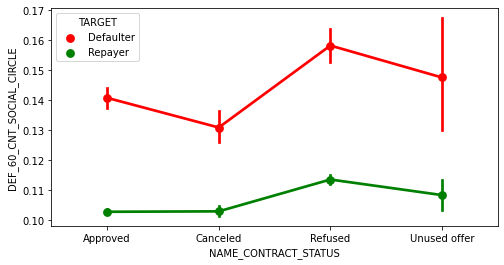

In [188]:
plt.figure(figsize=(8,4))
sns.pointplot(x='NAME_CONTRACT_STATUS', 
                  y='DEF_60_CNT_SOCIAL_CIRCLE', 
                  hue="TARGET", 
                  data=loan_process_df,
                  palette =['r','g'])

Observation:

Clients who have average of 0.13 or higher DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and hence client's social circle has to be analysed before providing the loan.

 <h4>Final Conclusion <h4>

Decisive Factor whether an applicant will be Repayer:

        1. NAME_EDUCATION_TYPE: Academic degree has less defaults.
        2. NAME_INCOME_TYPE: Student and Businessmen have no defaults.
        3. ORGANIZATION_TYPE: Clients with Trade Type 4 and 5 and Industry type 8 have defaulted less than 3%
        4. DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% default rate
        5. AMT_INCOME_TOTAL:Applicant with Income more than 700,000 are less likely to default
        6. NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are being repayed mostly.
        7. CNT_CHILDREN: People with zero to two children tend to repay the loans.

Decisive Factor whether an applicant will be Defaulter:
    
    1. CODE_GENDER: Men are at relatively higher default rate
    2. NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot.
    3. NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education
    4. NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot.
    5. OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff        as the default rate is huge.
    6. ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13        (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting            rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk        of defaulting.
    7. DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate.
    8.CNT_CHILDREN & CNT_FAM_MEMBERS: Client who have children equal to or more than 9 default 100% and hence their                   applications are to be rejected. 
    9. AMT_GOODS_PRICE: When the credit amount goes beyond 3M, there is an increase in defaulters.